
 # Entri Elevate

Importing the libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Importing the dataset

In [2]:
Taiwan_data = pd.read_csv('data.csv')
df = pd.DataFrame(Taiwan_data)
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

### Basic data filtering and preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(6819, 96)

In [7]:
# Changing the name of the target column
df['Bankrupt'] = df['Bankrupt?']
df = df.drop(columns='Bankrupt?')

In [8]:
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Total assets to GNP price  \
0                               0.780985  ...                    0.009219   
1                               0.781506  ...                    0.008323   
2                               0.780284  ...                    0.040003   
3                               0.781241  ...                    0.003252   
4                               0.781550  ...                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                               

### Outlier Detection

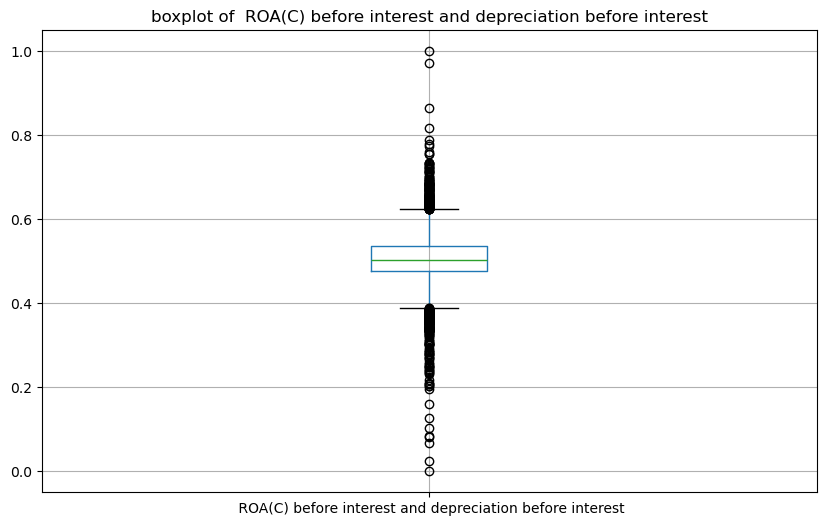

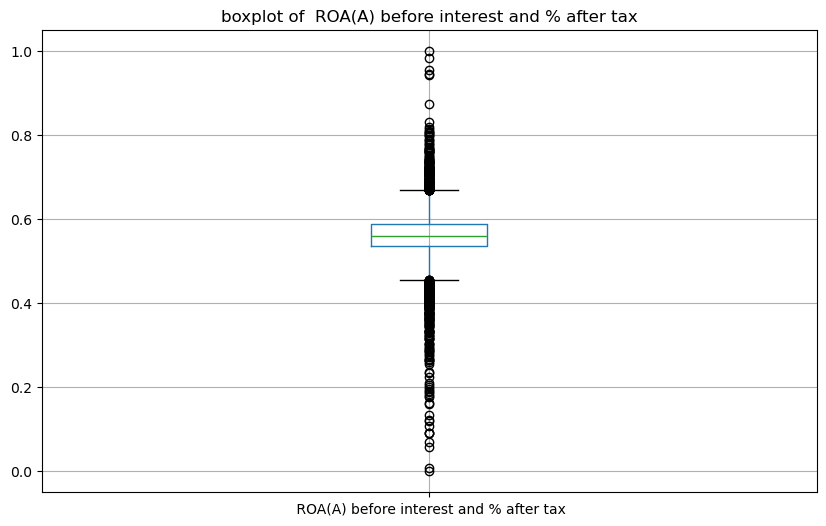

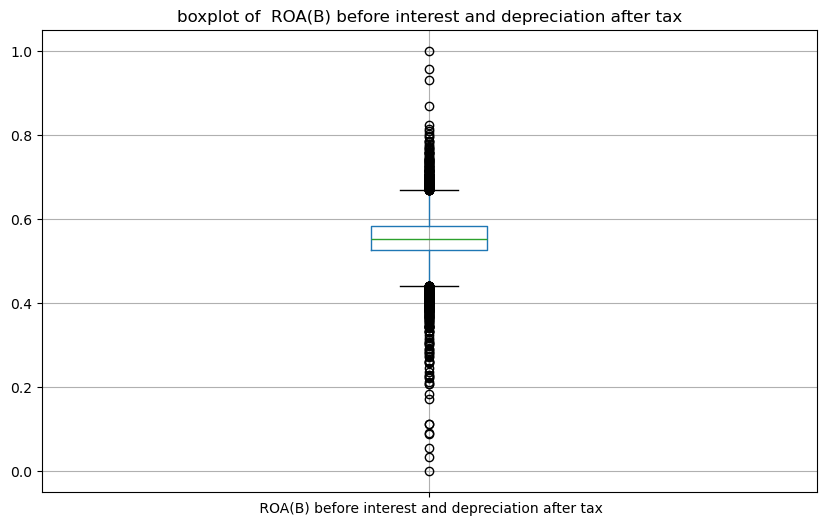

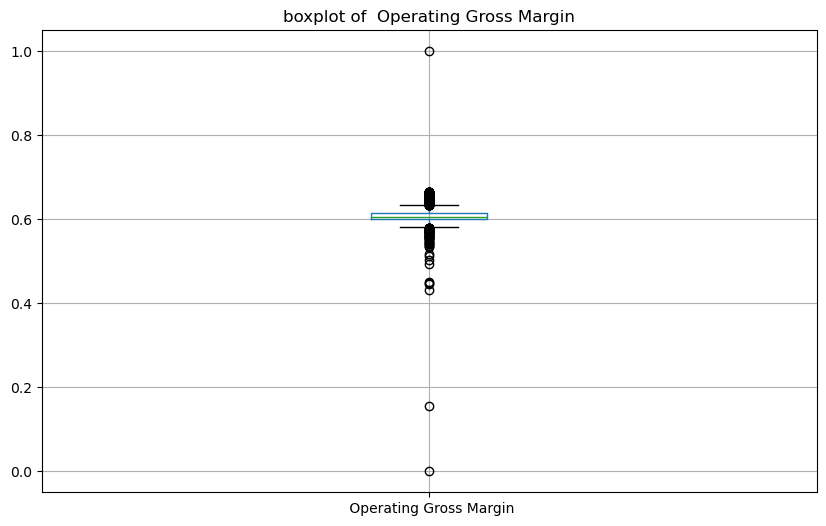

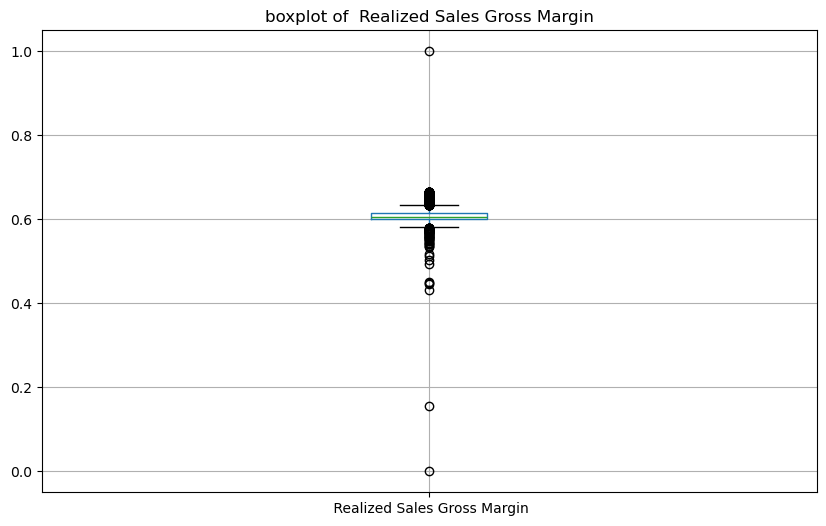

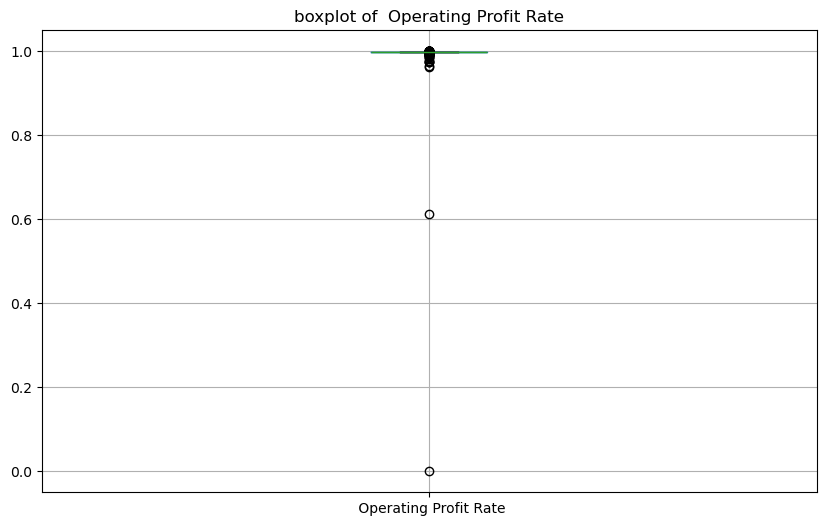

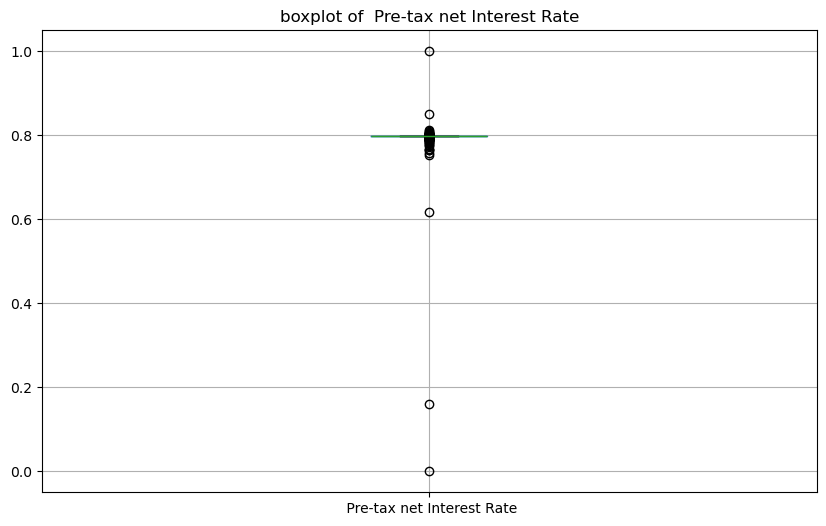

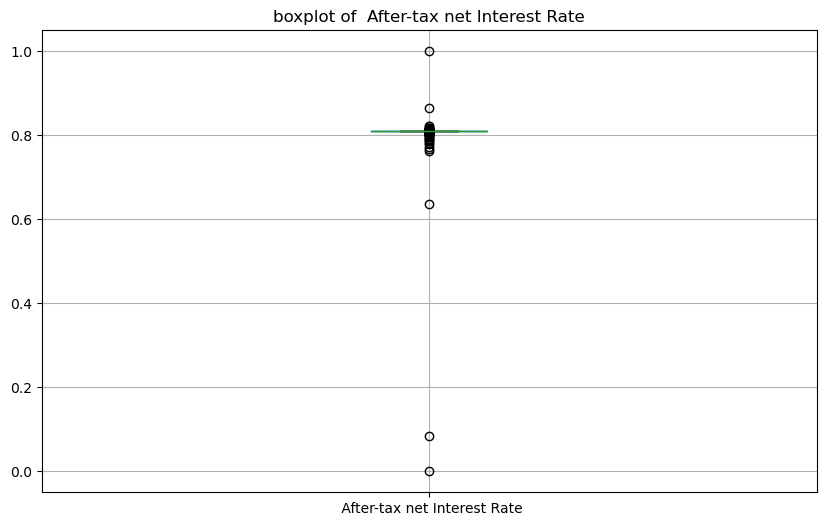

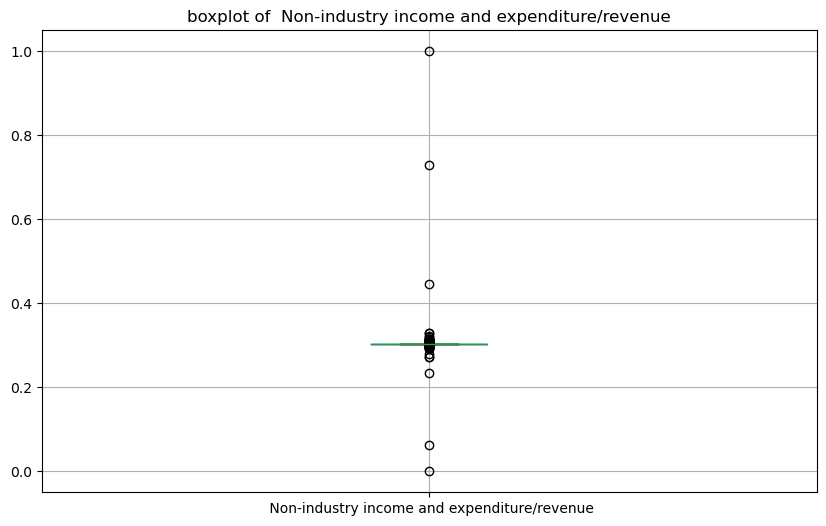

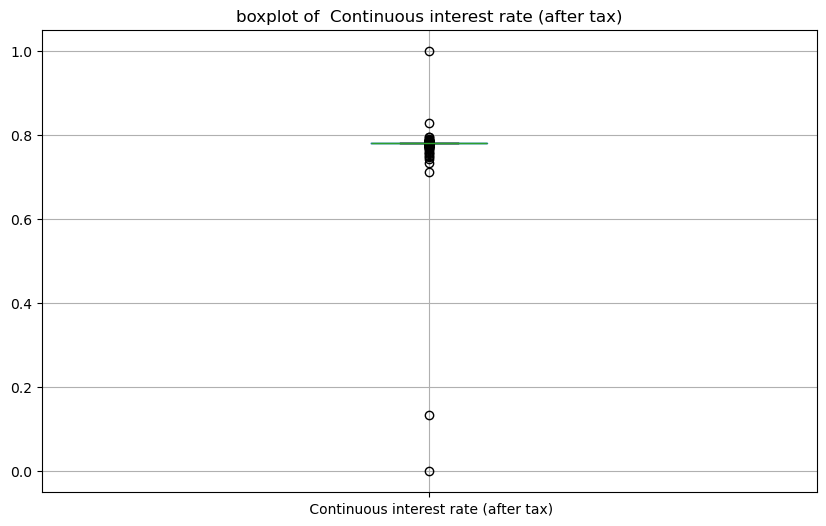

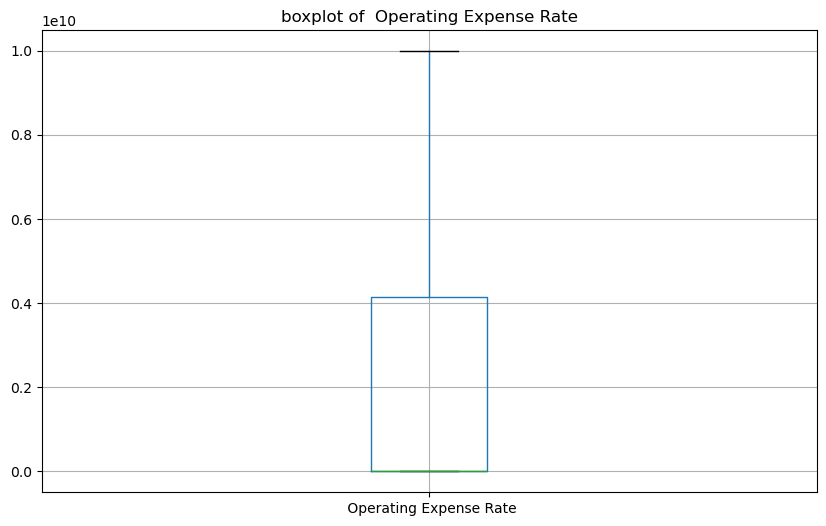

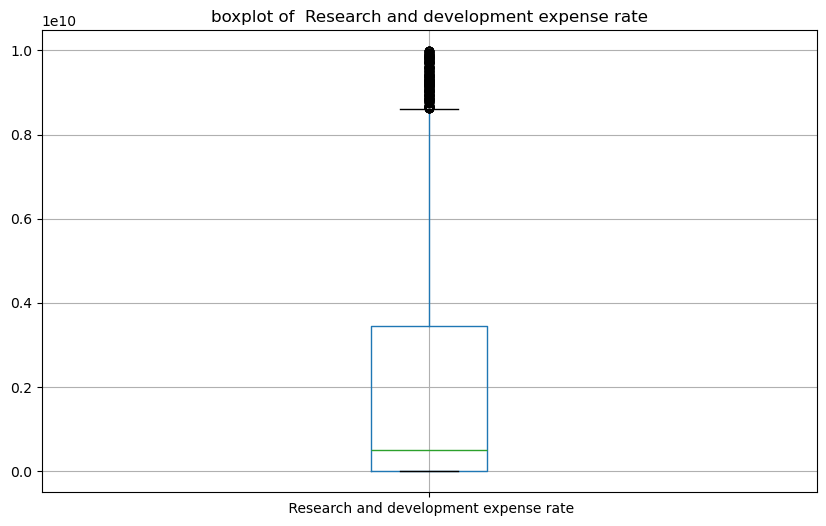

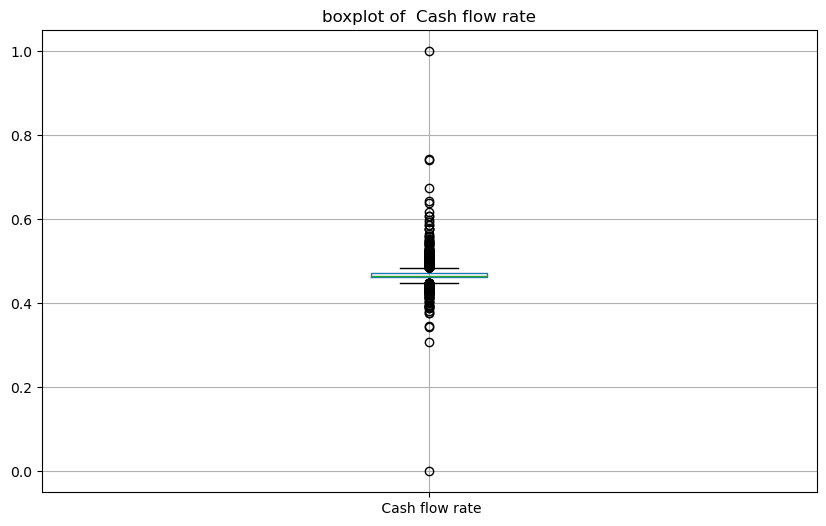

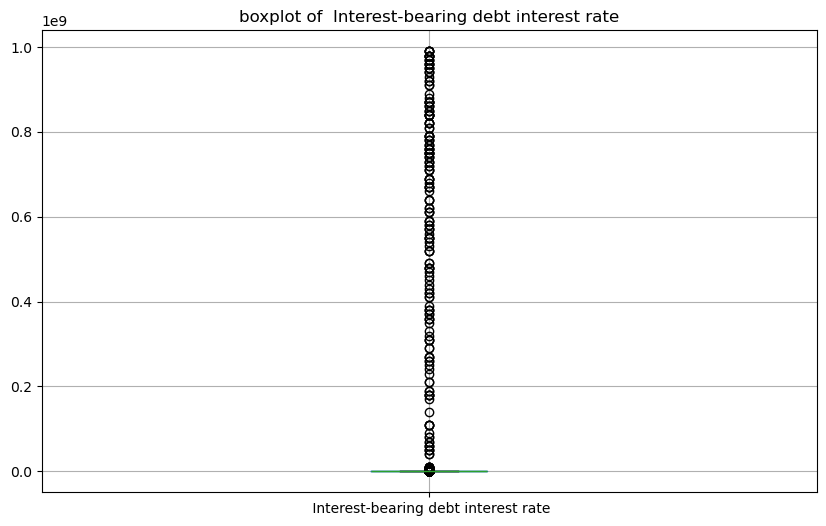

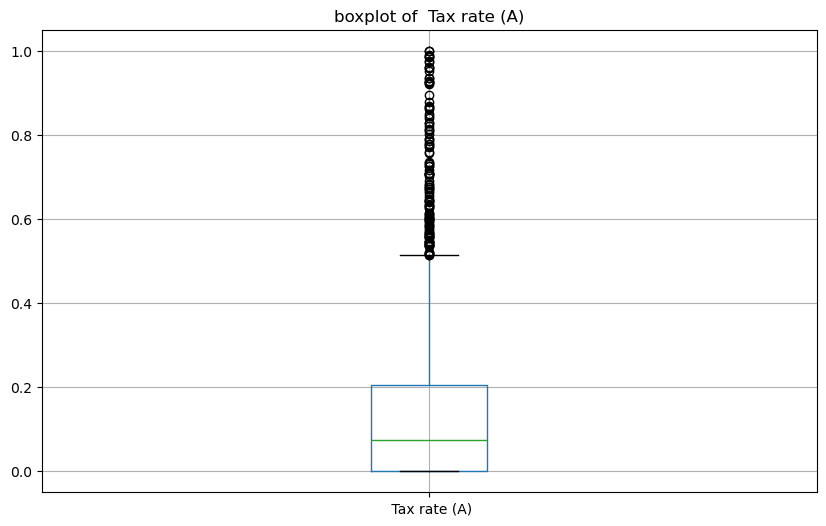

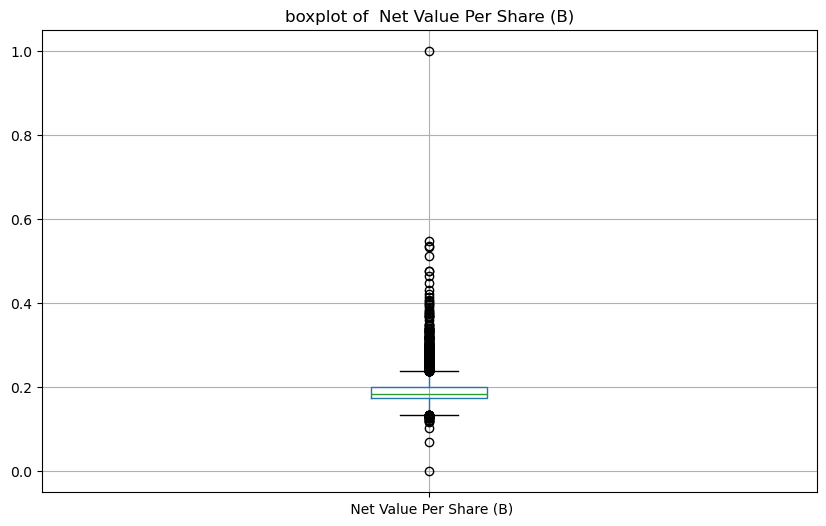

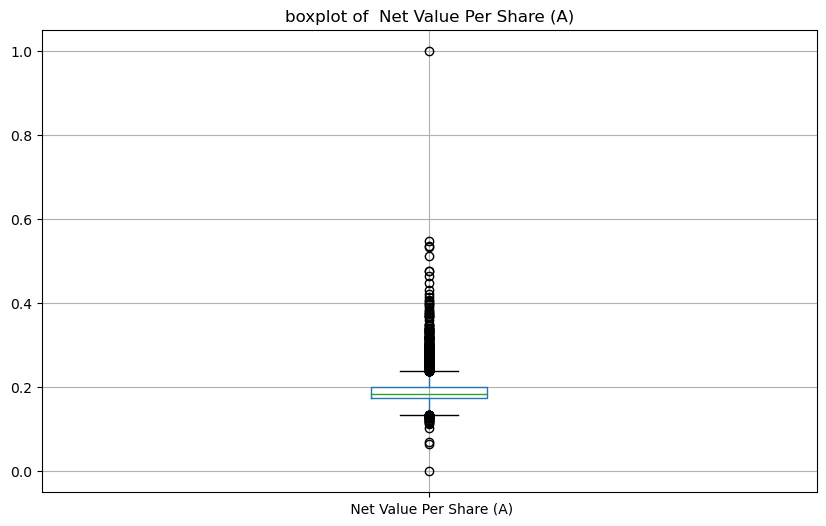

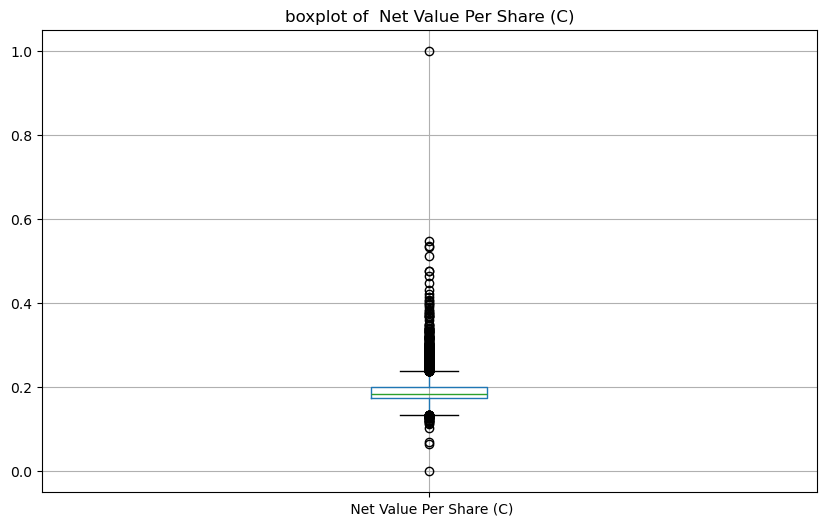

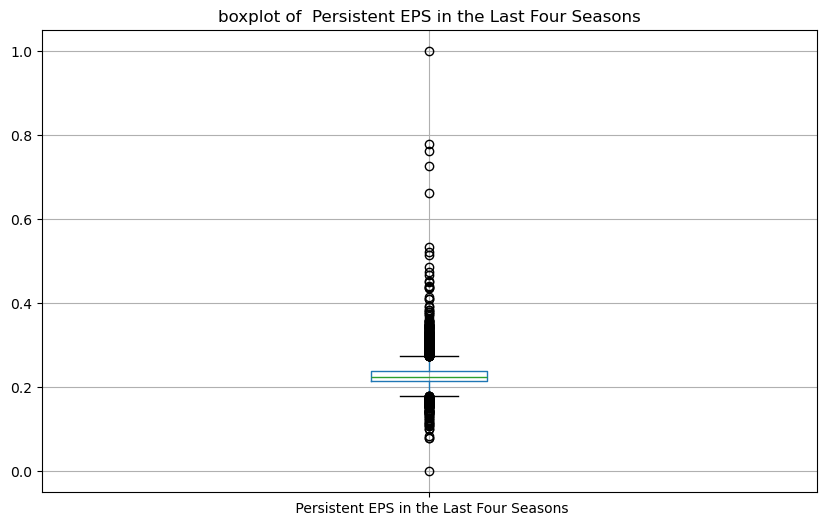

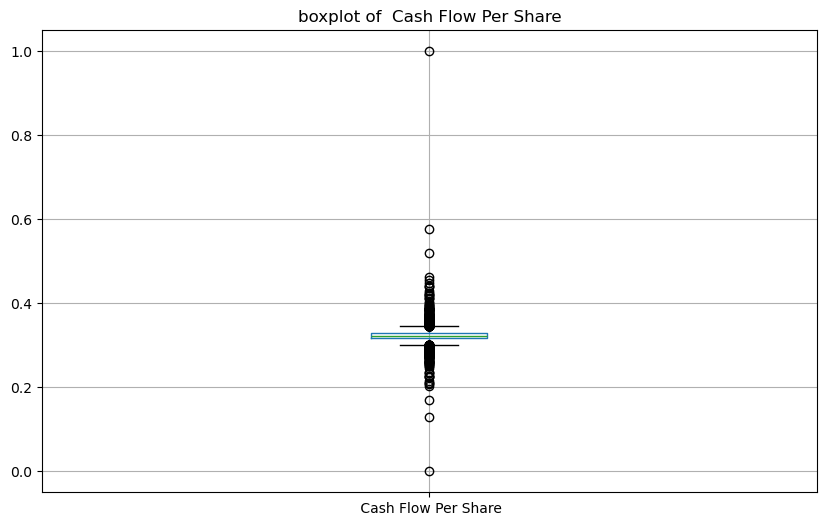

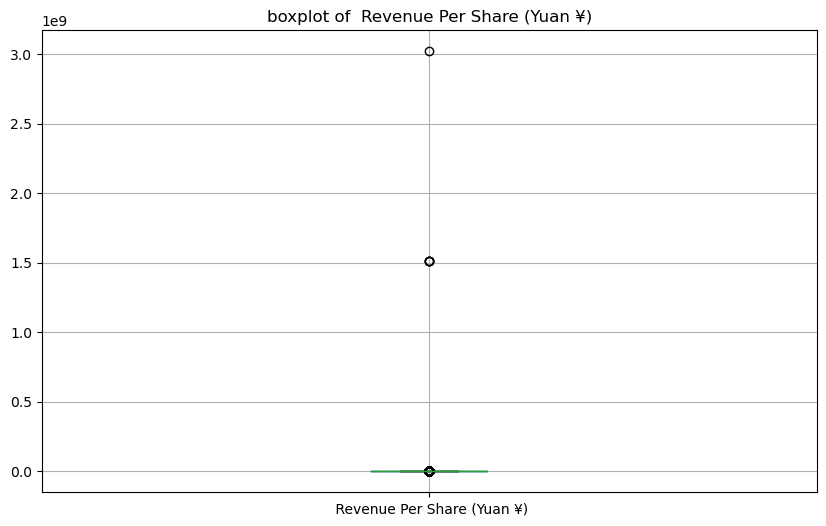

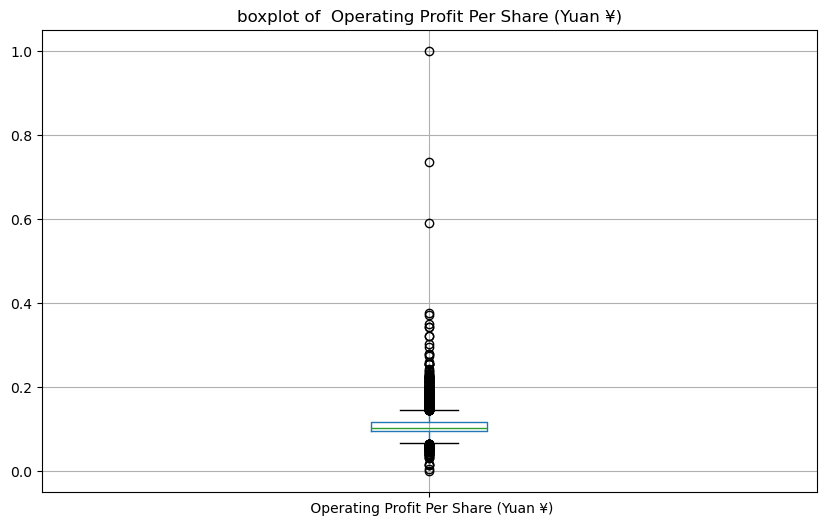

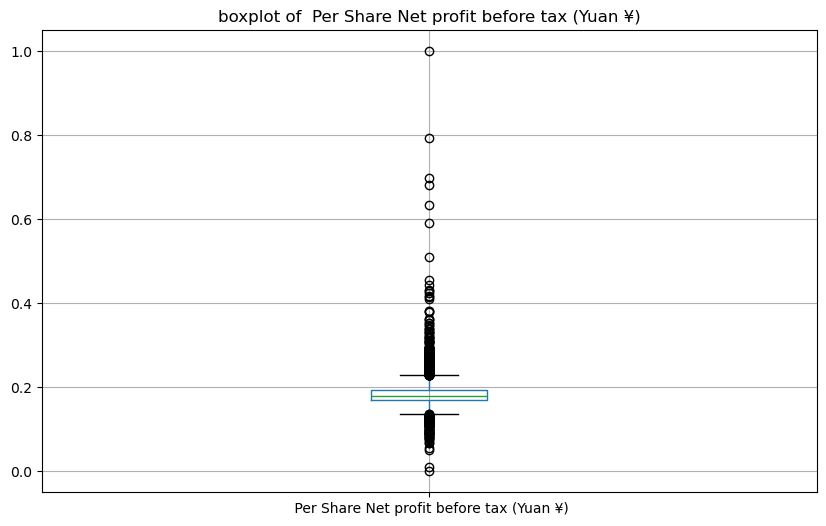

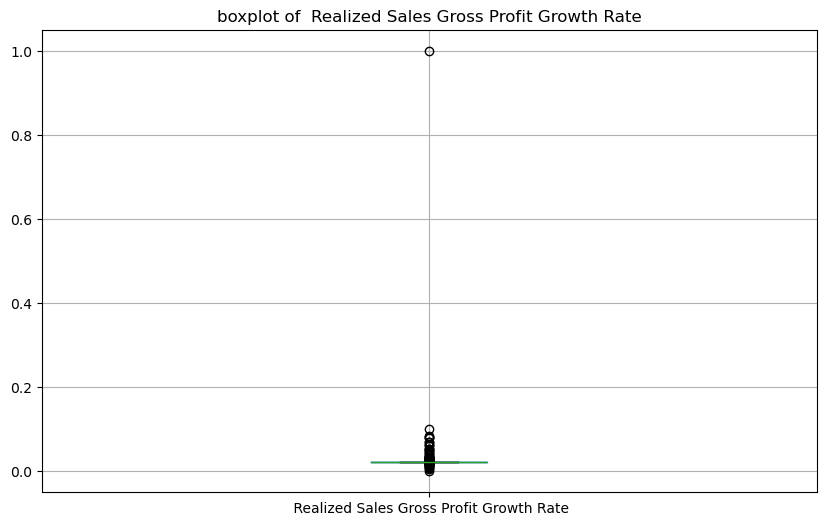

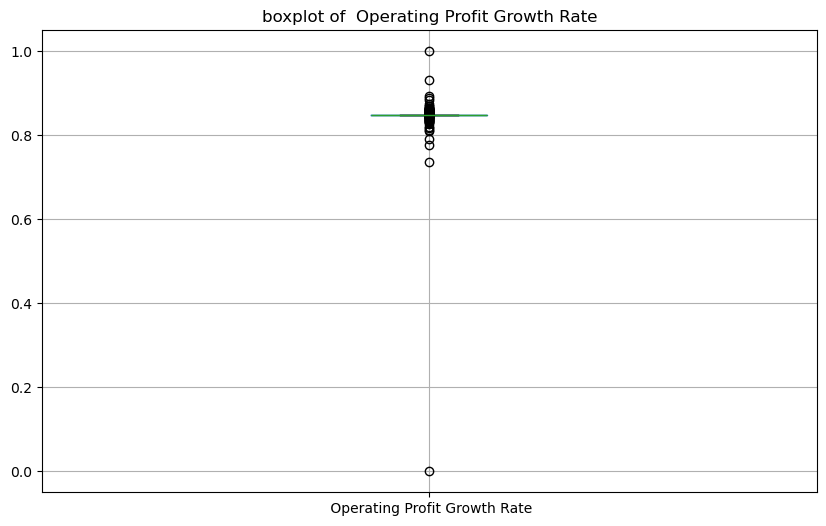

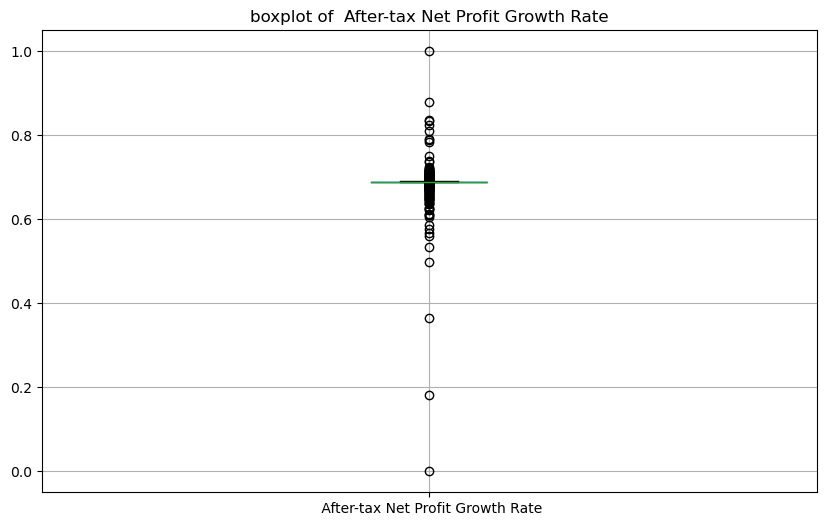

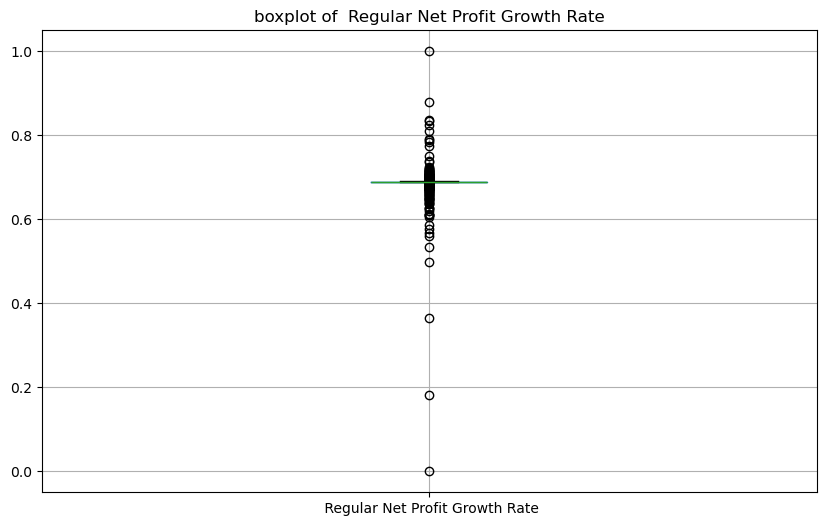

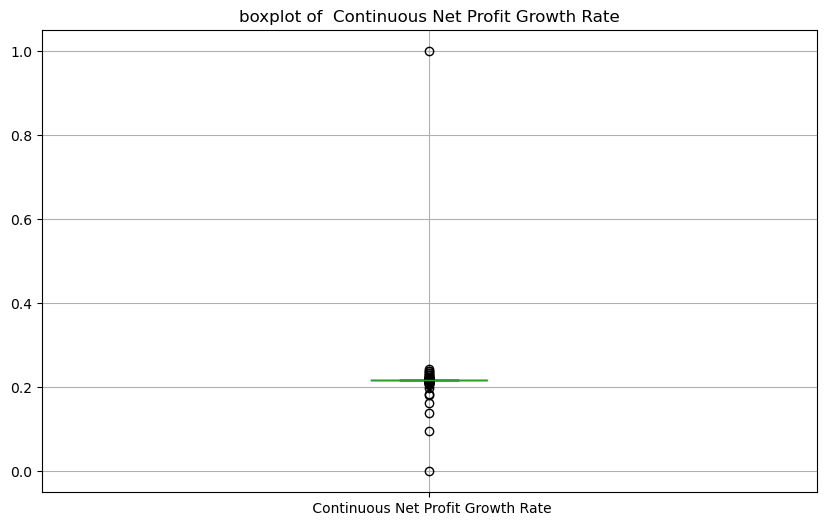

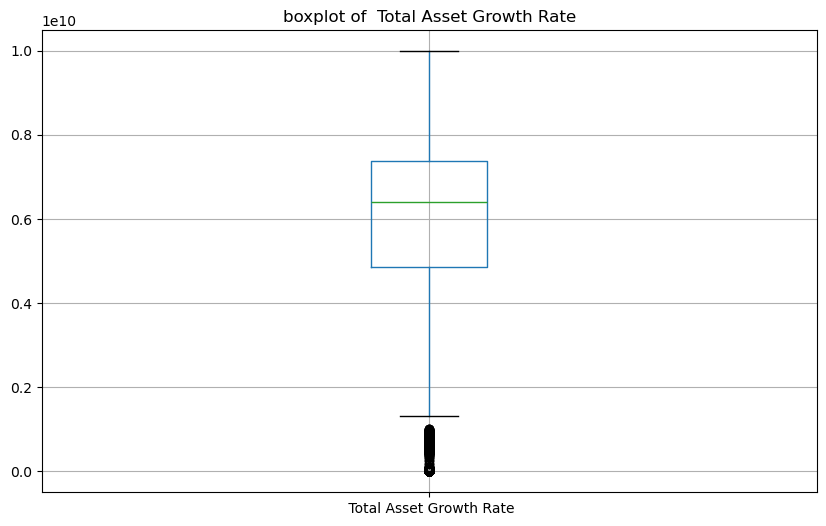

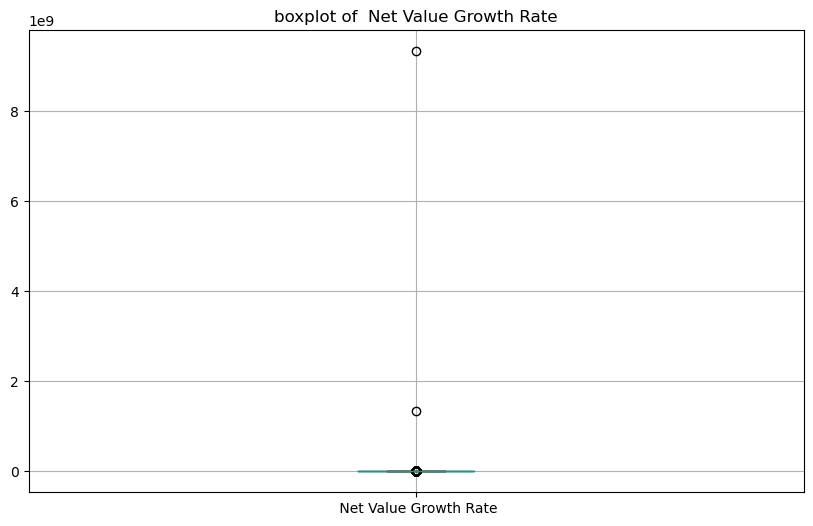

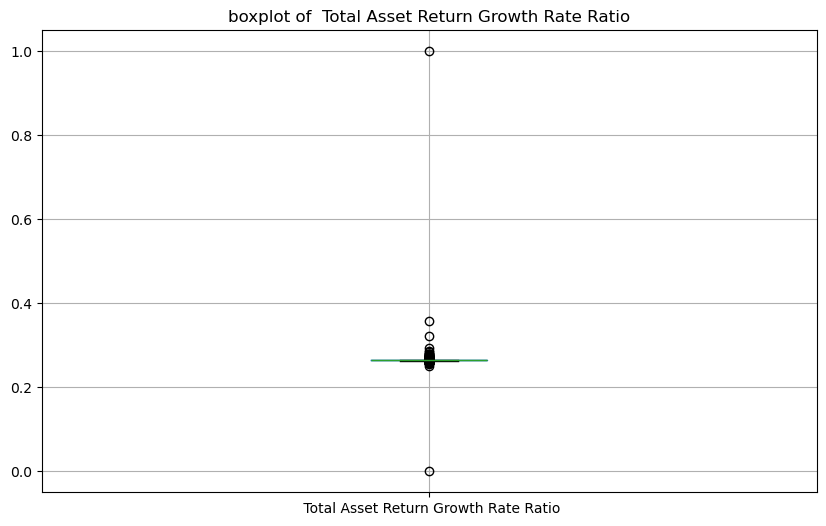

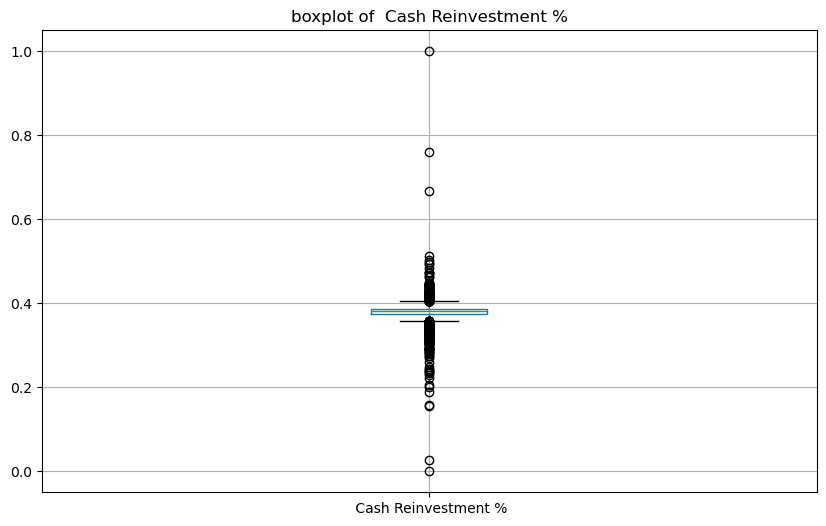

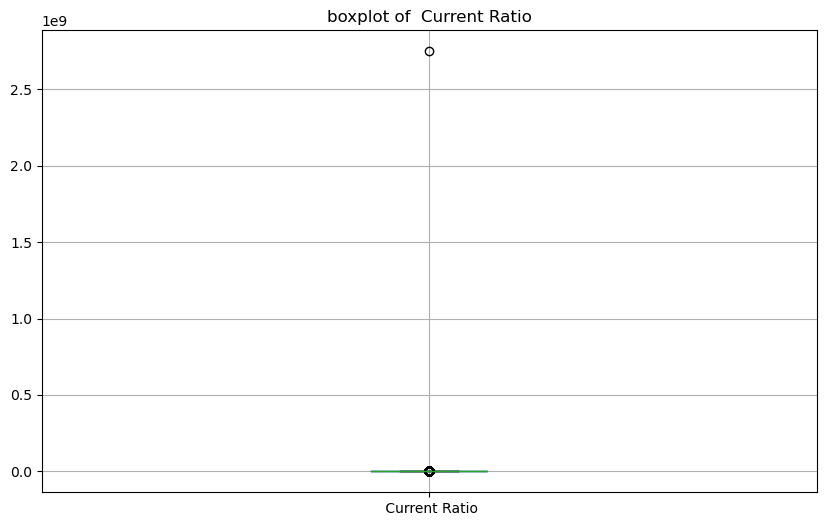

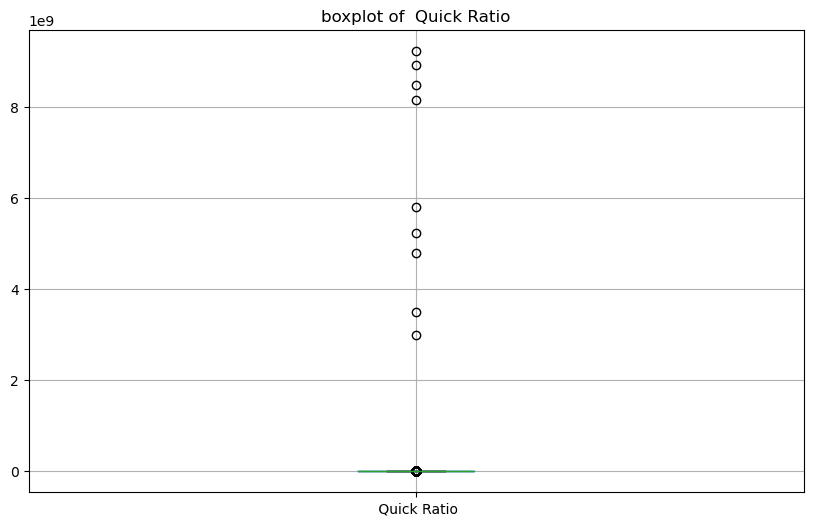

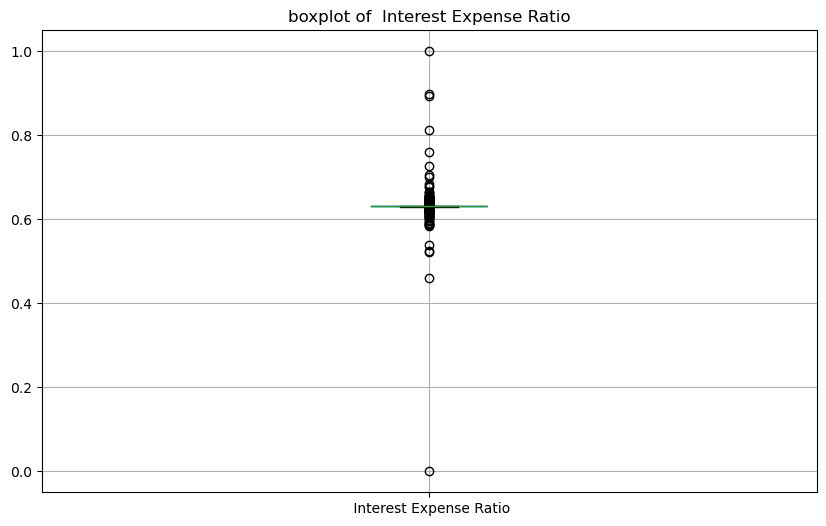

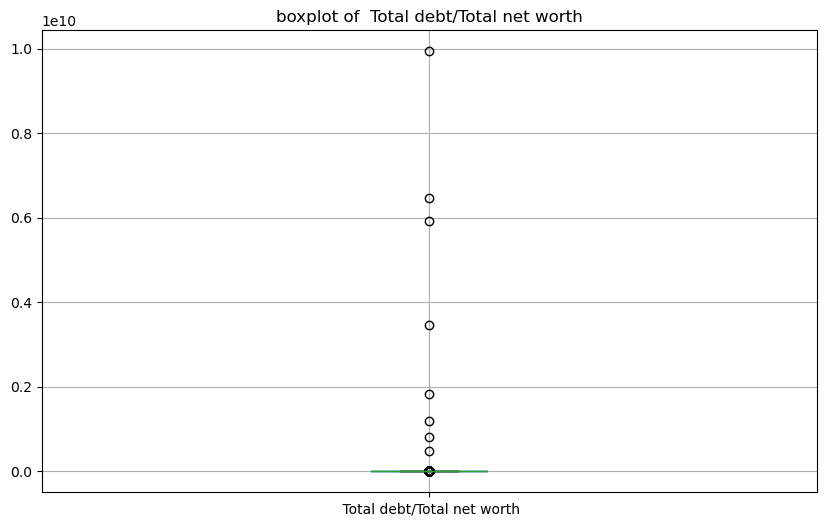

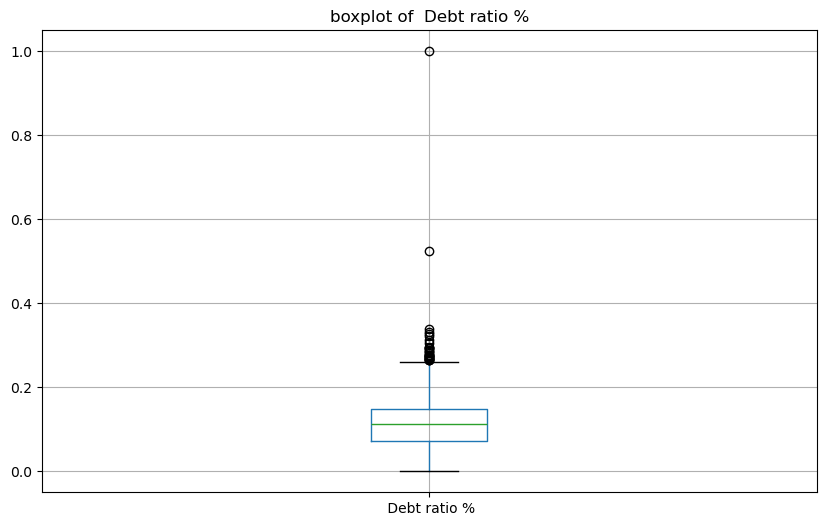

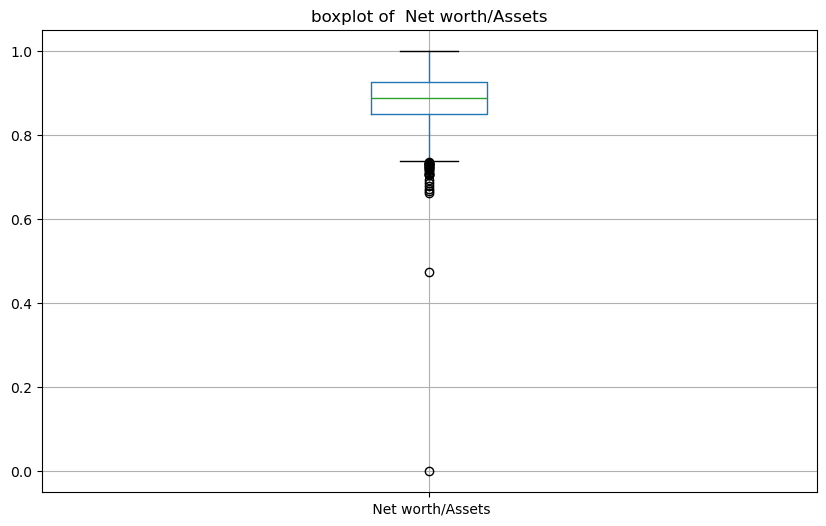

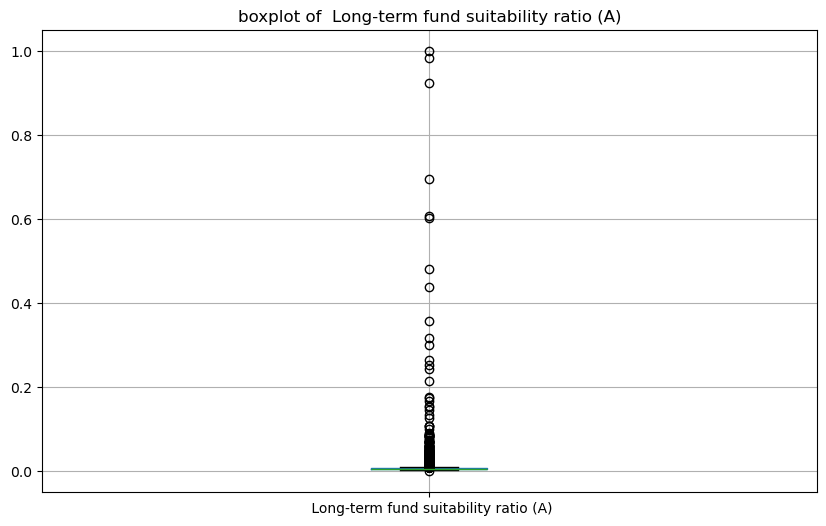

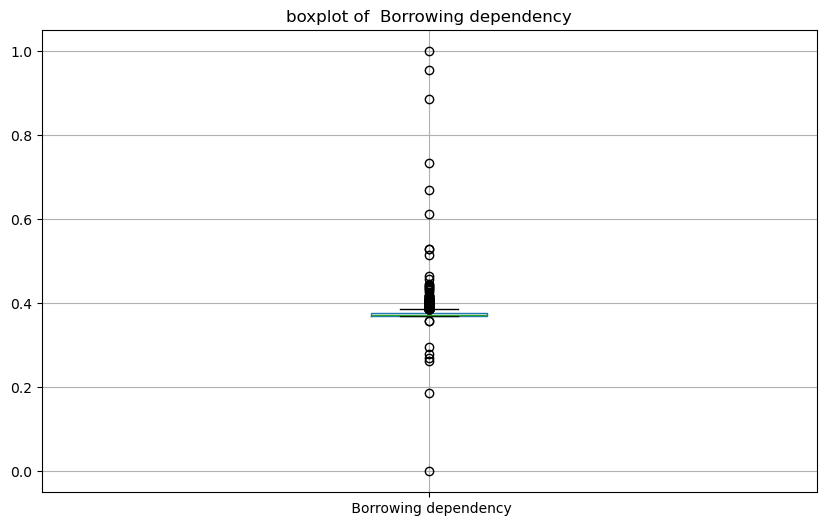

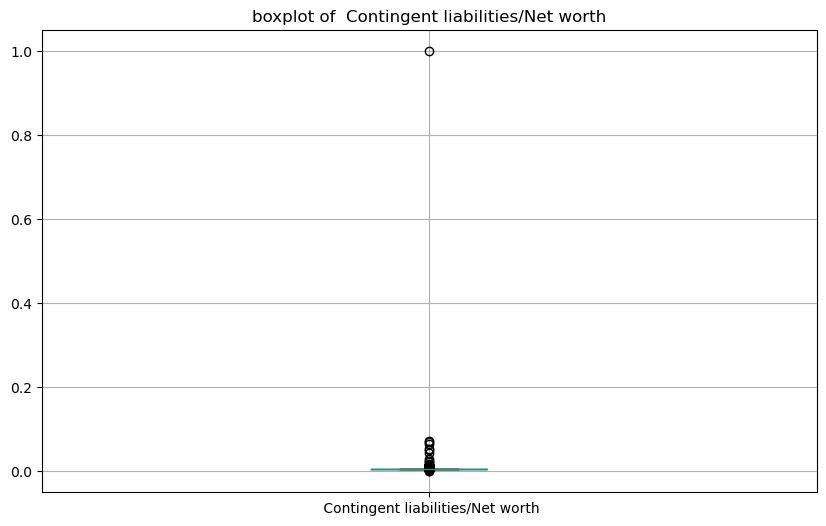

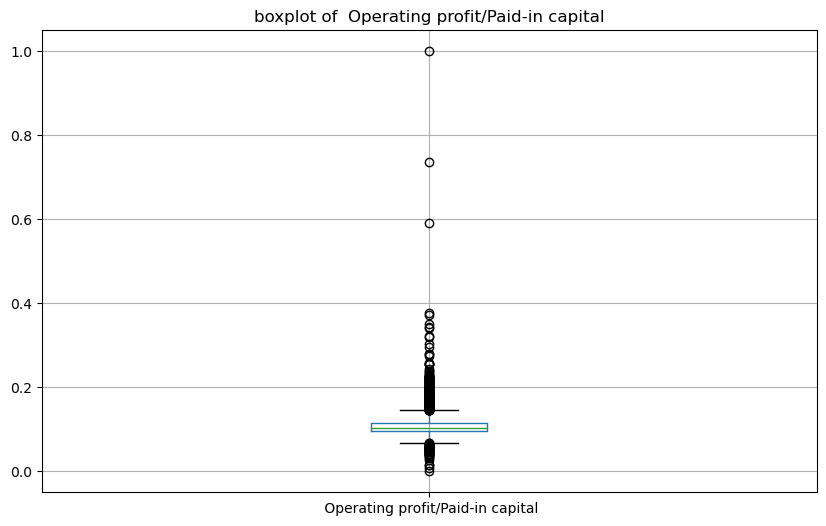

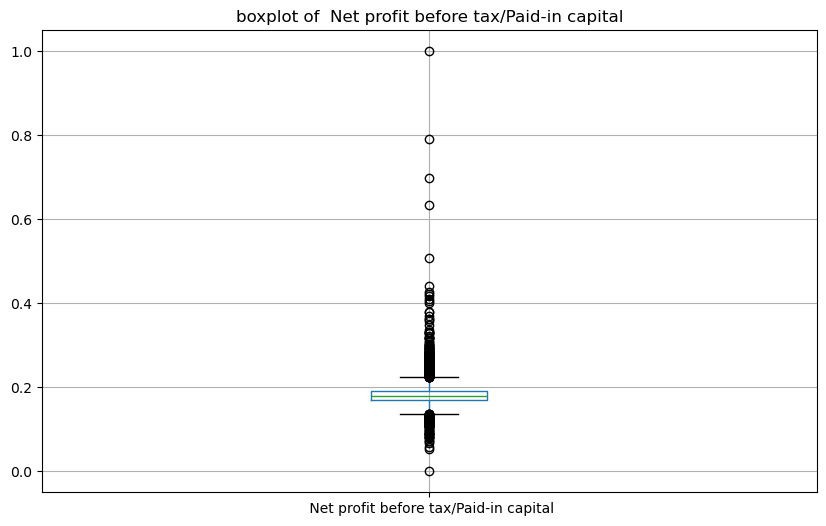

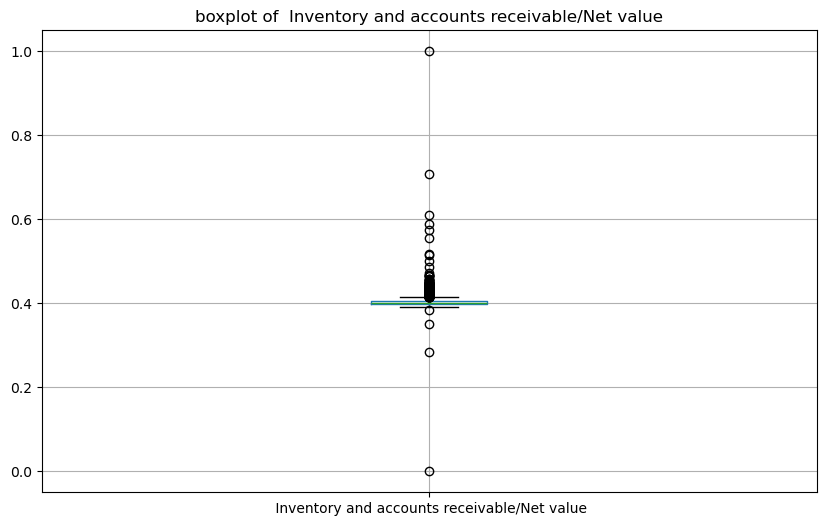

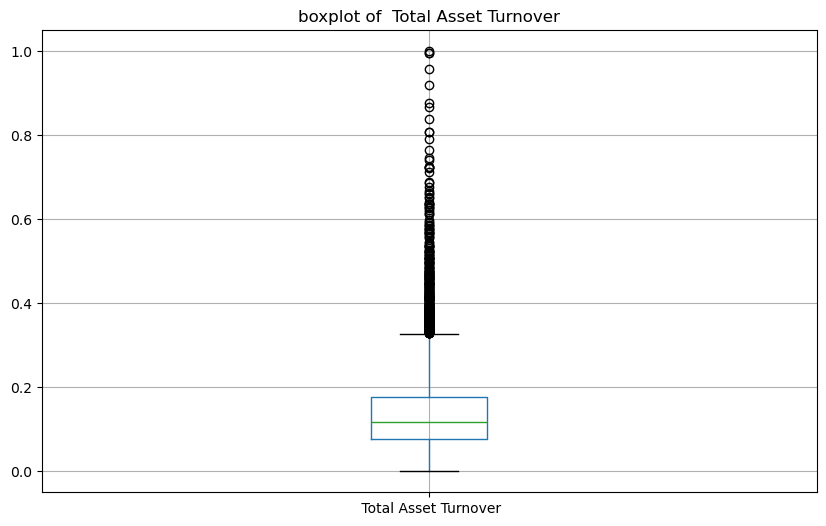

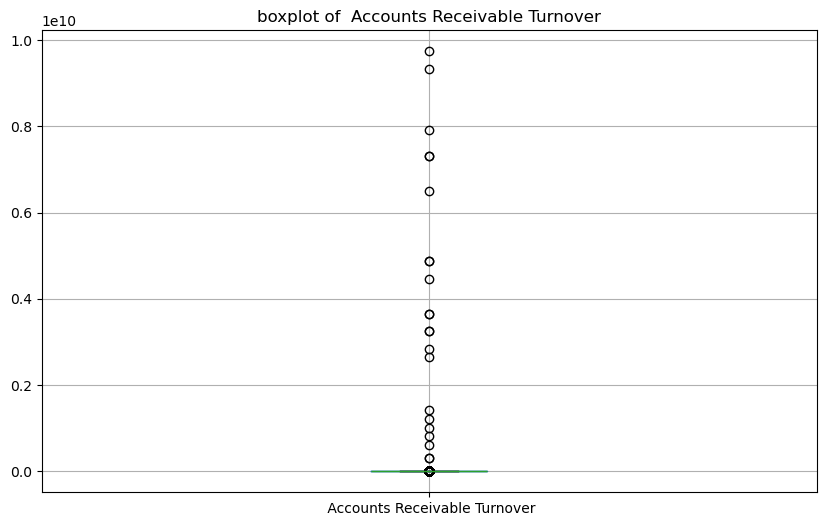

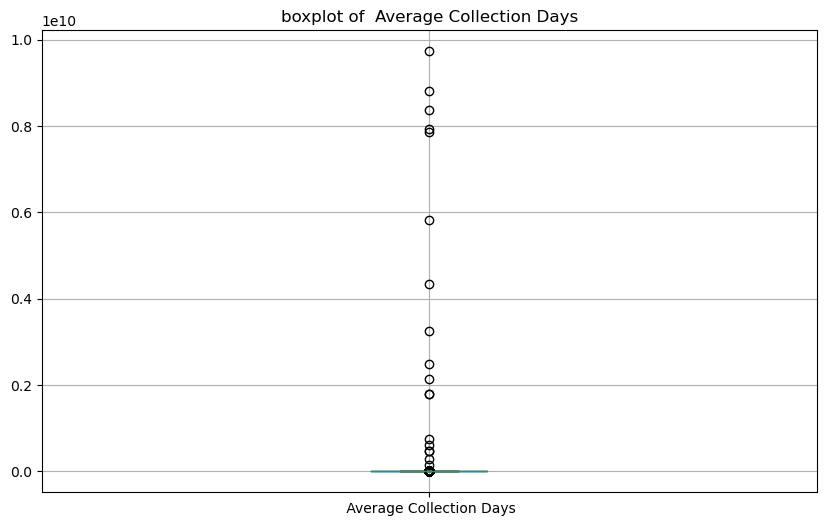

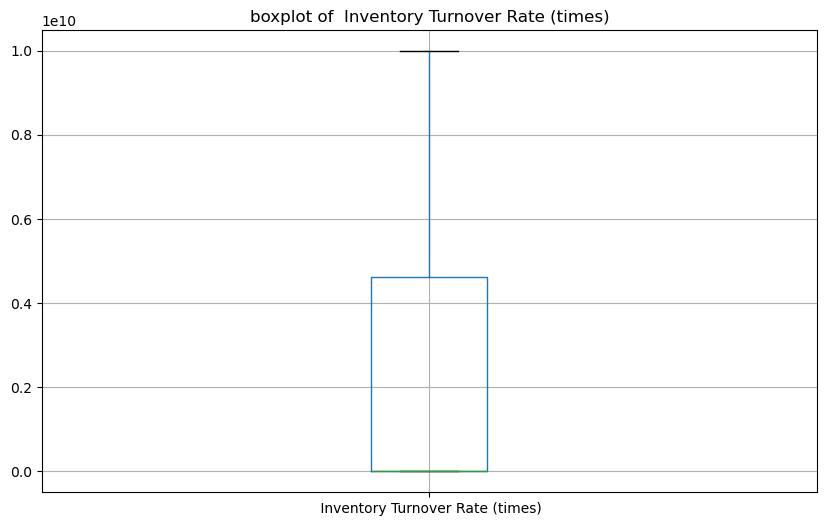

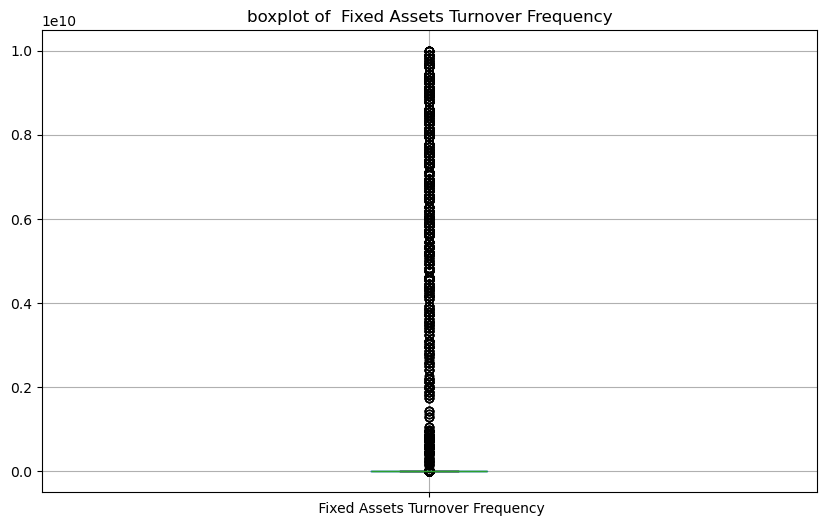

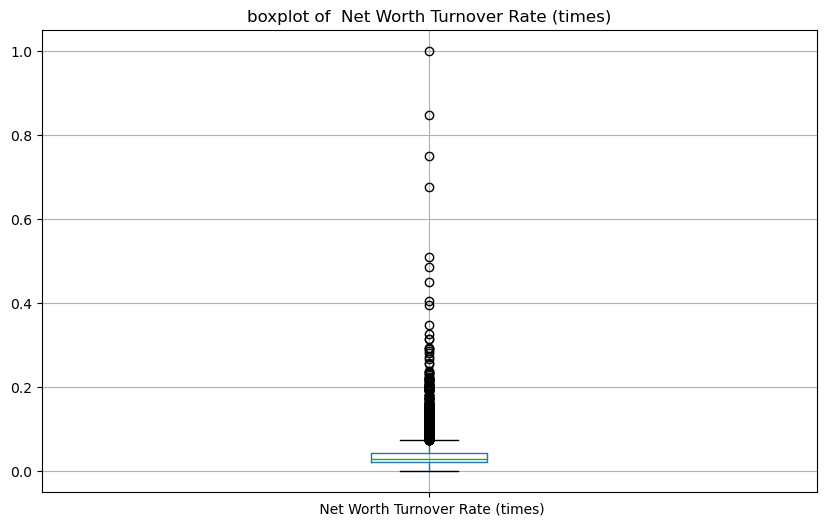

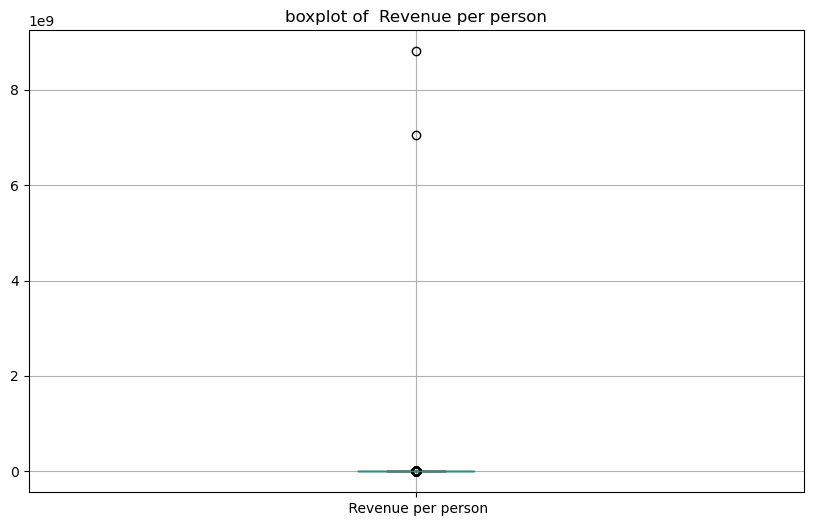

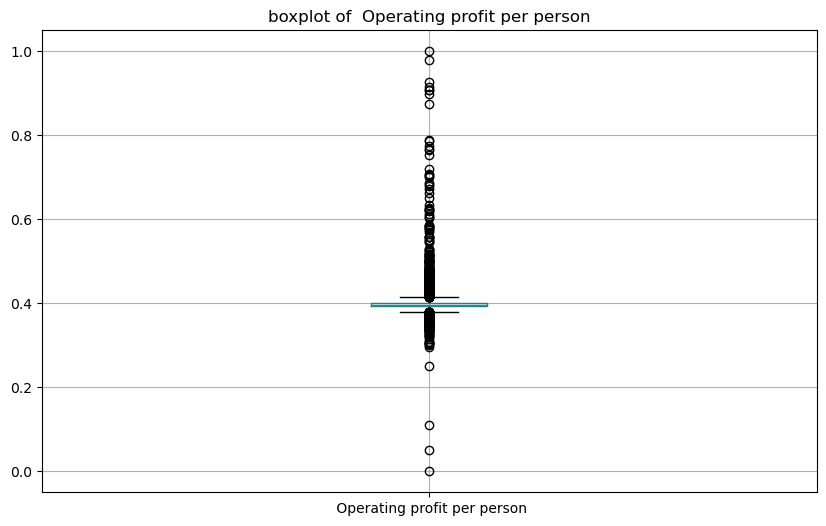

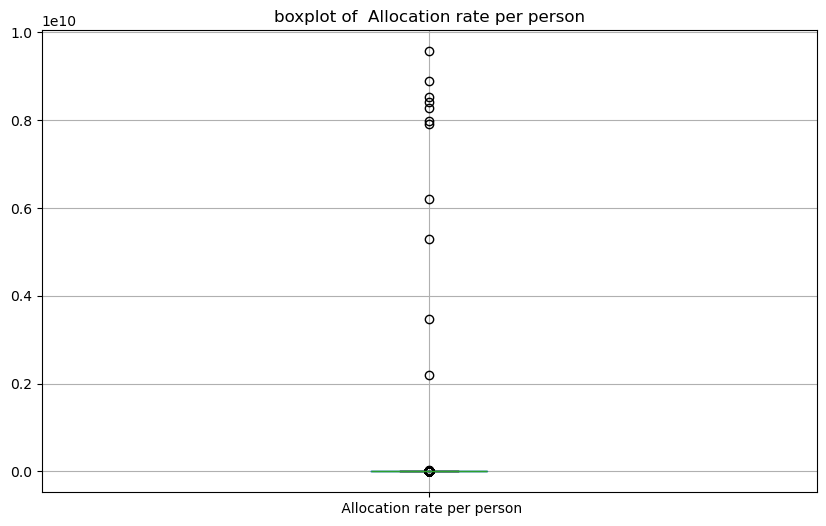

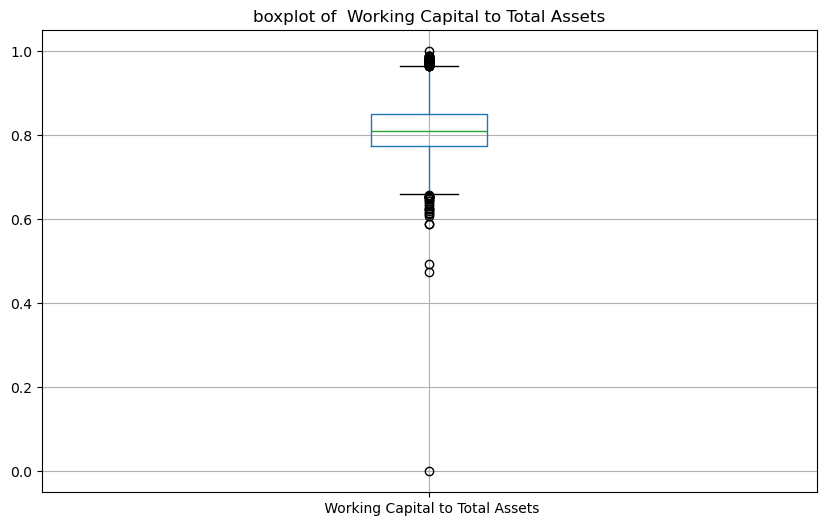

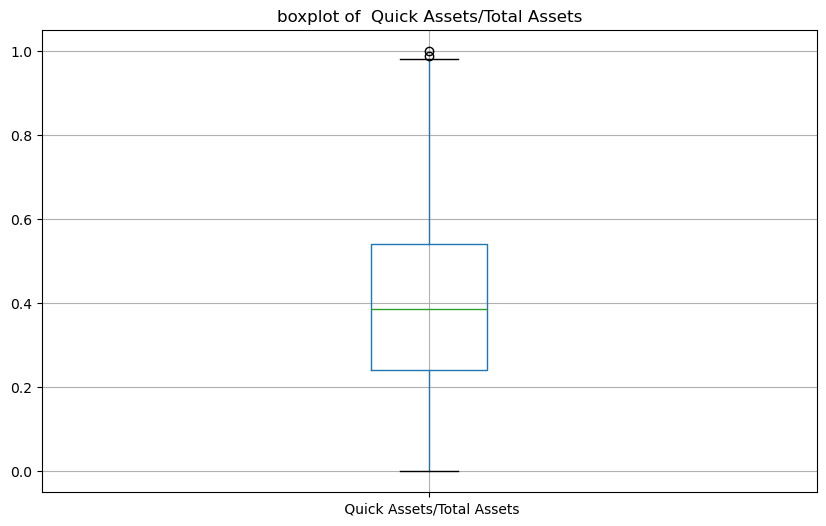

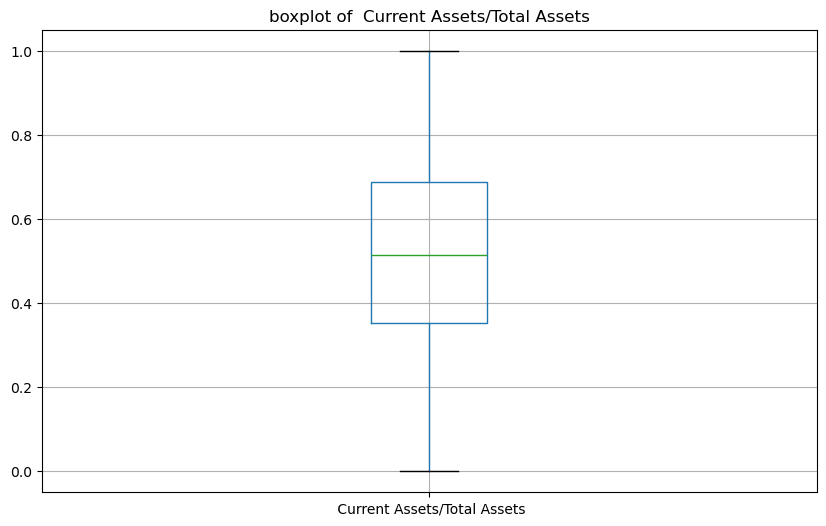

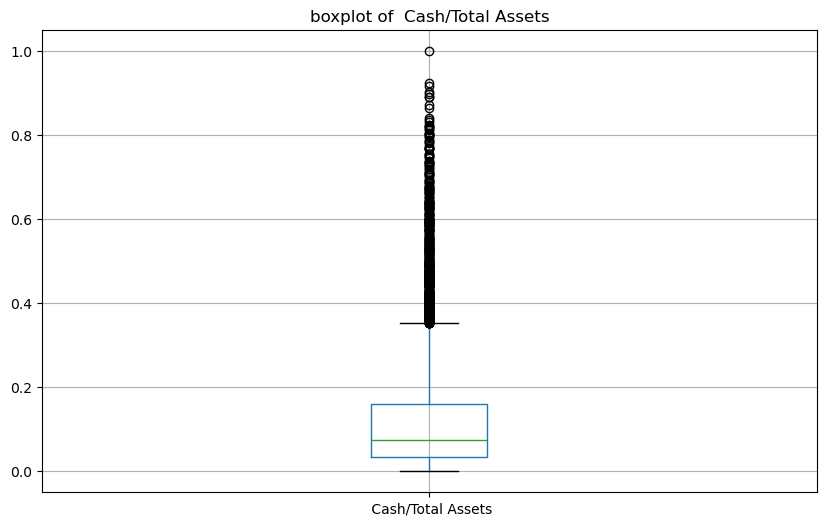

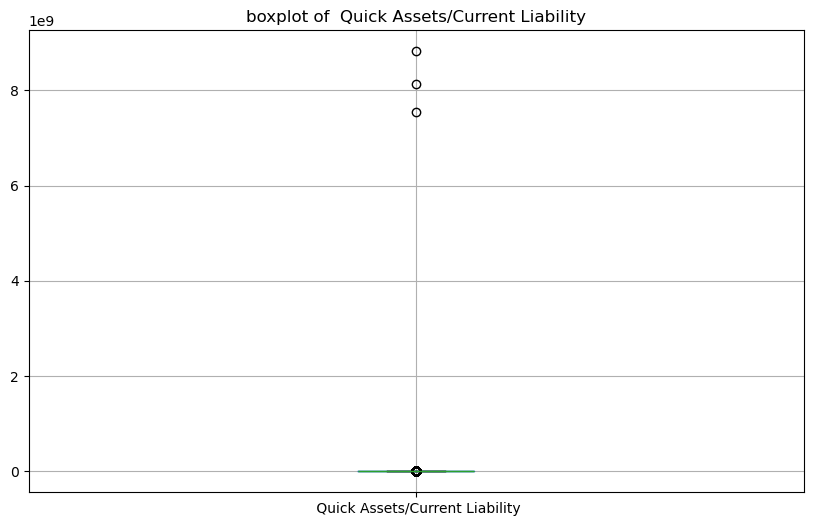

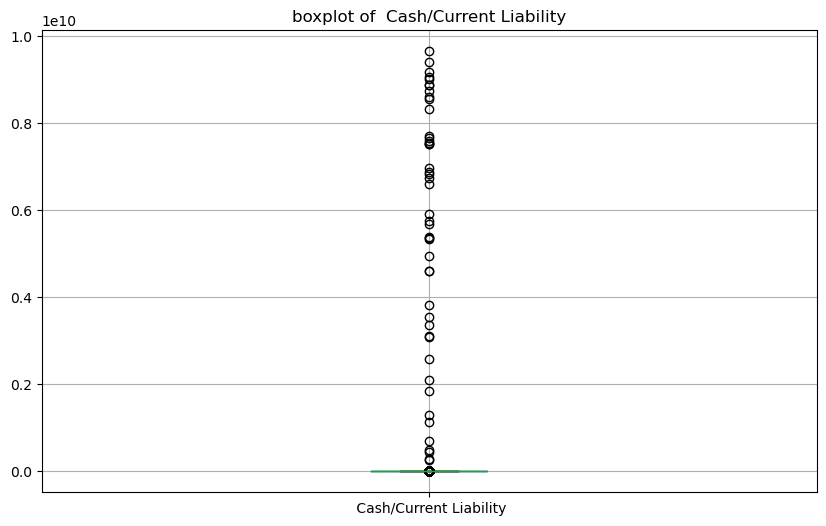

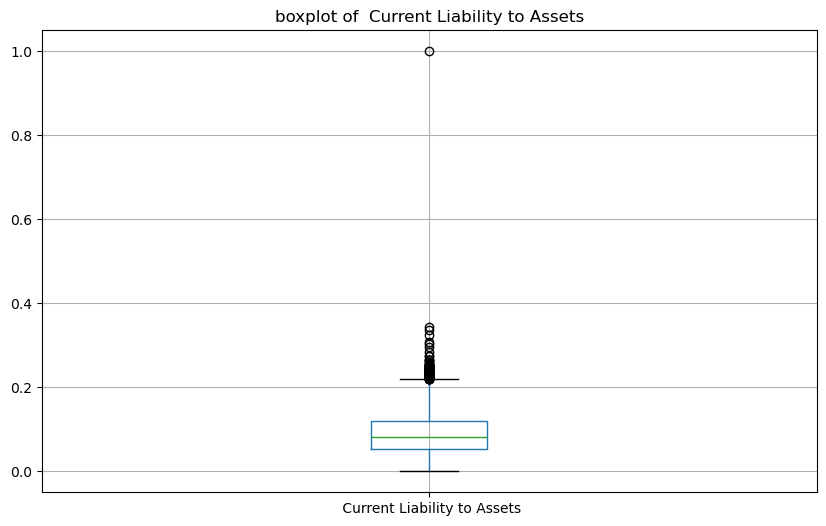

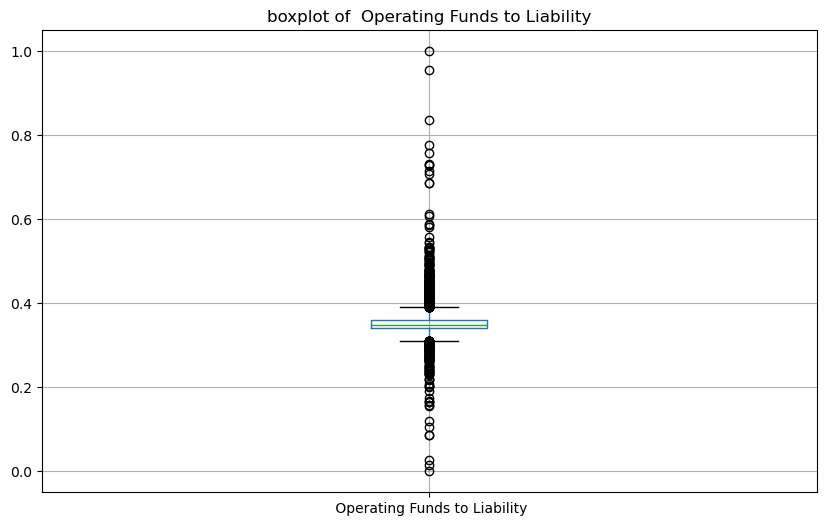

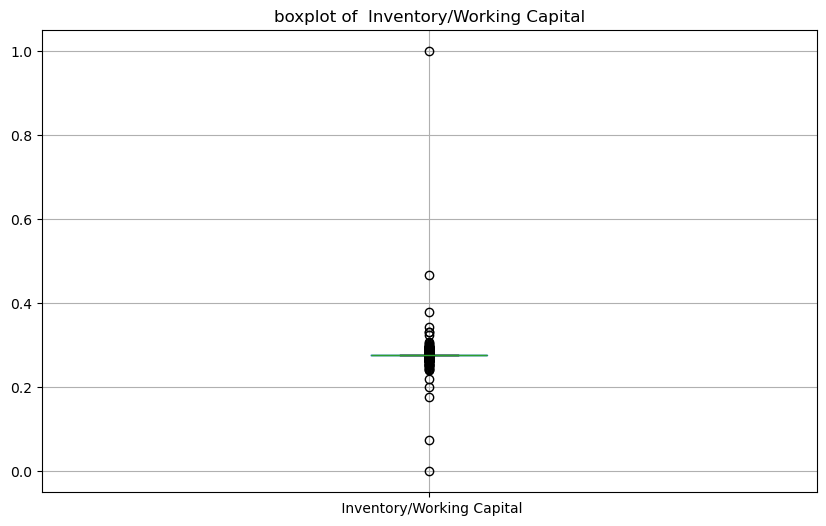

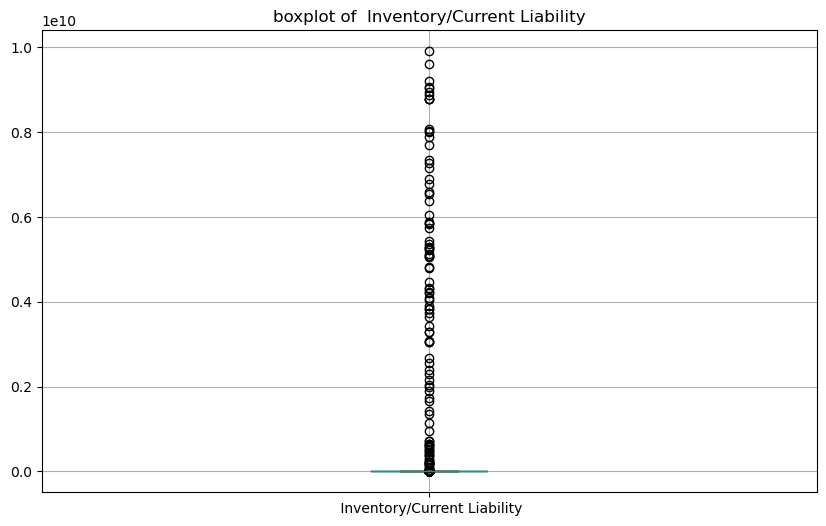

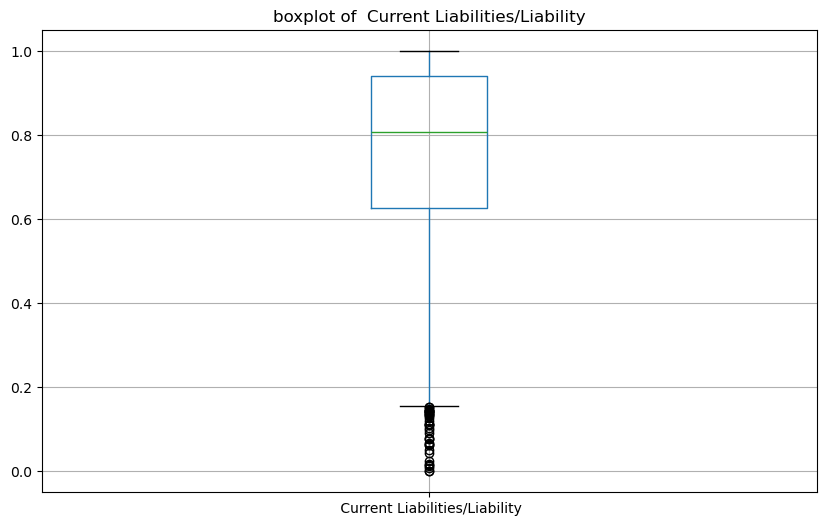

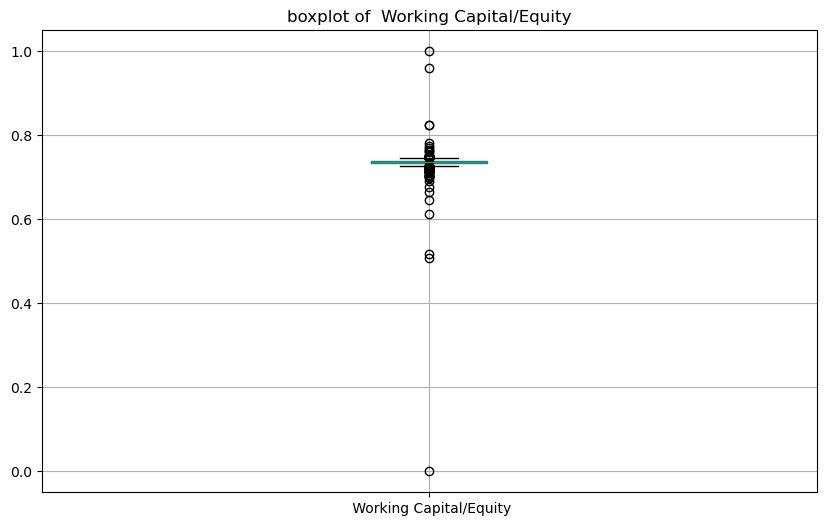

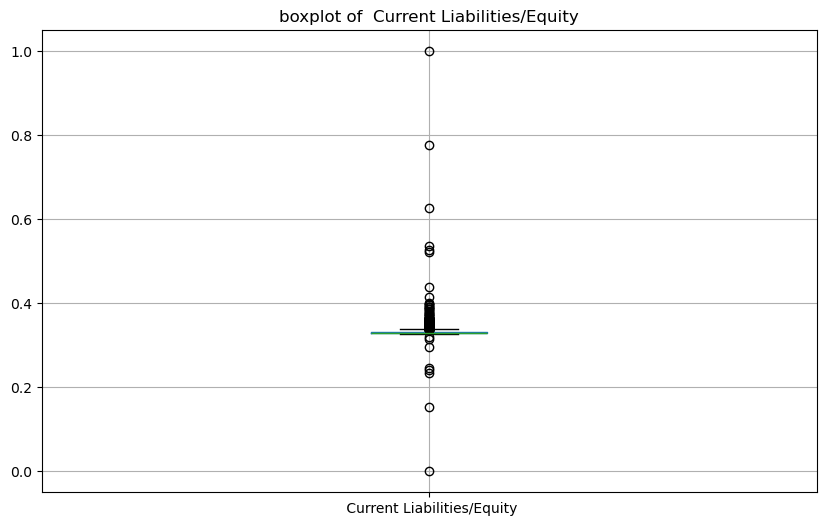

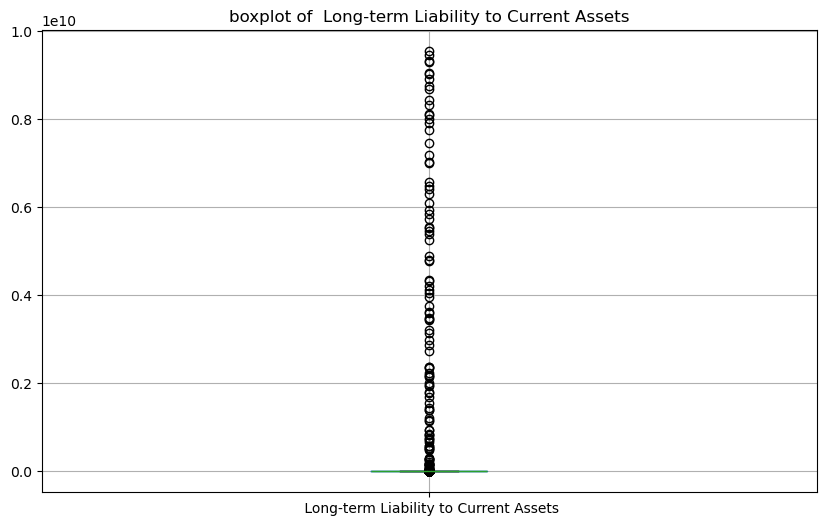

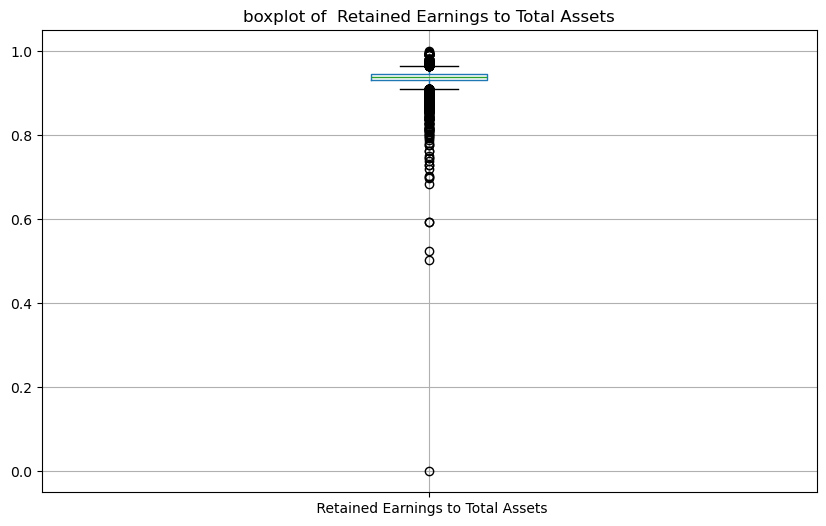

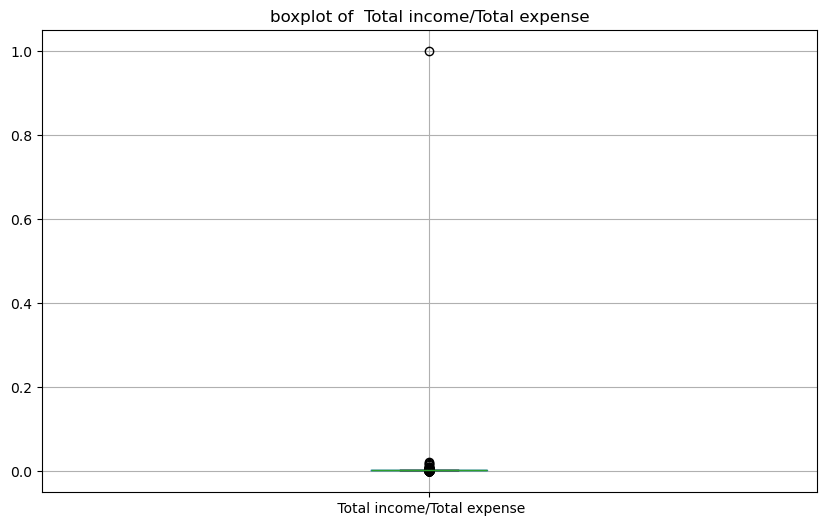

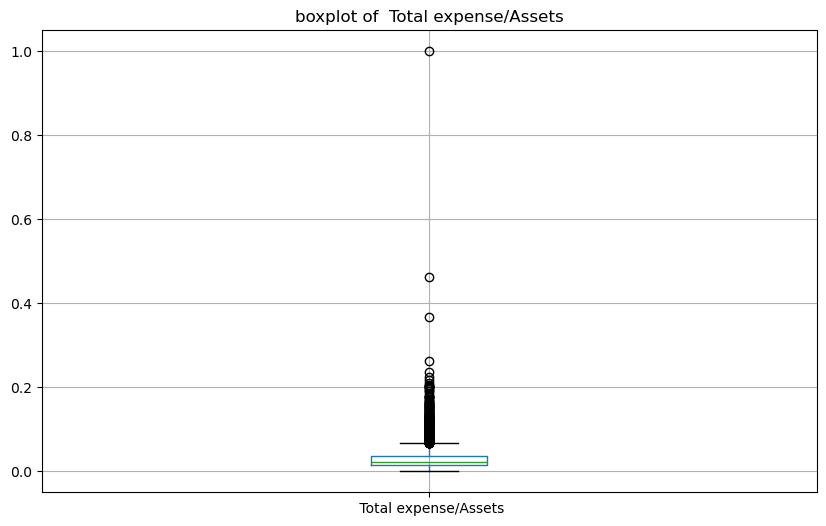

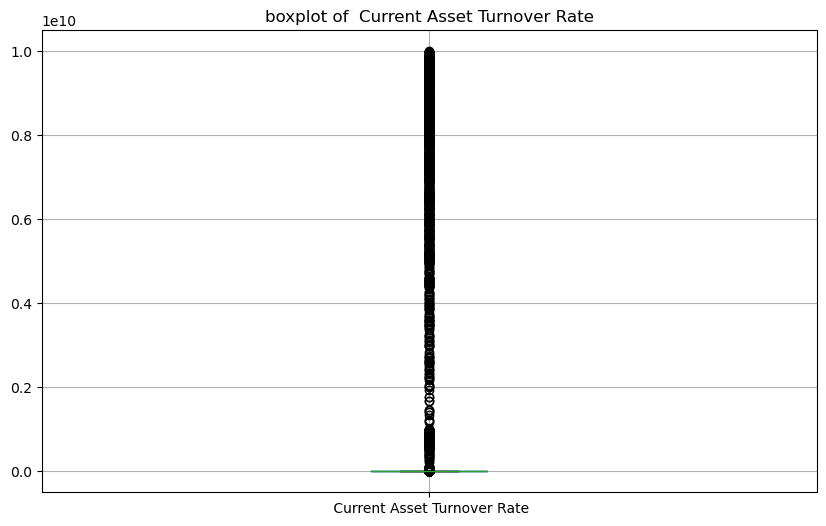

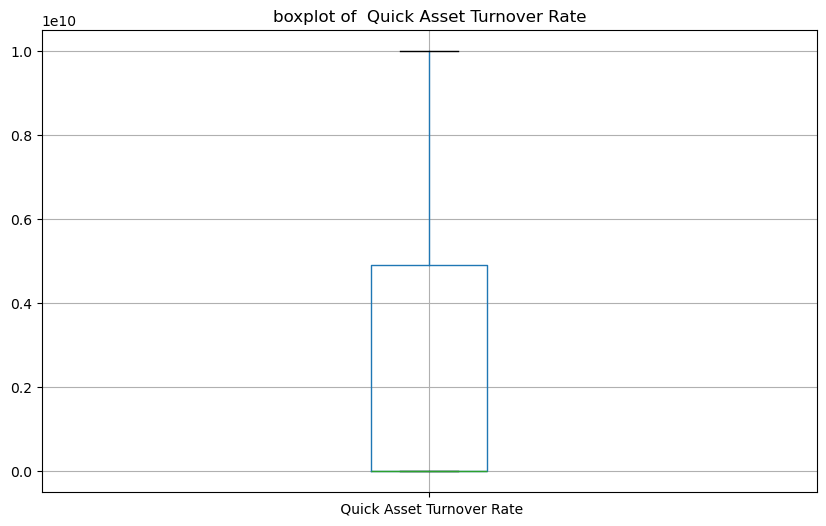

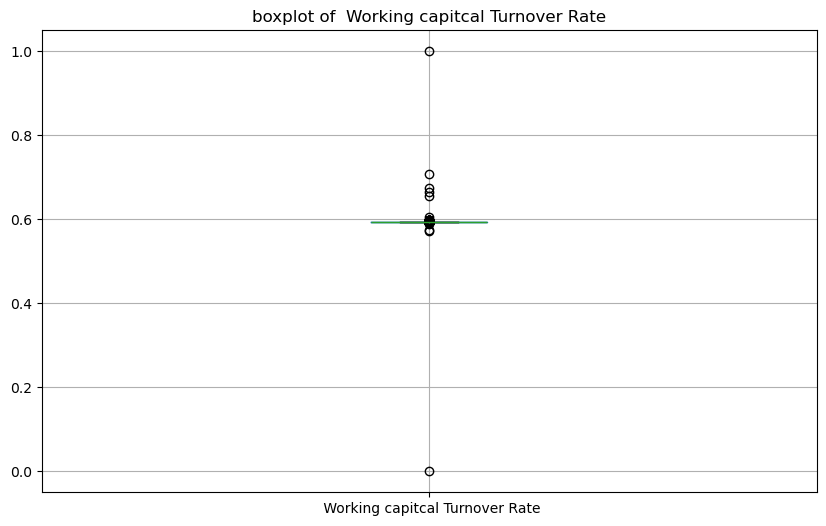

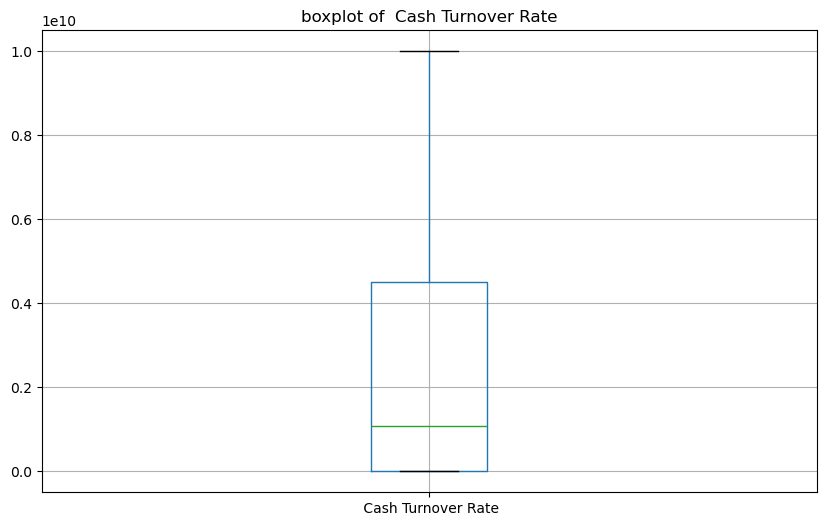

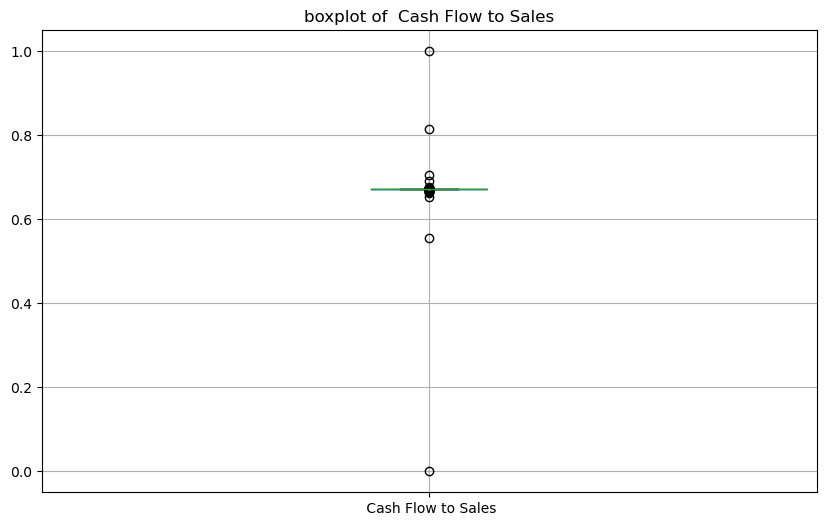

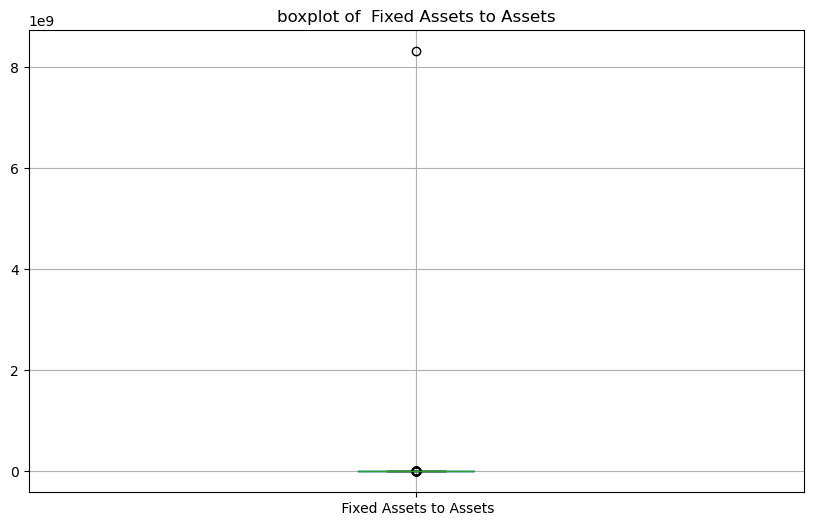

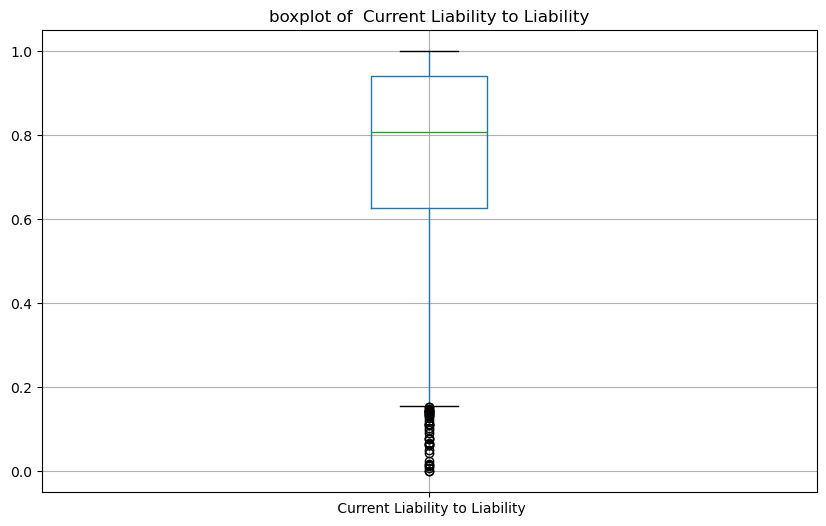

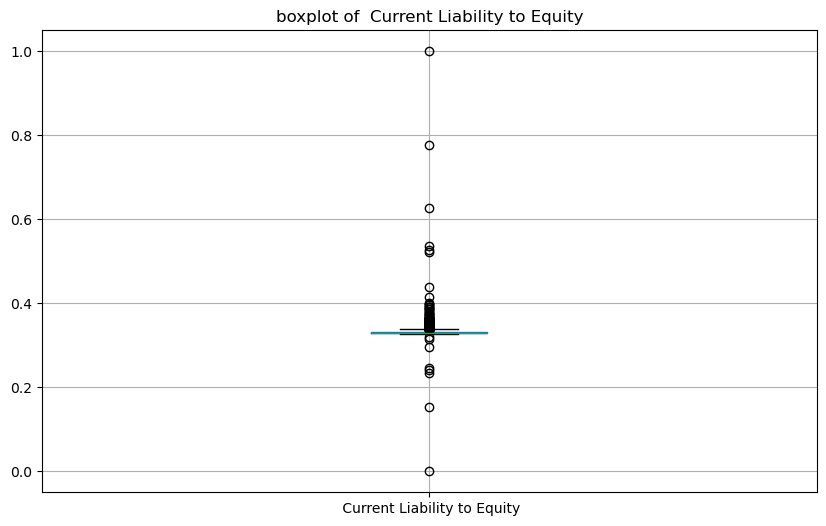

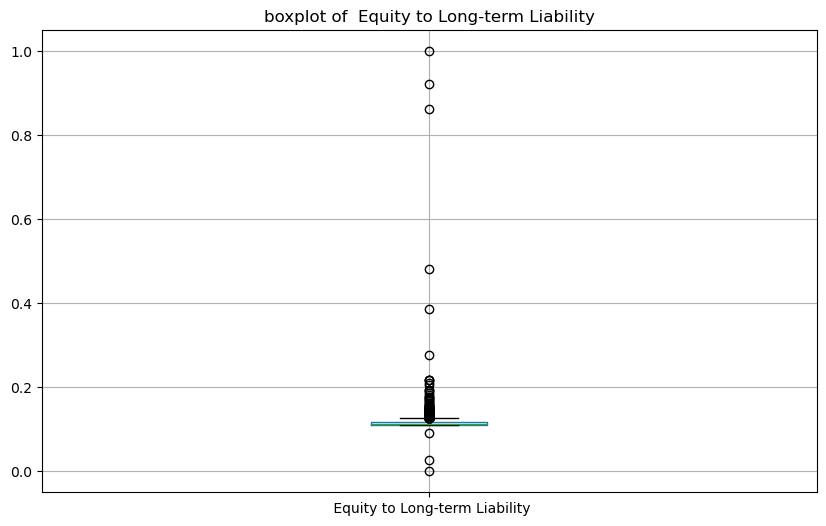

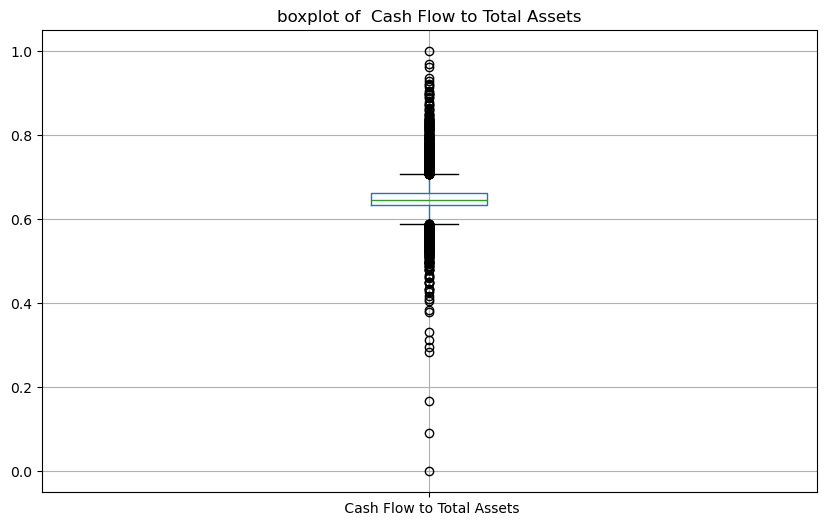

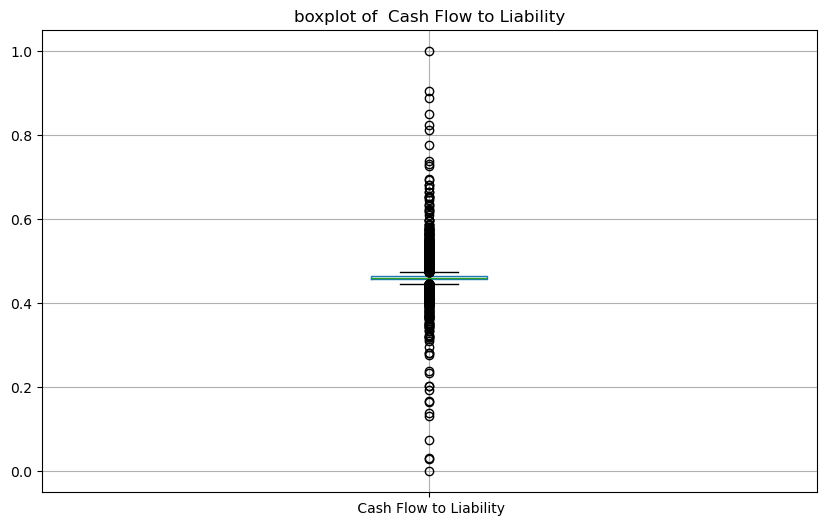

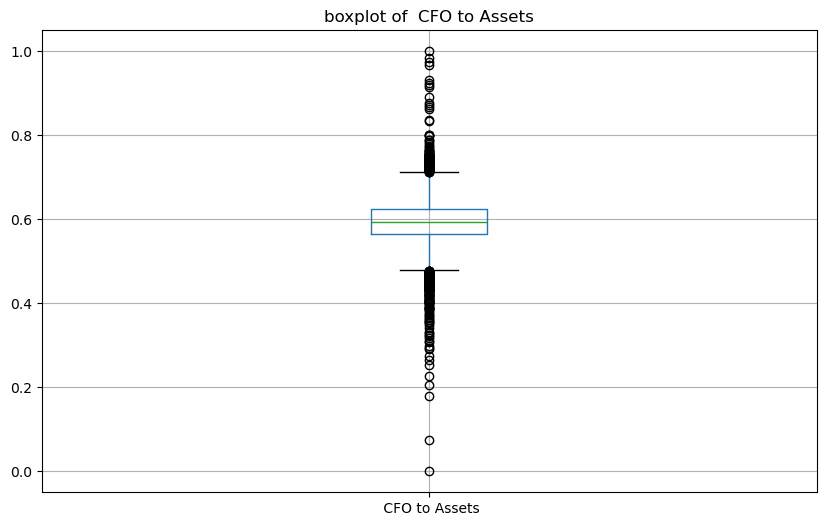

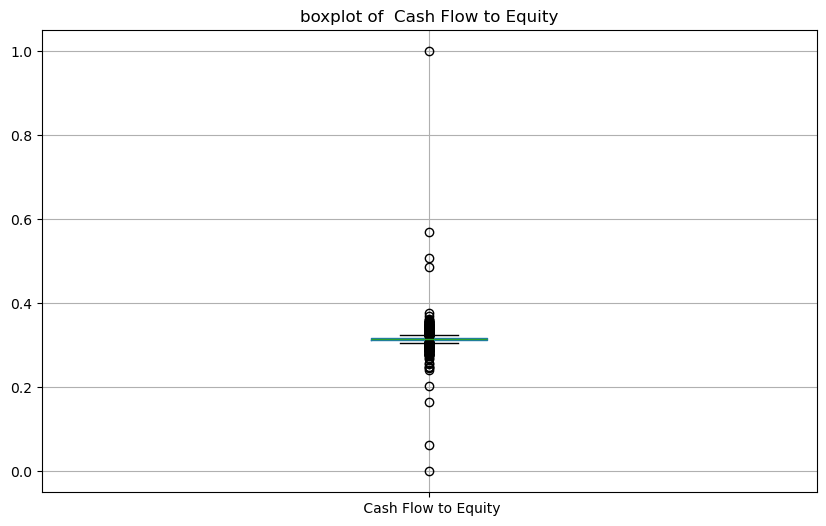

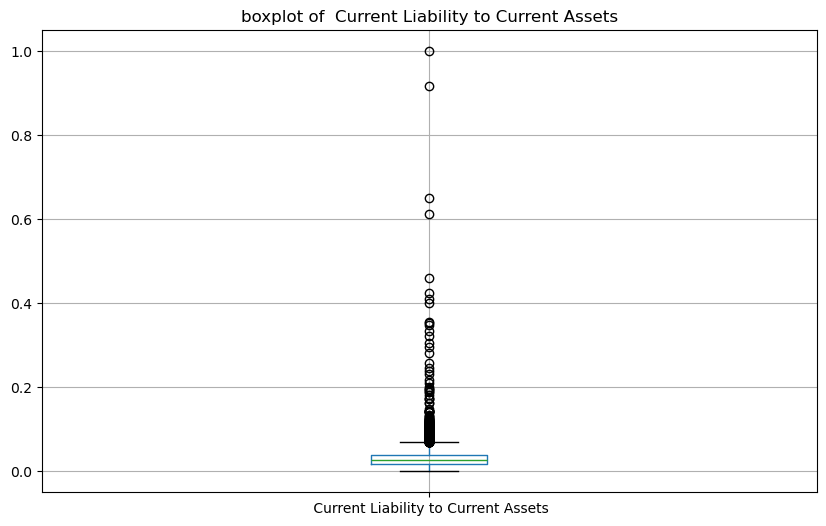

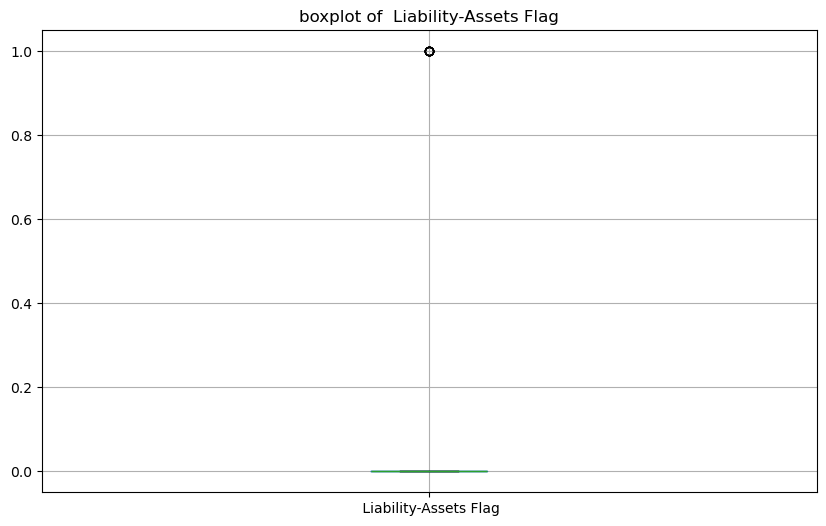

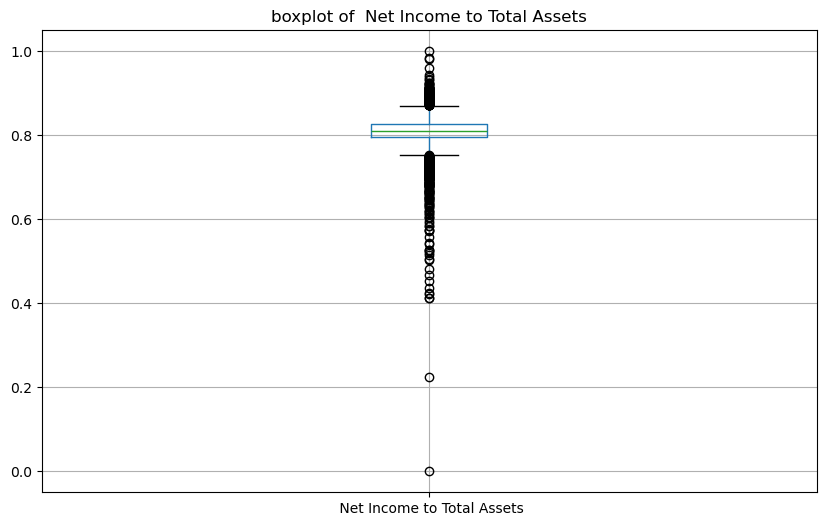

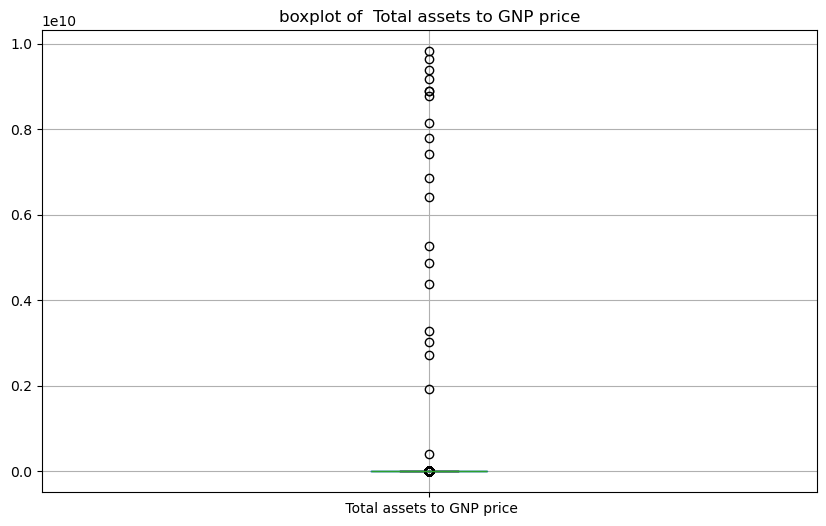

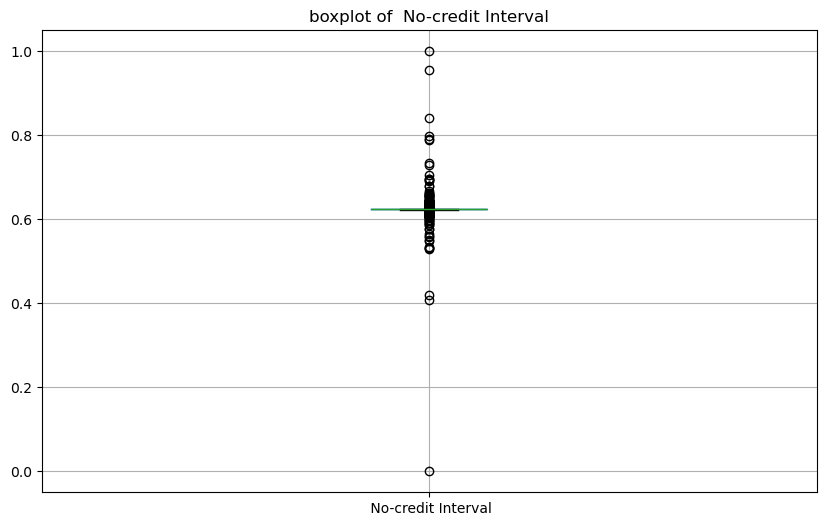

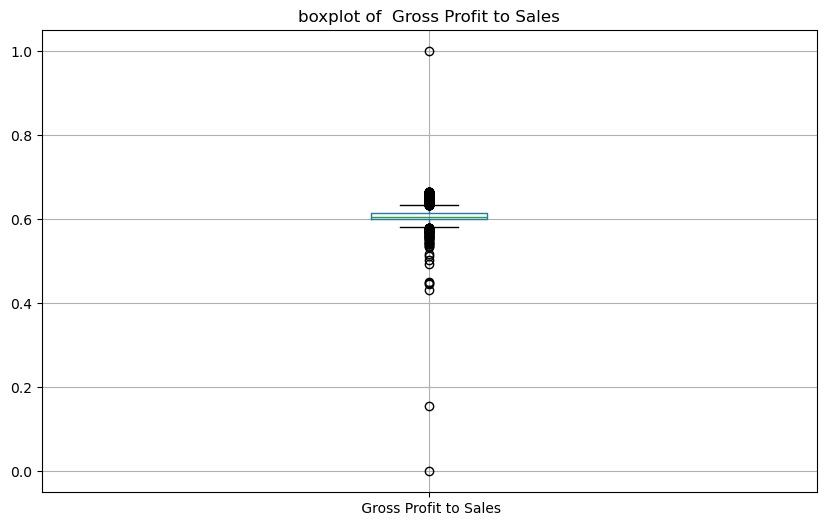

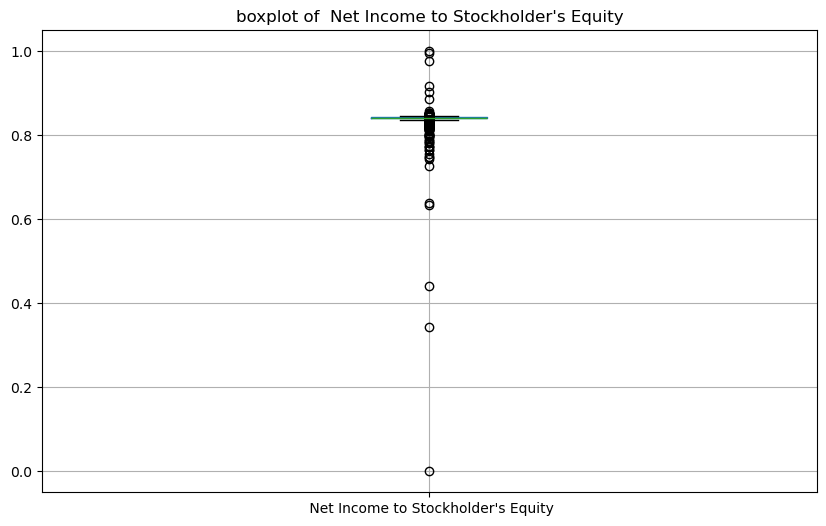

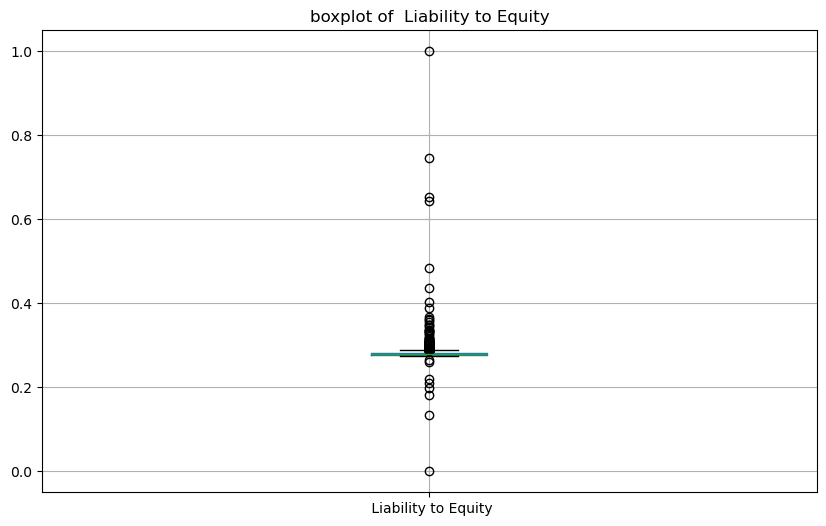

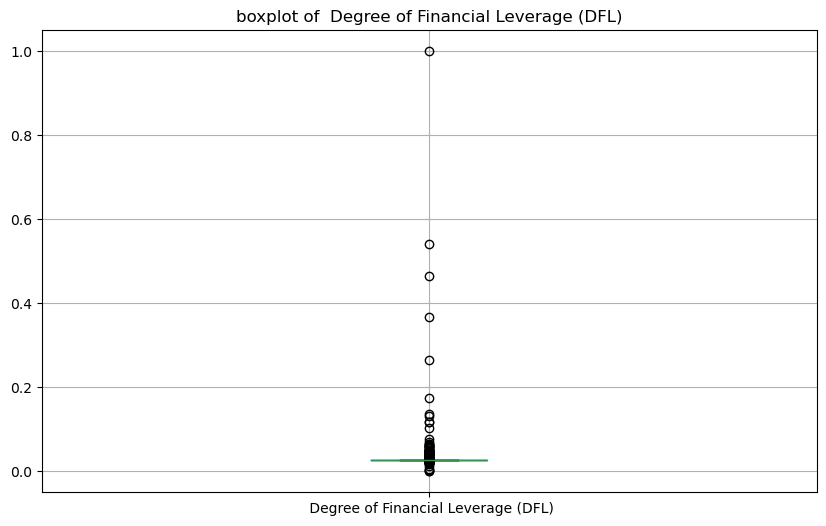

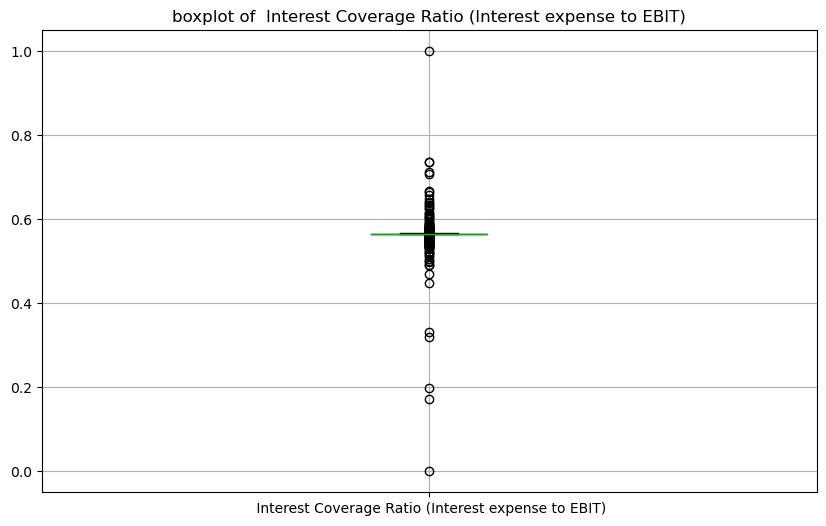

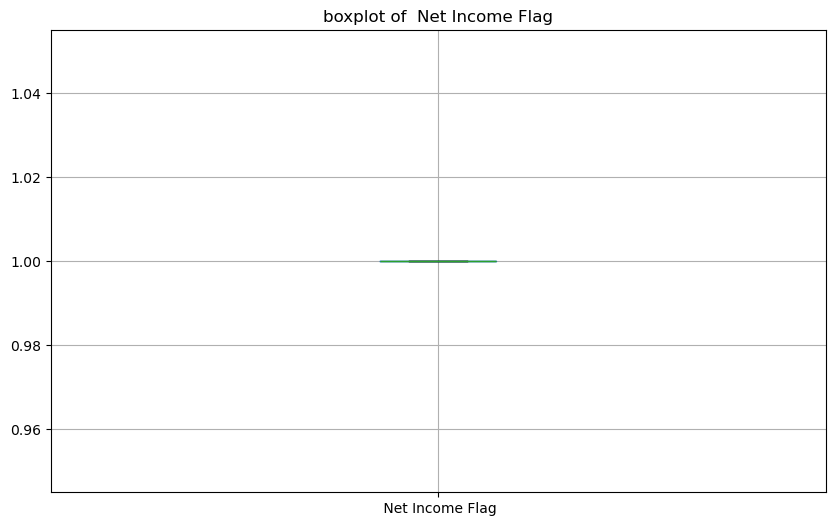

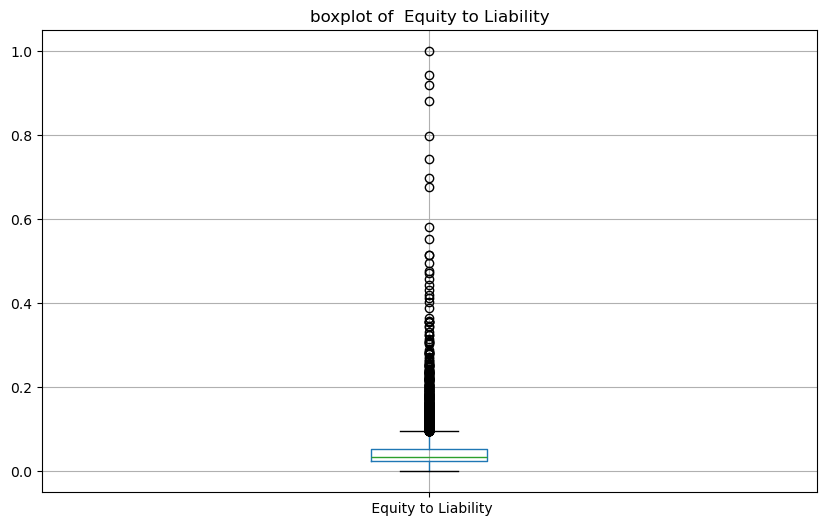

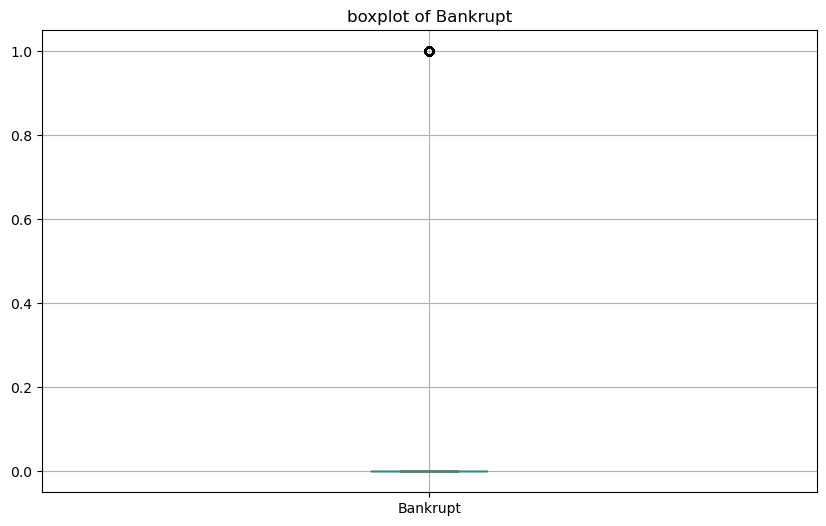

In [9]:
for column in df.columns:
    plt.figure(figsize=(10,6))
    df.boxplot(column = column)
    plt.title(f'boxplot of {column}') 

Function to remove outliers

In [10]:
def Handling_Outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [11]:
features = df.drop(columns='Bankrupt')
features.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  ...  Net Income to Total Assets  \
0                              0.780985  ...                    0.716845   
1                              0.781506  ...                    0.795297   
2                              0.780284  ...                    0.774670   
3                              0.781241  ...                    0.739555   
4                              0.781550  ...                    0.795016   

   Total assets to GNP price  No-credit Interval  Gross Profit to Sales  \
0                   0.009219            0.622879               0.601453   
1                   0.008323            0.623652               0.610237   
2                   0.040003            0.623841               0.601449   
3                   0.003252            0.622929               0.583538   
4                   0.003878            0.623521               0.598782   

   Net Income to Stockholder's Equity  Liability to Equity  \
0                            0.827890             0.290202   
1                            0.839969             0.283846   
2                            0.836774             0.290189   
3                            0.834697             0.281721   
4                            0.839973             0.278514   

   Degree of Financial Leverage (DFL)  \
0                            0.026601   
1                            0.264577   
2                            0.026555   
3                            0.026697   
4                            0.024752   

   Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                          

In [12]:
df1 = Handling_Outliers(features)
df1.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.442034                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998781   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797096                     0.809075   
1                   0.797380                     0.809301   
2                   0.797096                     0.809075   
3                   0.797096                     0.809075   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.303288   
1                                     0.303556   
2                                     0.303288   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  ...  Net Income to Total Assets  \
0                              0.781314  ...                    0.752193   
1                              0.781506  ...                    0.795297   
2                              0.781314  ...                    0.774670   
3                              0.781314  ...                    0.752193   
4                              0.781550  ...                    0.795016   

   Total assets to GNP price  No-credit Interval  Gross Profit to Sales  \
0                   0.009219            0.622879               0.601453   
1                   0.008323            0.623652               0.610237   
2                   0.011819            0.623841               0.601449   
3                   0.003252            0.622929               0.583538   
4                   0.003878            0.623521               0.598782   

   Net Income to Stockholder's Equity  Liability to Equity  \
0                            0.836752             0.288207   
1                            0.839969             0.283846   
2                            0.836774             0.288207   
3                            0.836752             0.281721   
4                            0.839973             0.278514   

   Degree of Financial Leverage (DFL)  \
0                            0.026608   
1                            0.027096   
2                            0.026608   
3                            0.026697   
4                            0.026608   

   Interest Coverage Ratio (Interest expense to EBIT)  Net Income Flag  \
0                                           0.564309                 1   
1                                           0.566574                 1   
2                                           0.564309                 1   
3                                          

In [13]:
df1['Bankrupt'] = df['Bankrupt']
df1.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Total assets to GNP price  \
0                               0.781314  ...                    0.009219   
1                               0.781506  ...                    0.008323   
2                               0.781314  ...                    0.011819   
3                               0.781314  ...                    0.003252   
4                               0.781550  ...                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.836752              0.288207   
1                             0.839969              0.283846   
2                             0.836774              0.288207   
3                             0.836752              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026608   
1                             0.027096   
2                             0.026608   
3                             0.026697   
4                             0.026608   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564309                   1   
1                                           0.566574                   1   
2                                           0.564309                   1   
3                                           0.564663                   1   
4                               

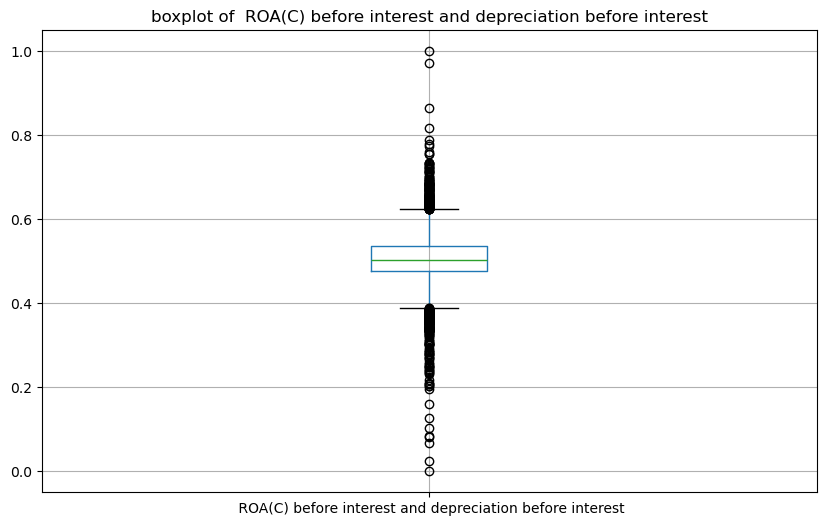

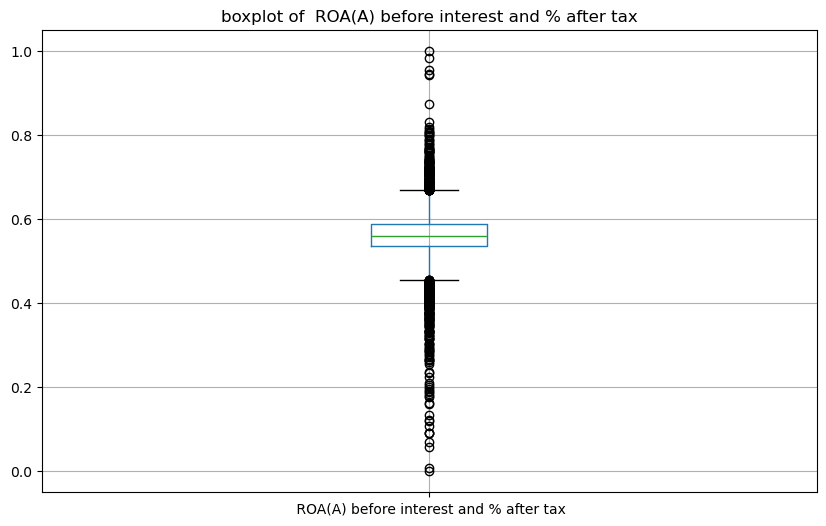

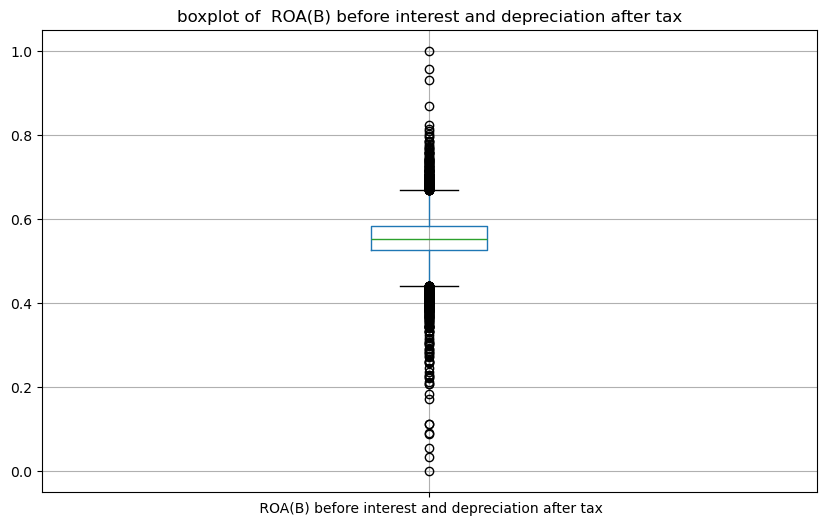

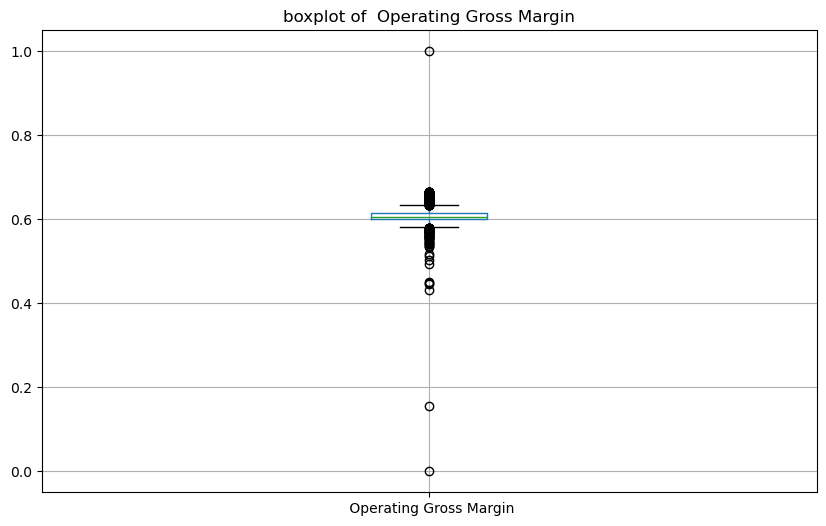

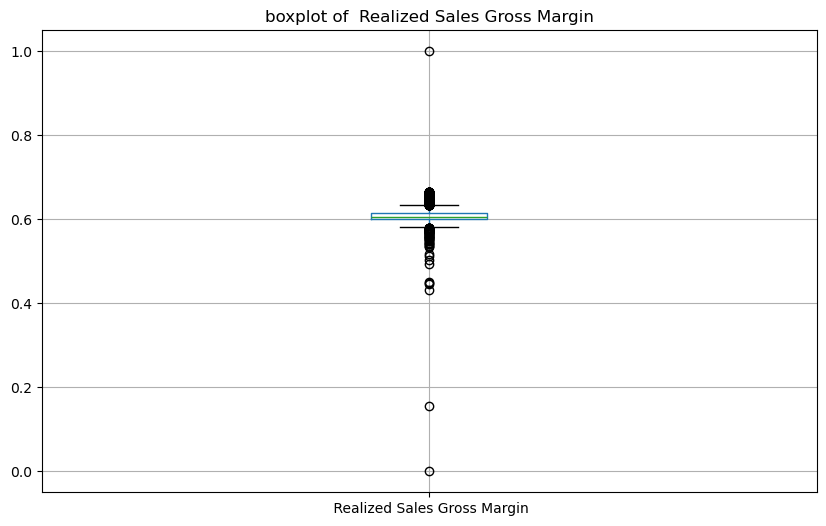

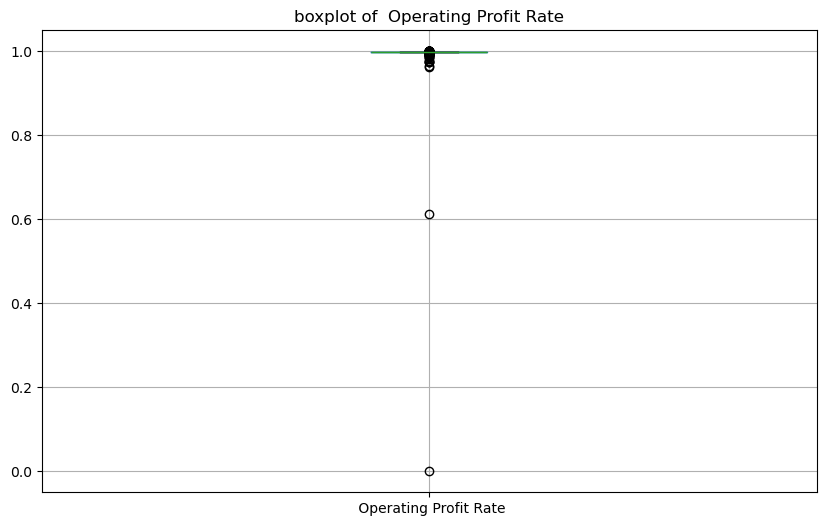

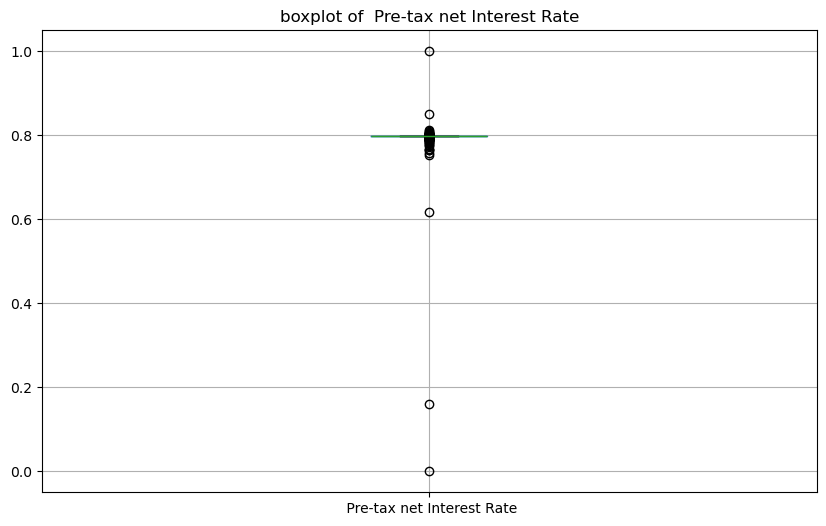

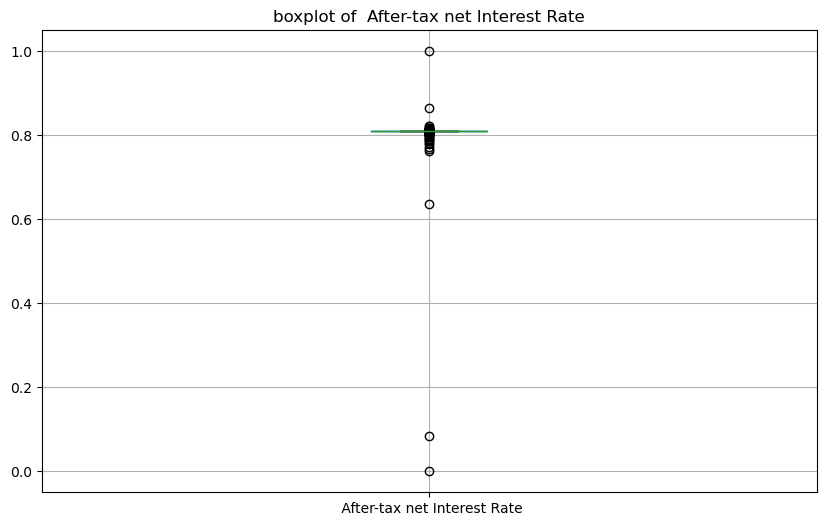

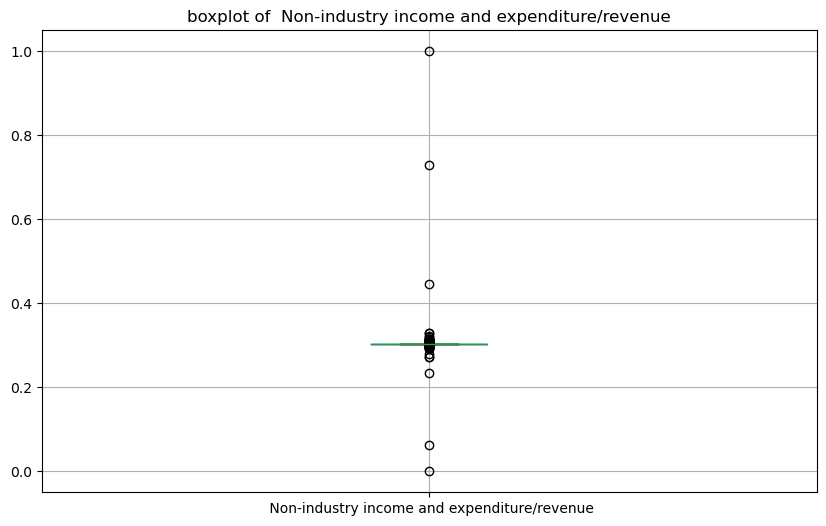

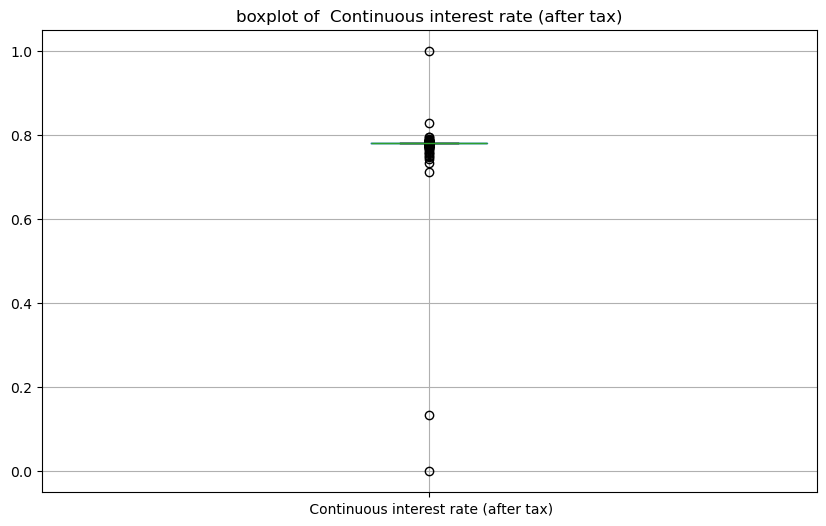

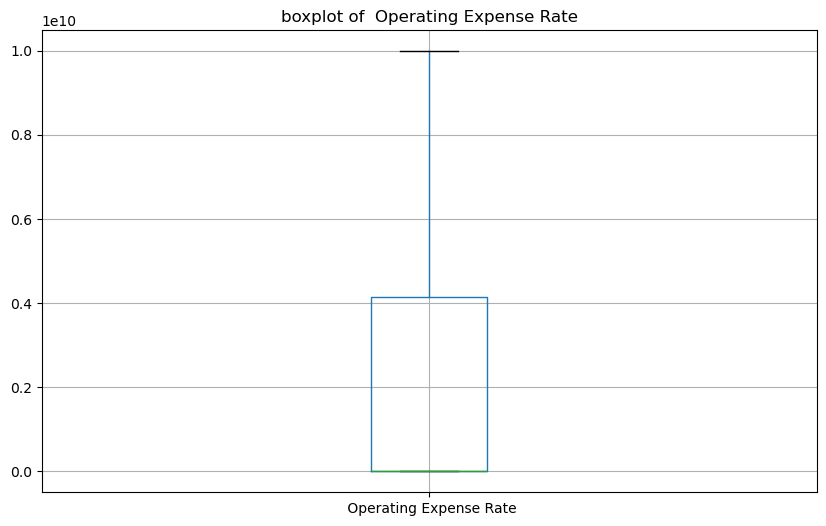

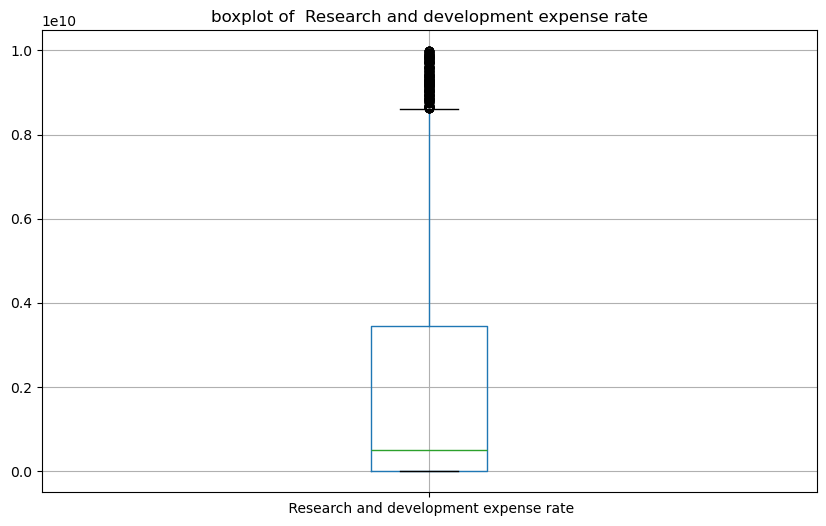

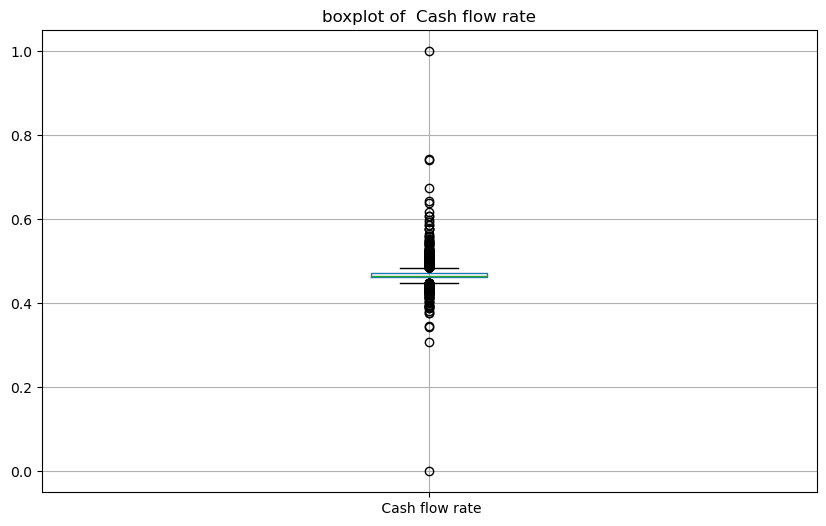

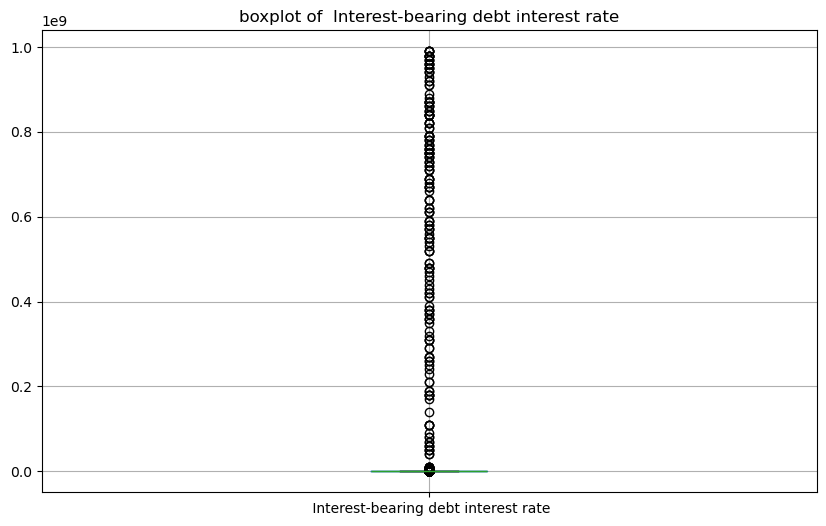

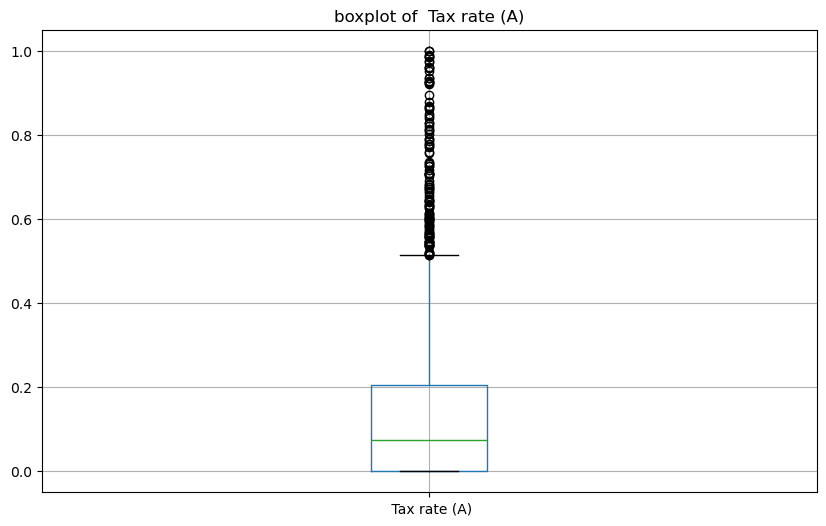

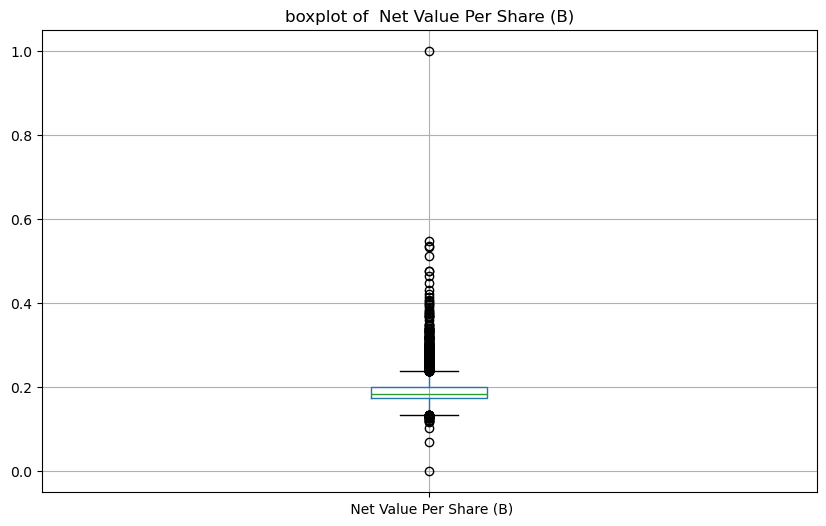

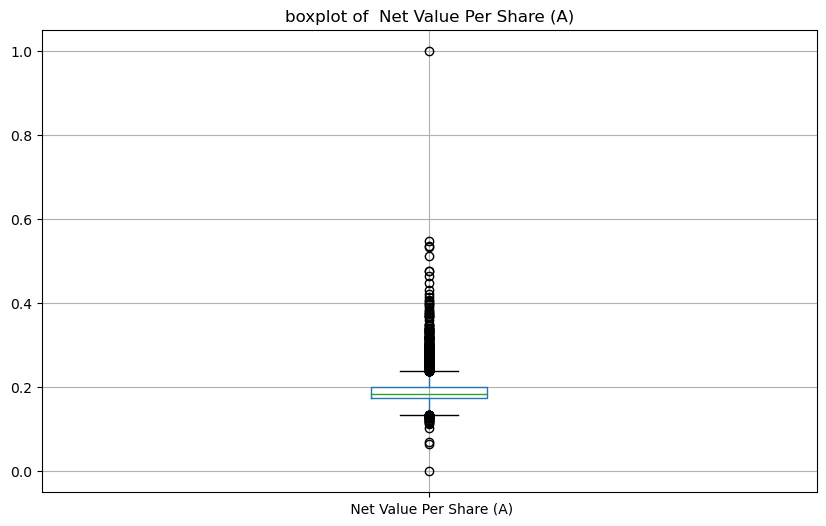

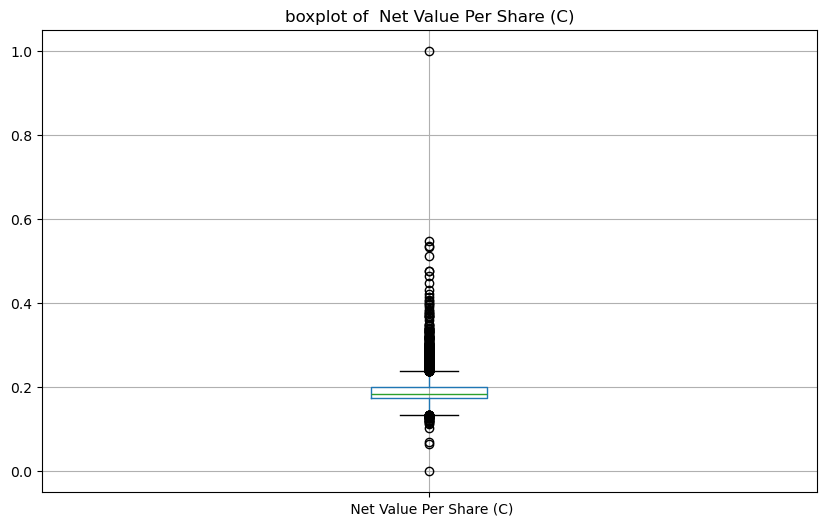

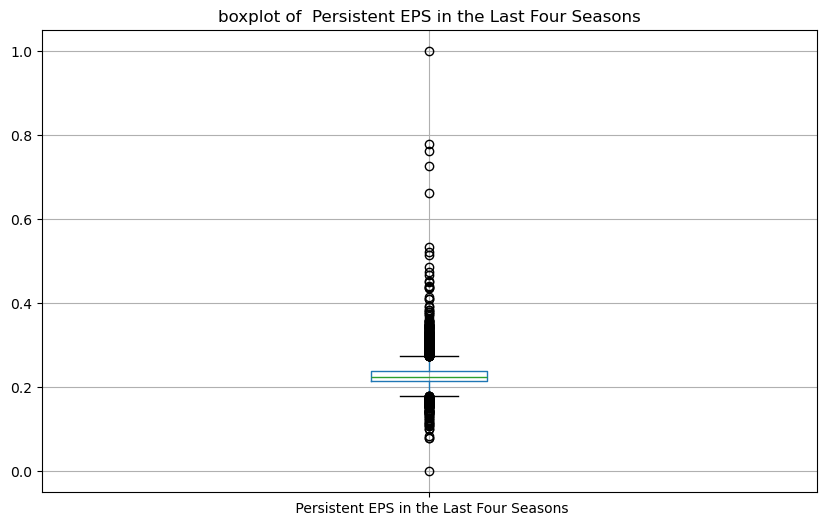

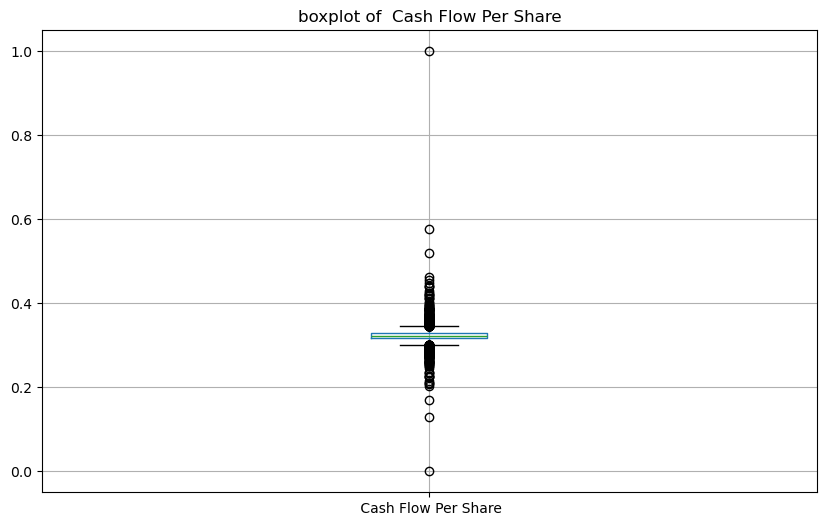

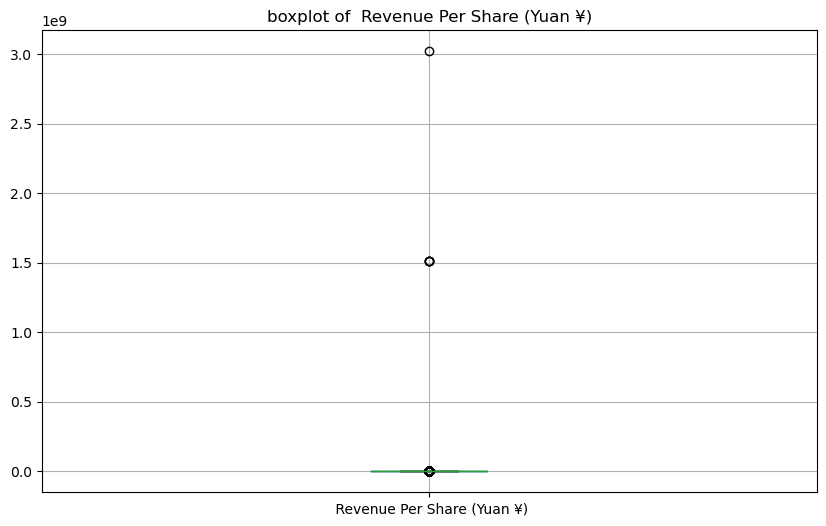

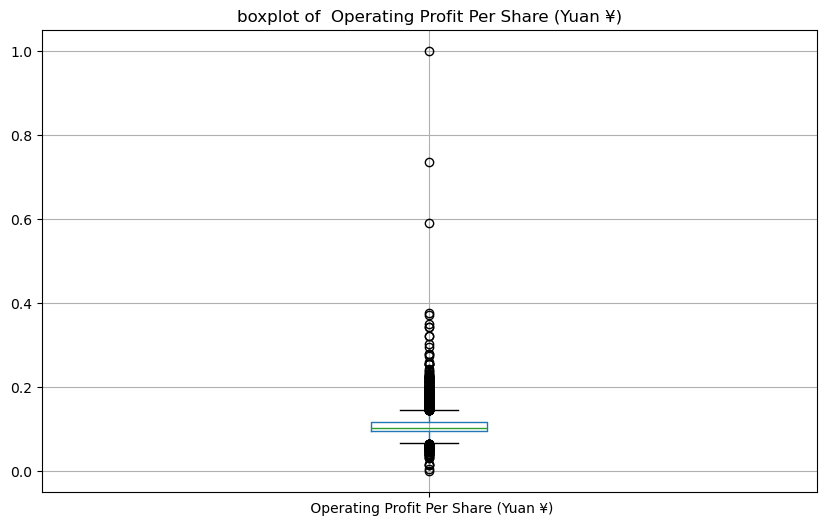

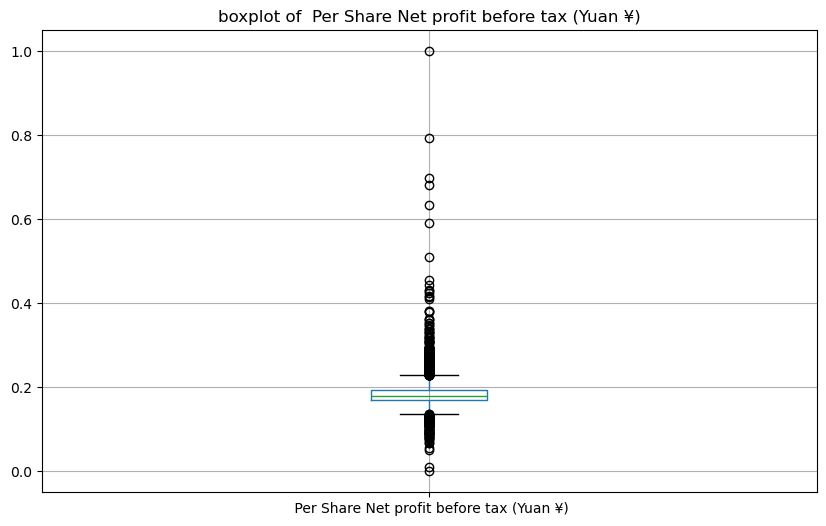

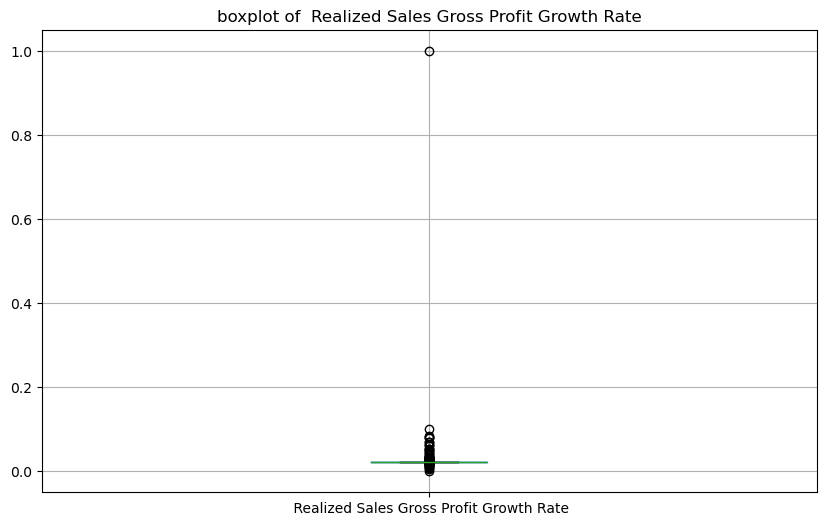

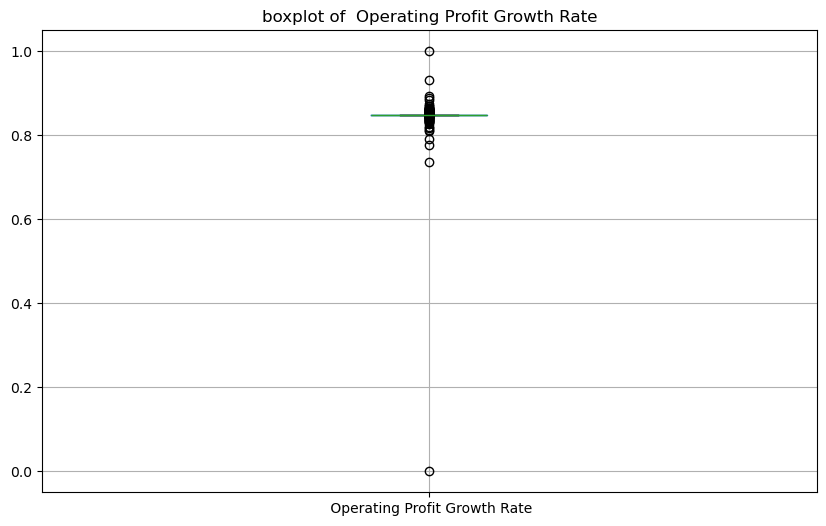

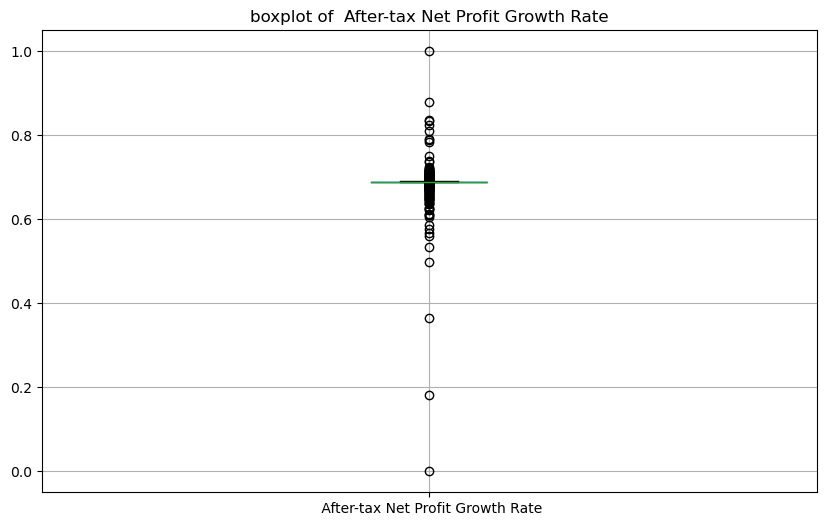

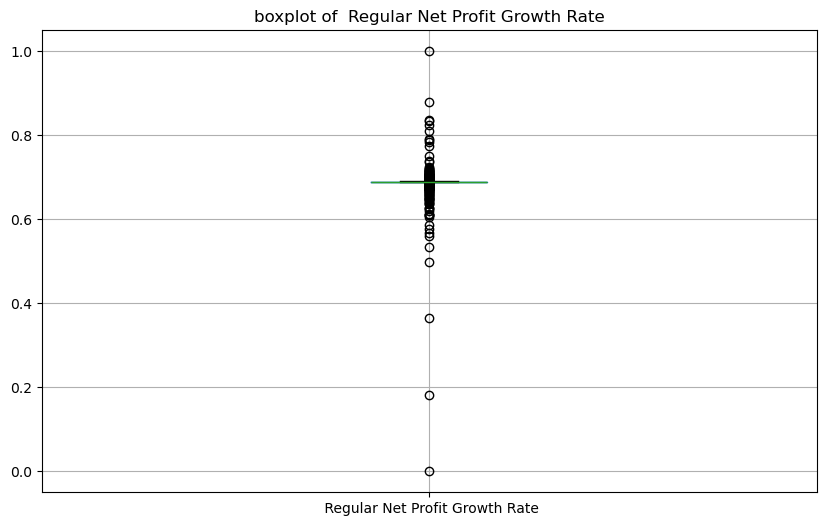

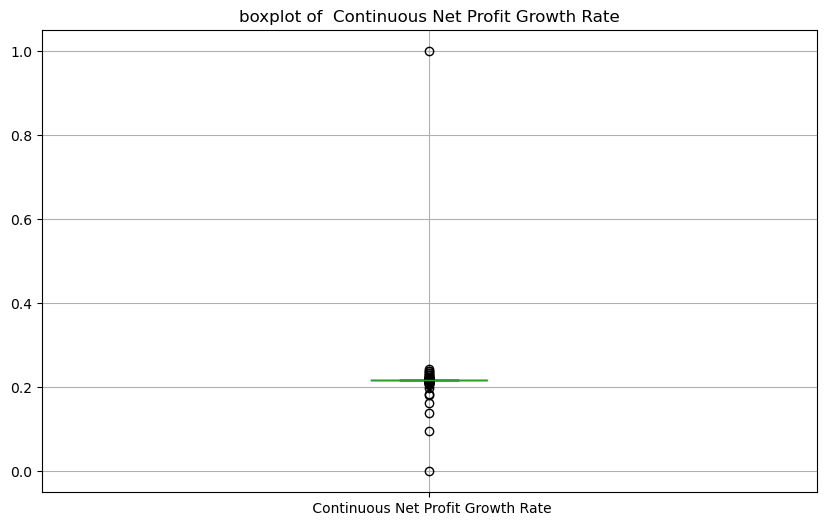

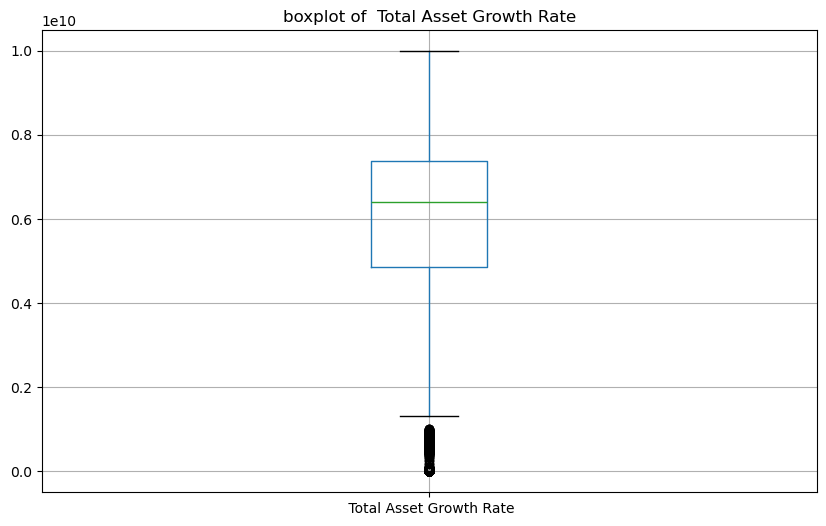

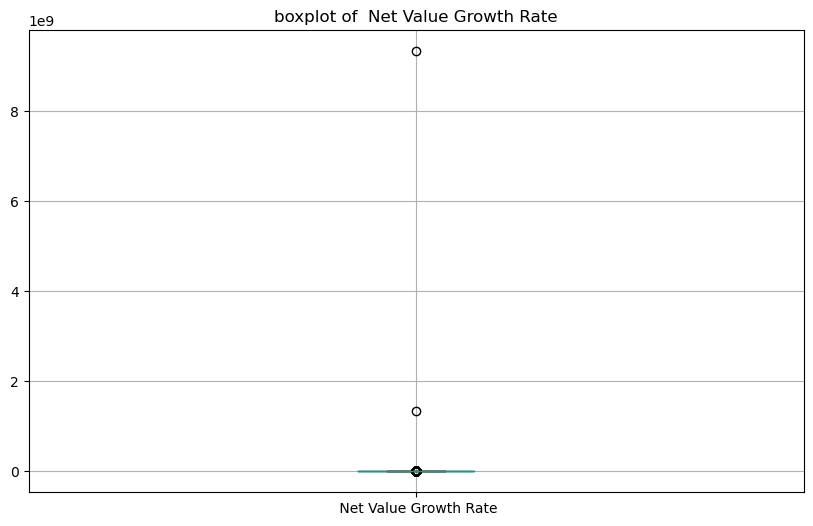

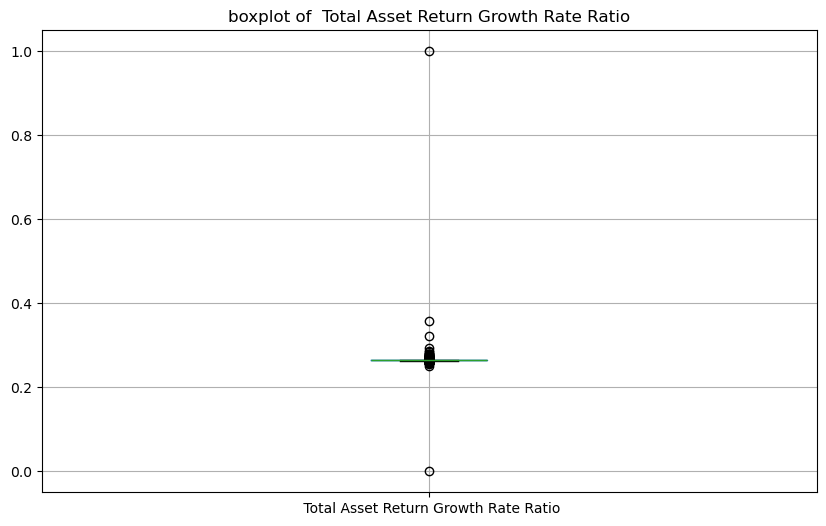

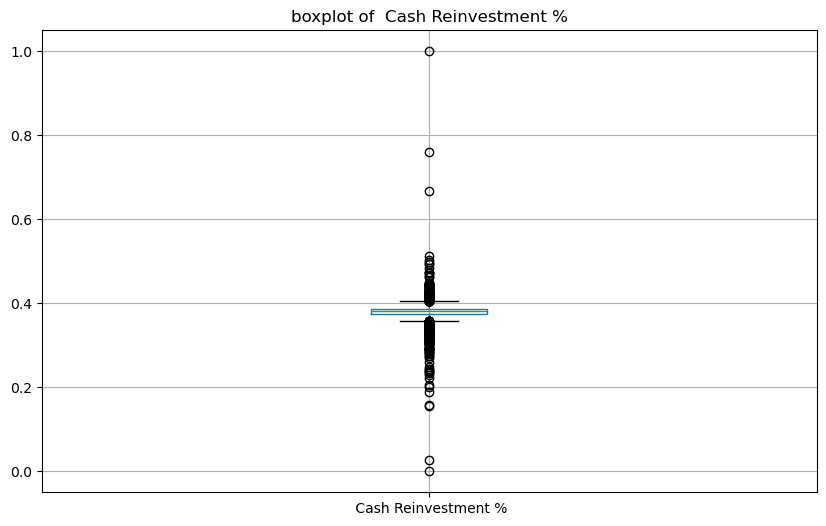

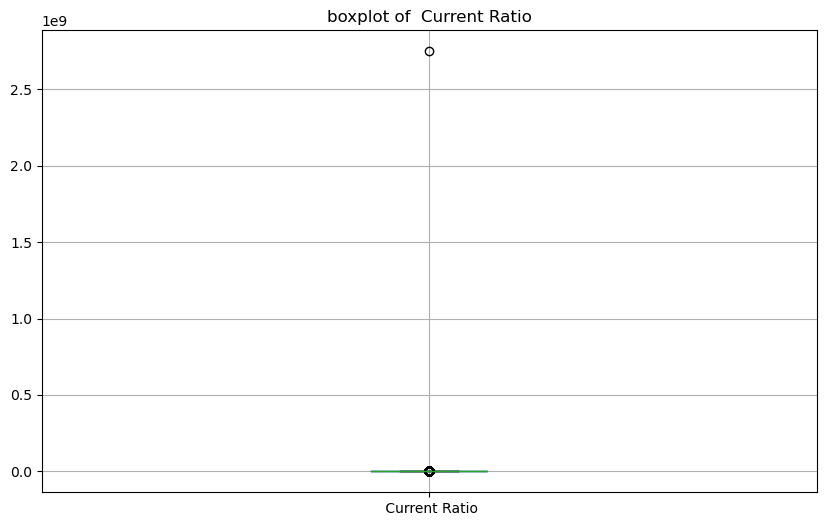

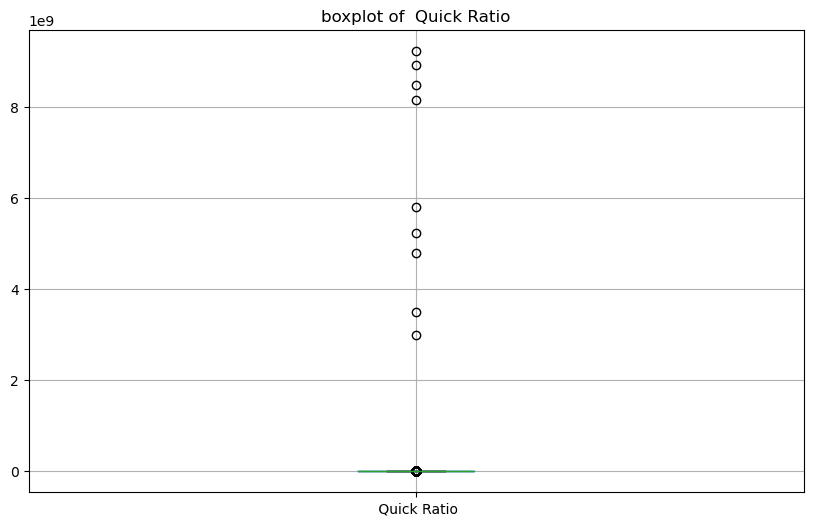

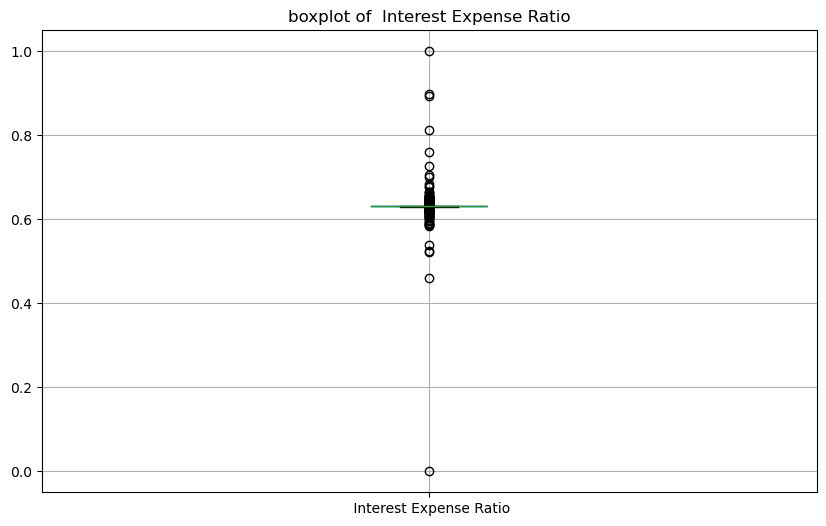

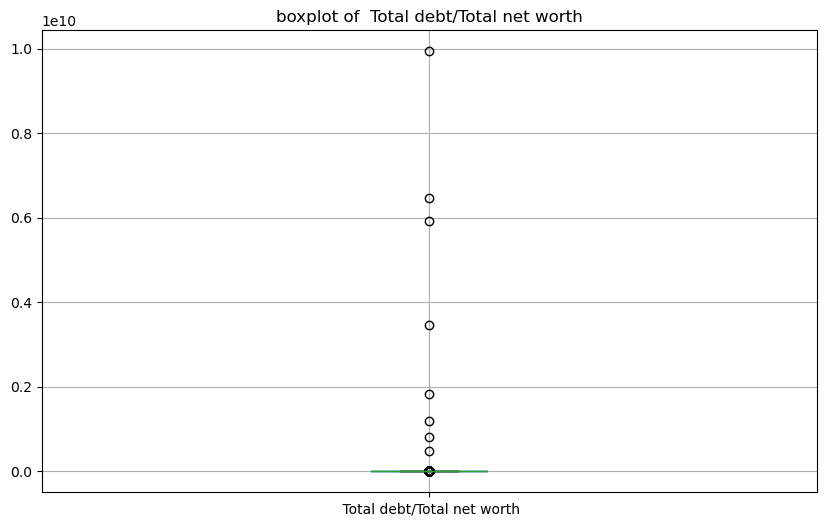

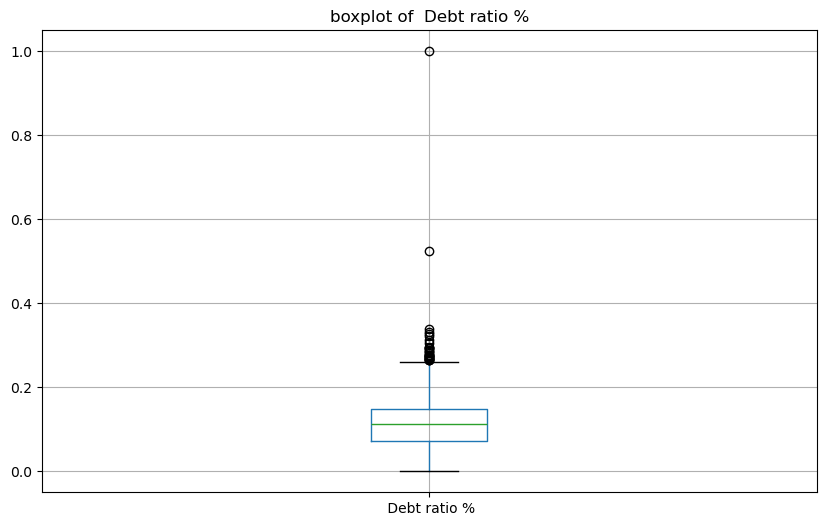

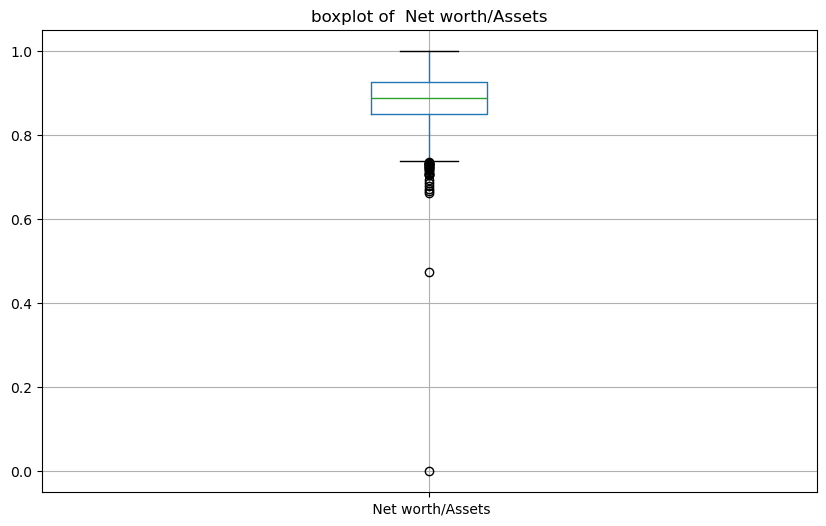

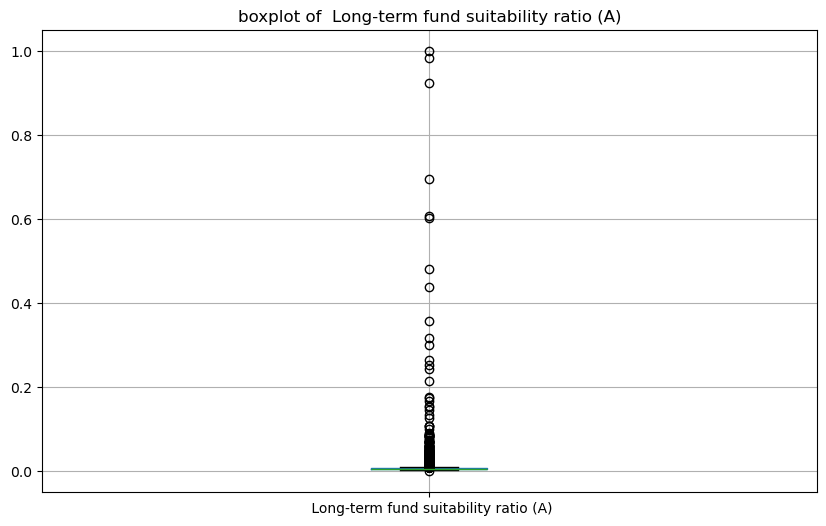

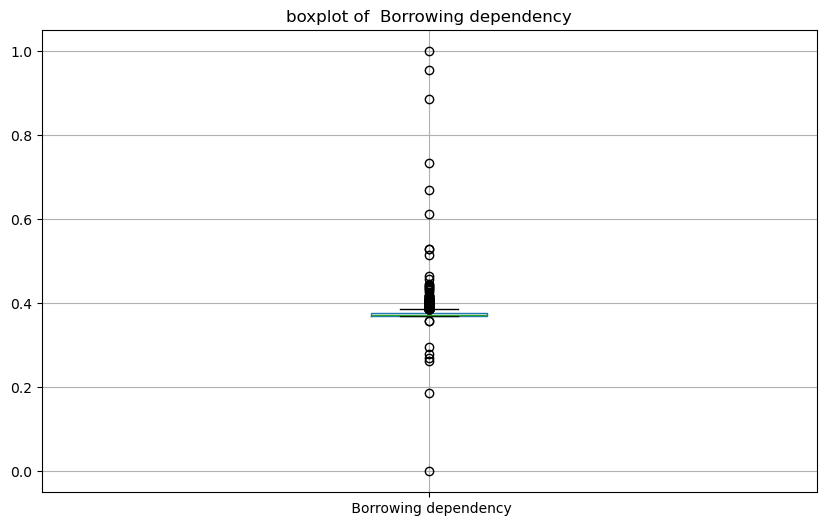

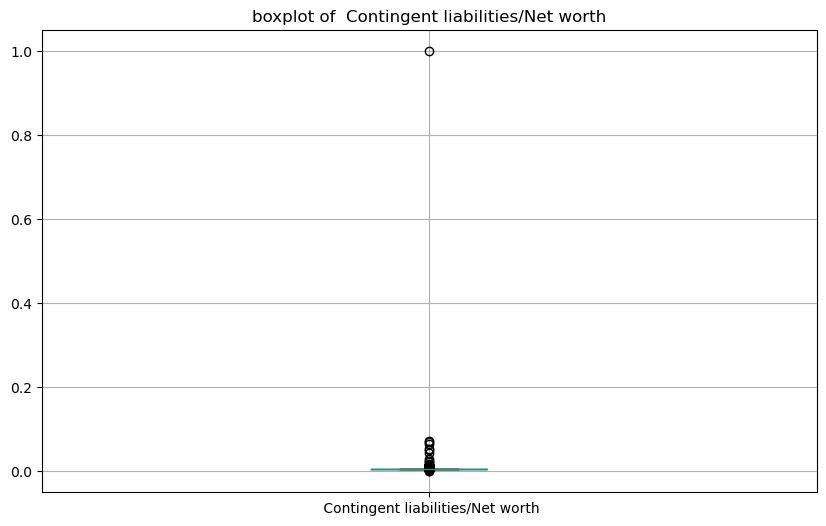

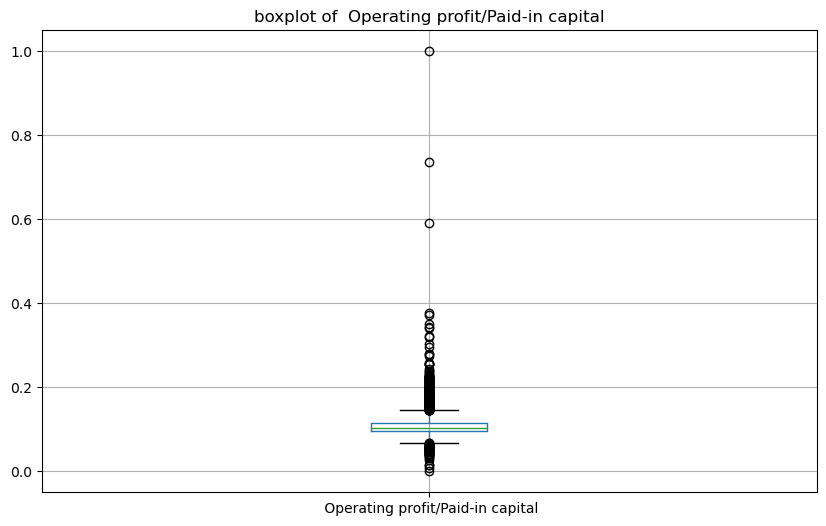

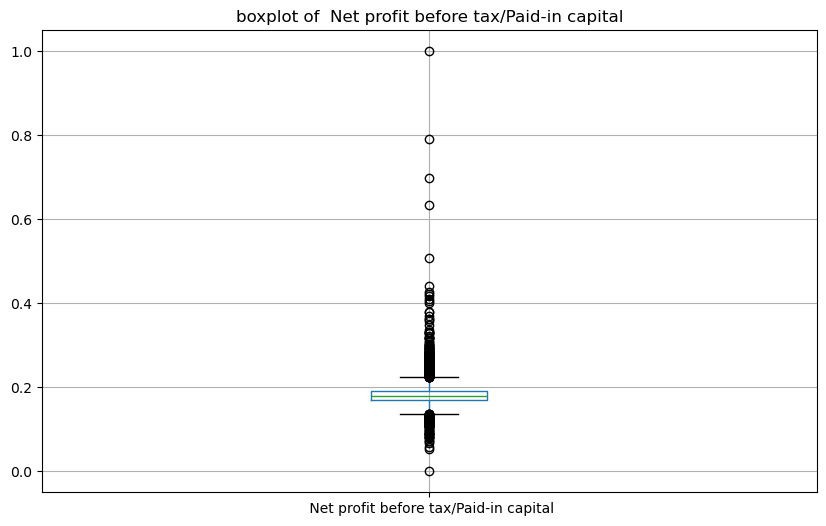

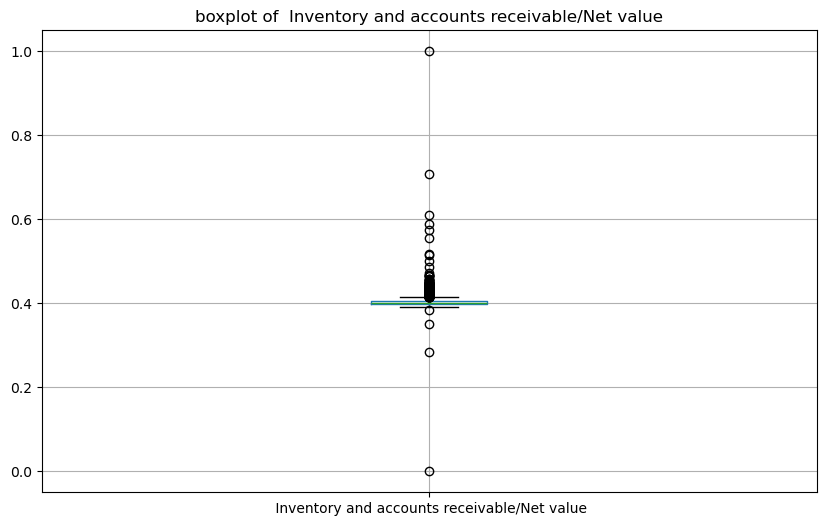

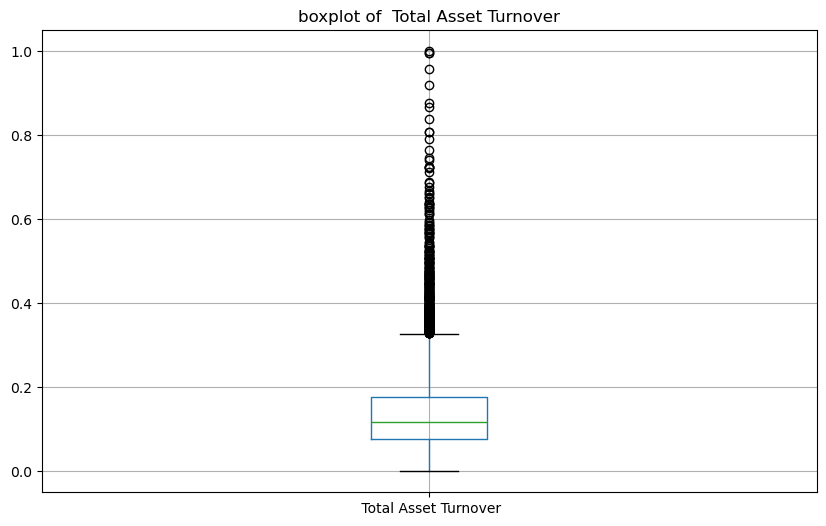

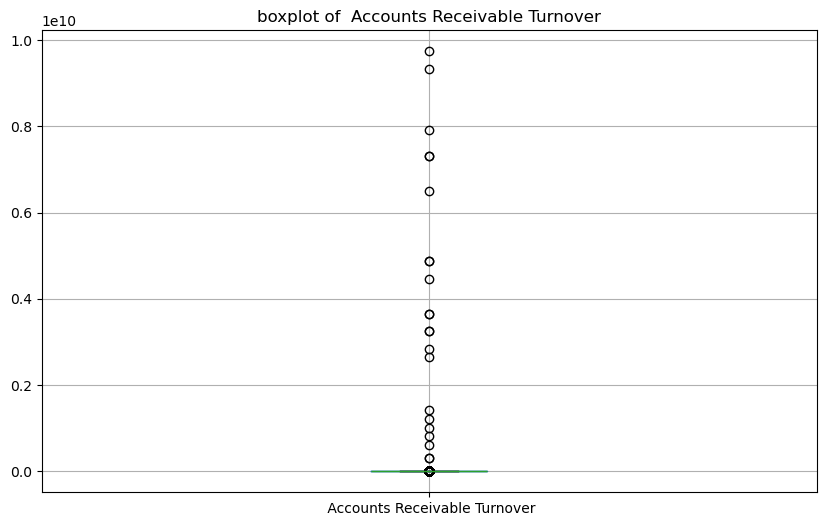

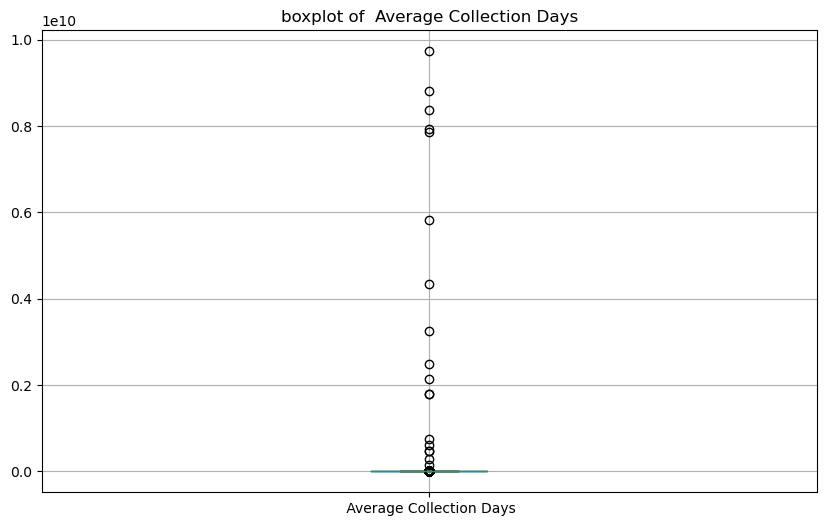

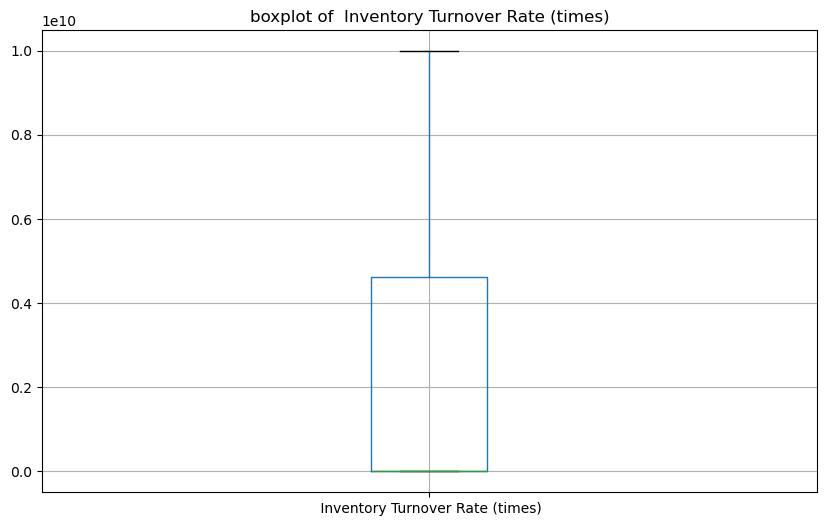

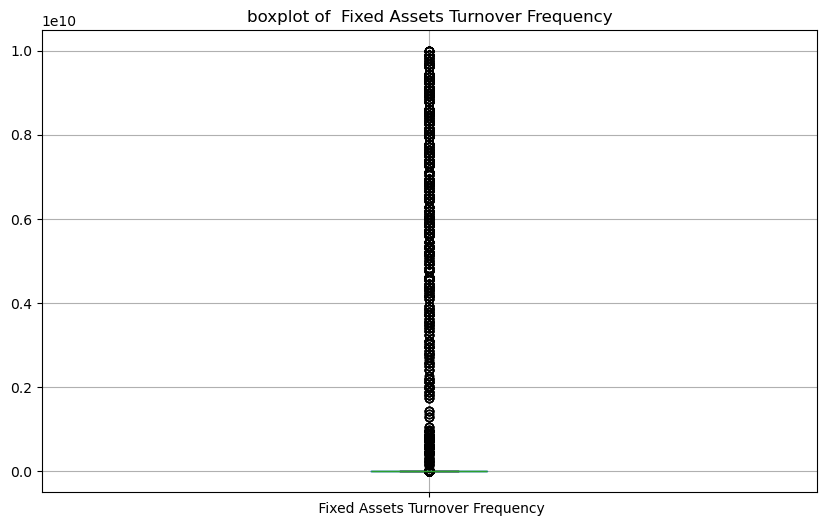

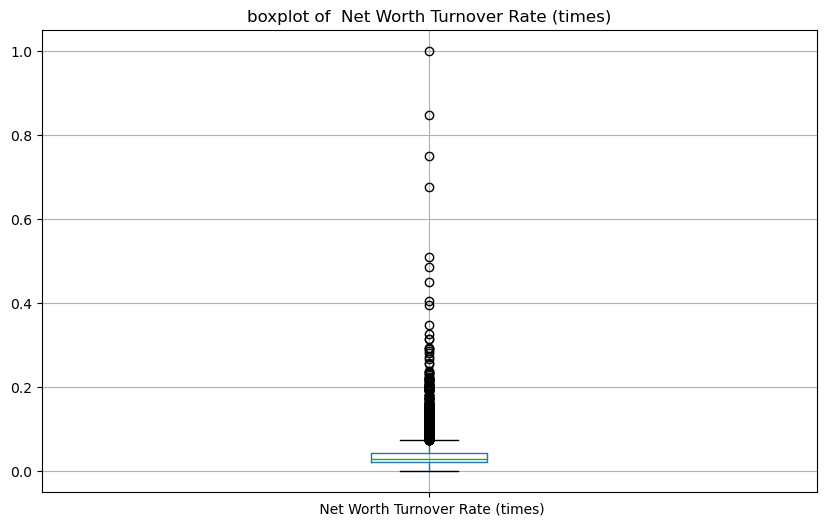

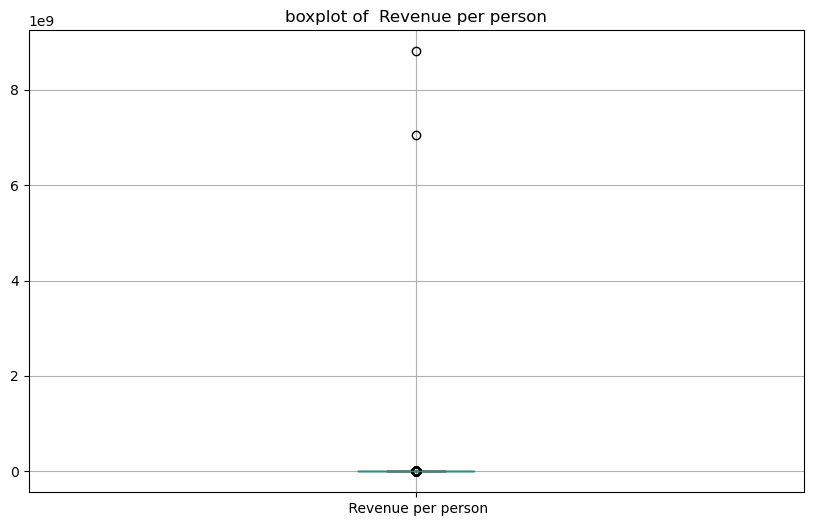

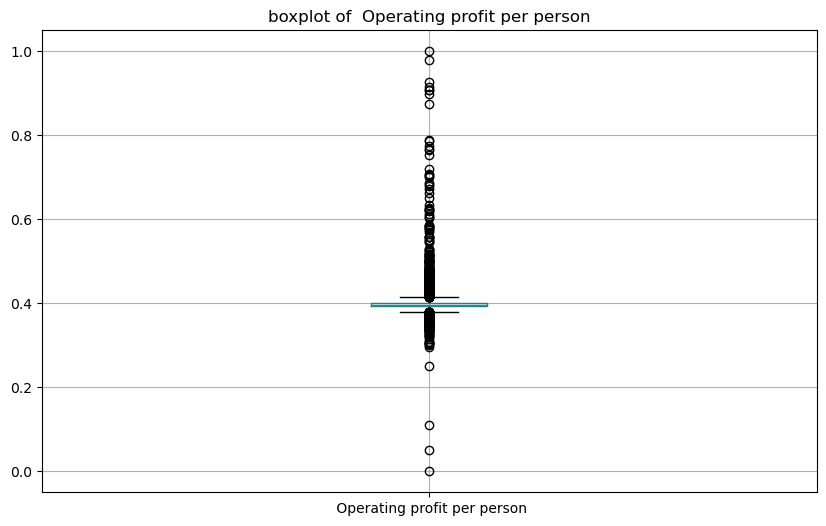

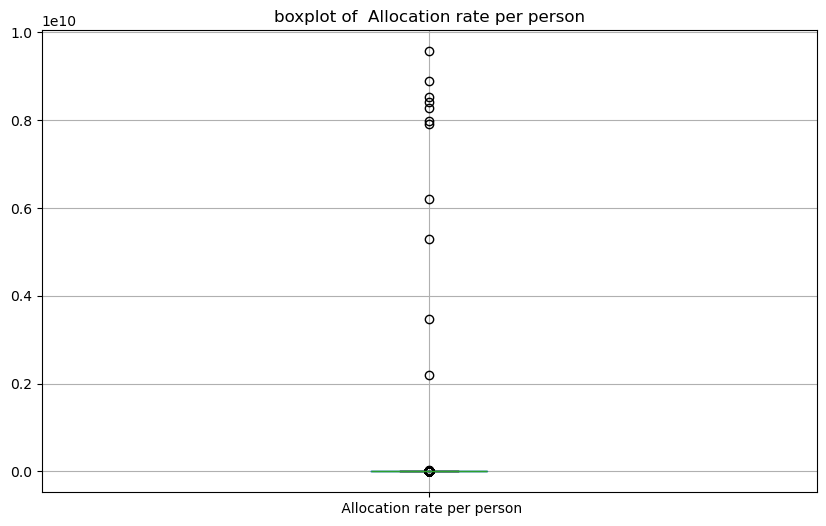

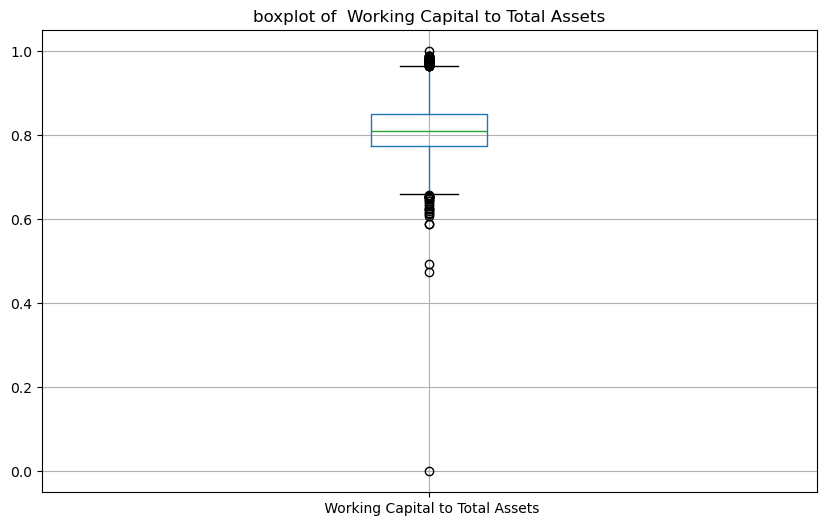

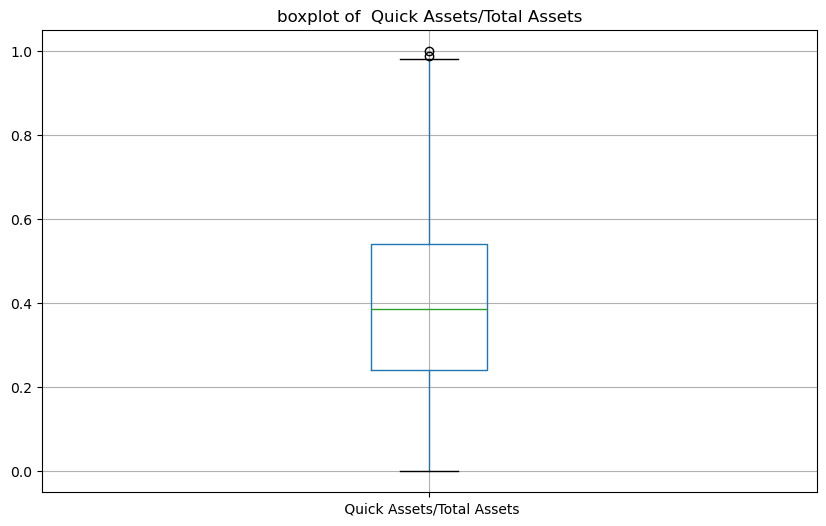

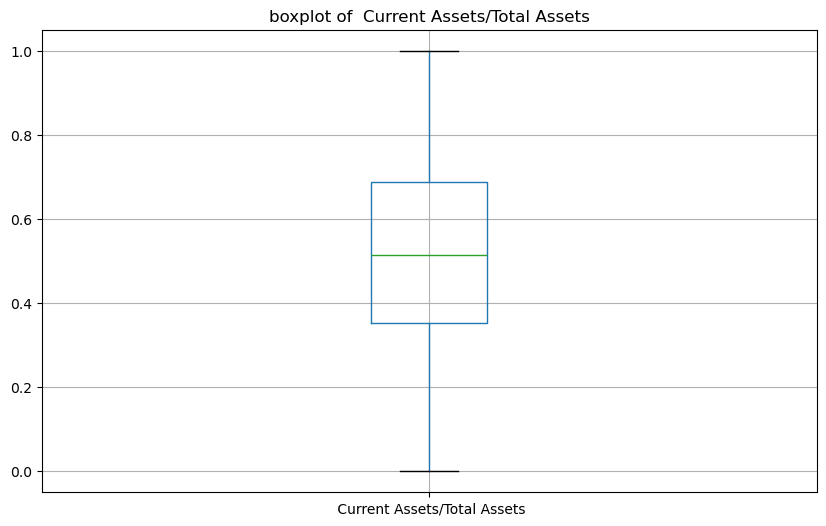

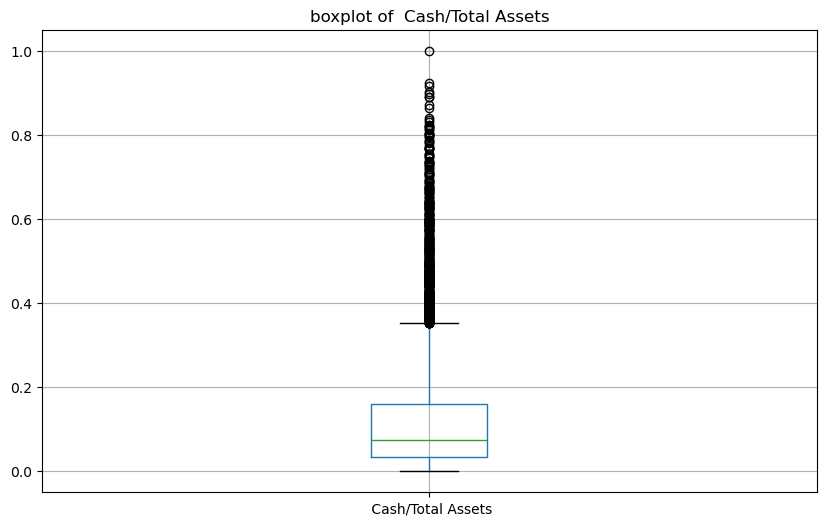

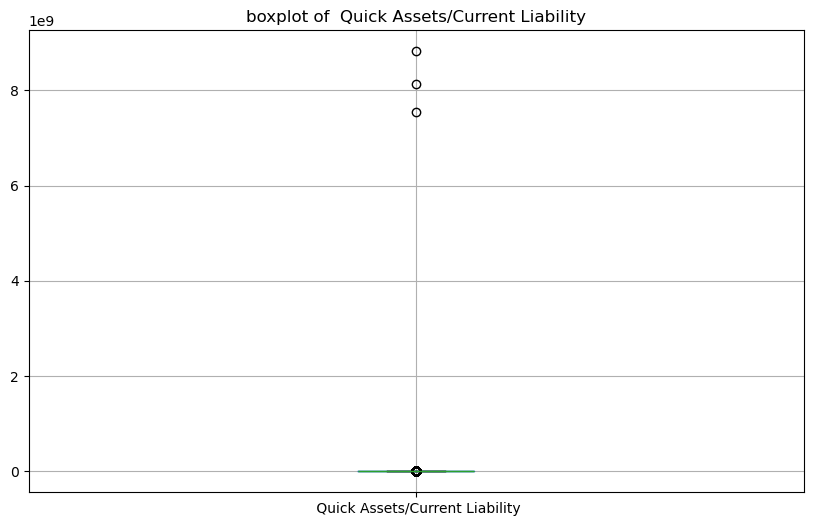

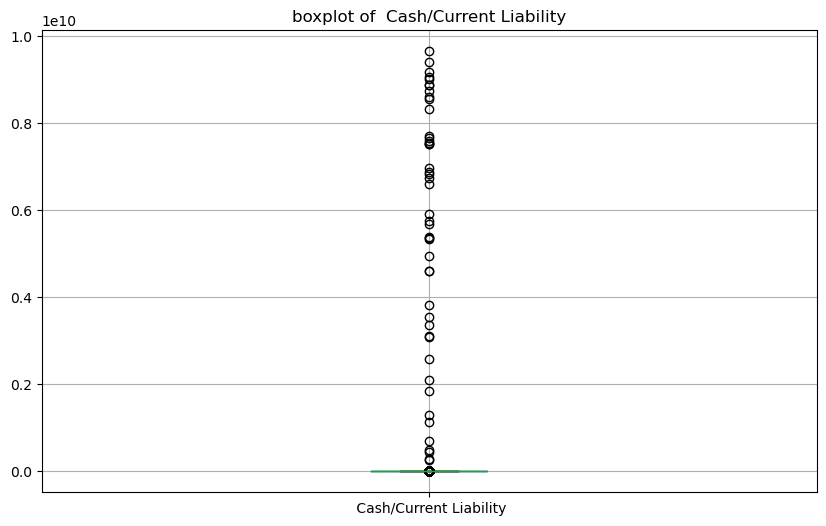

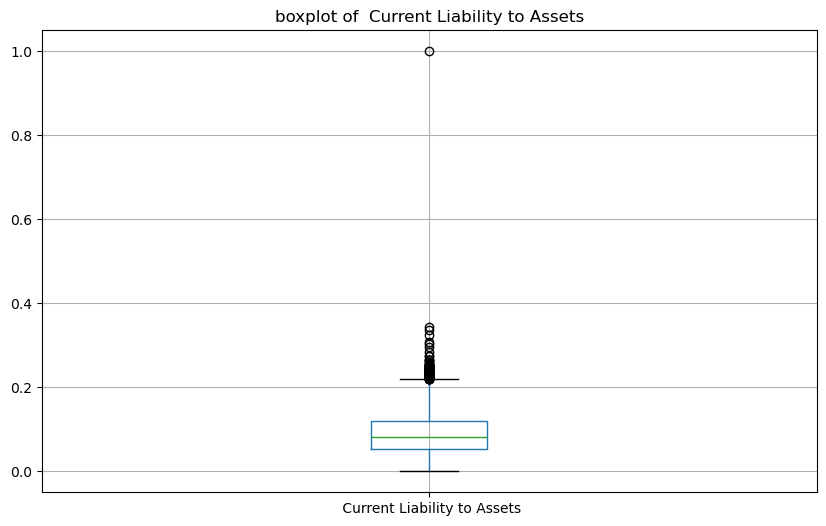

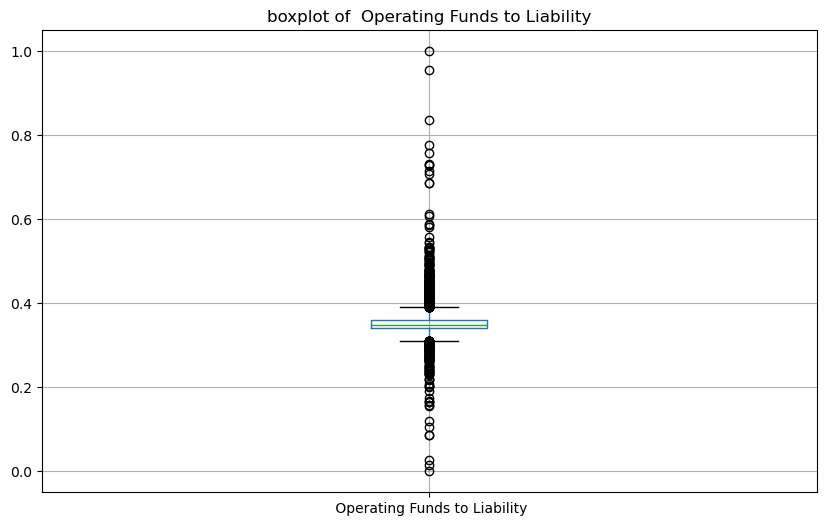

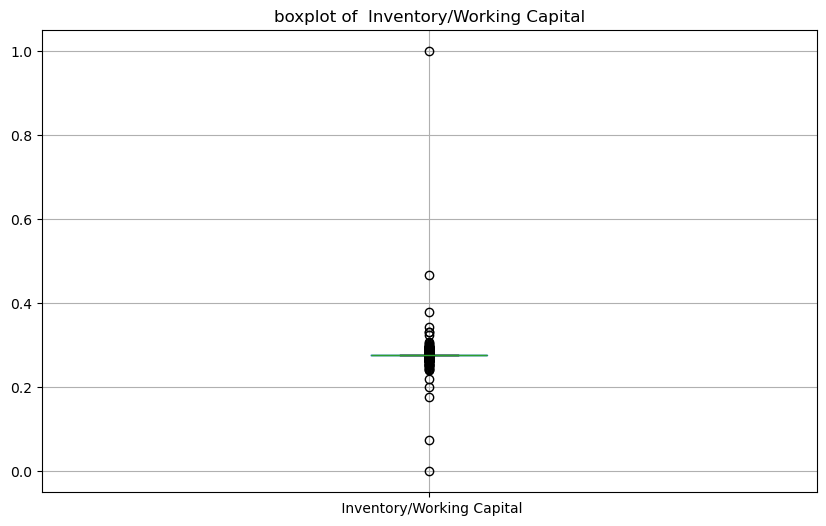

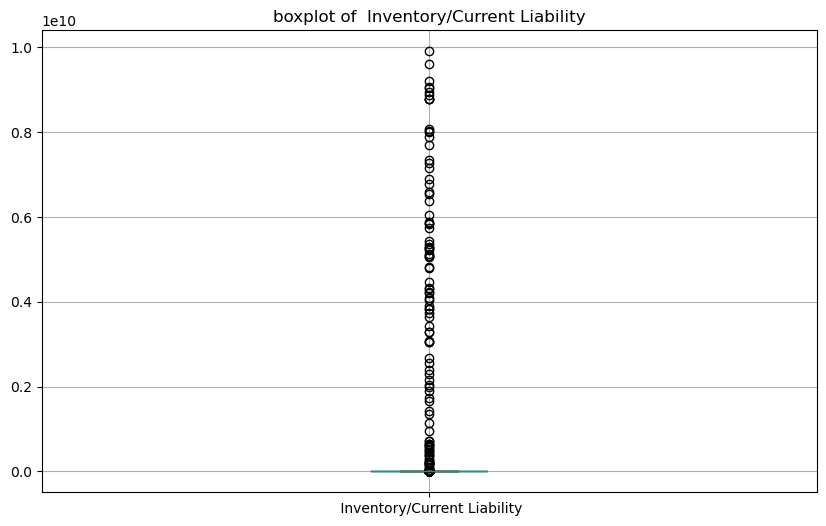

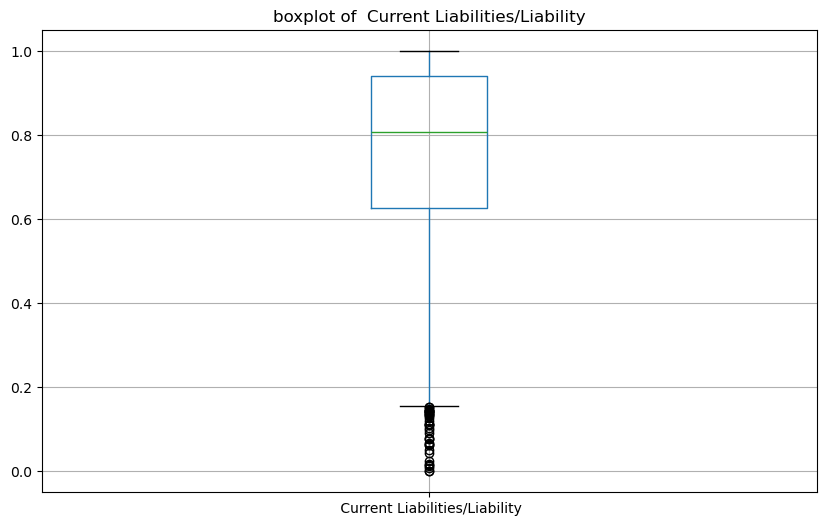

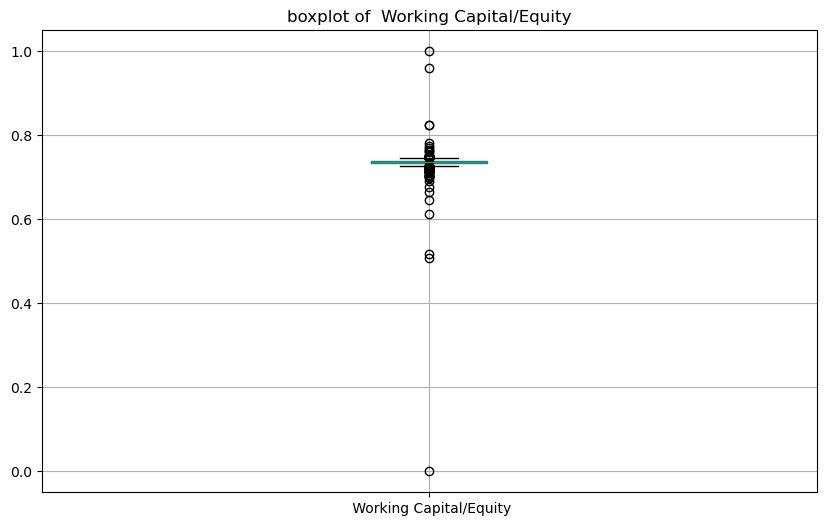

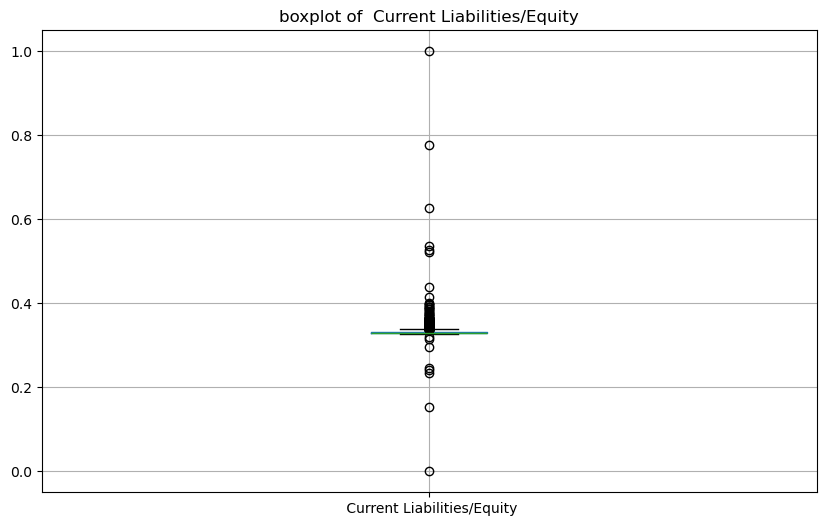

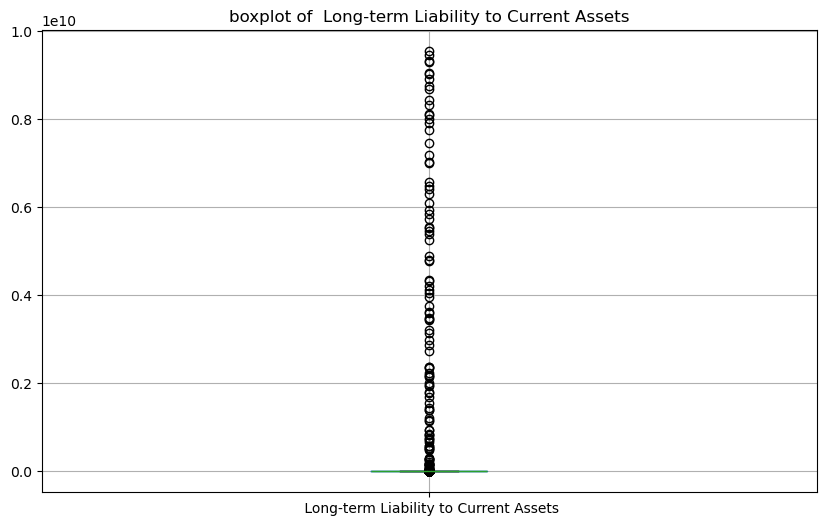

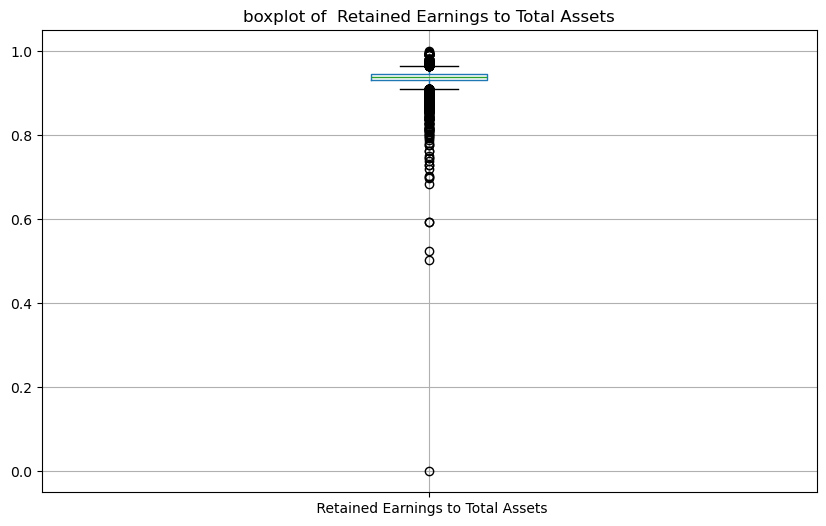

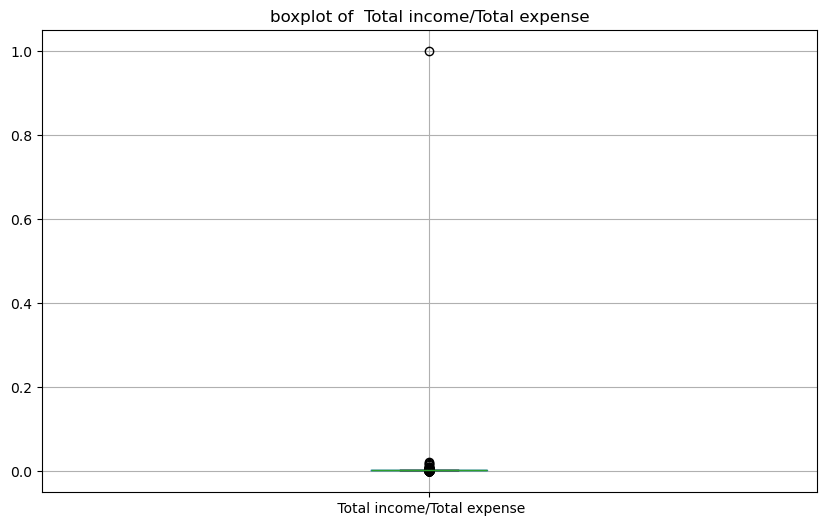

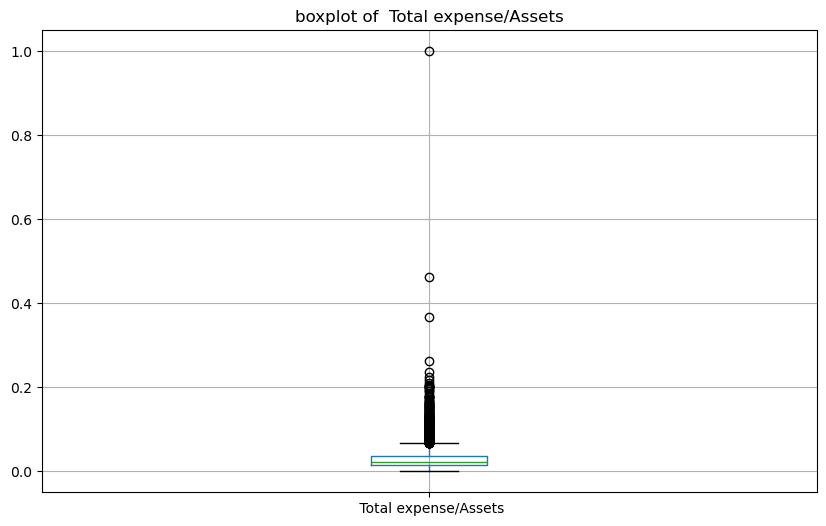

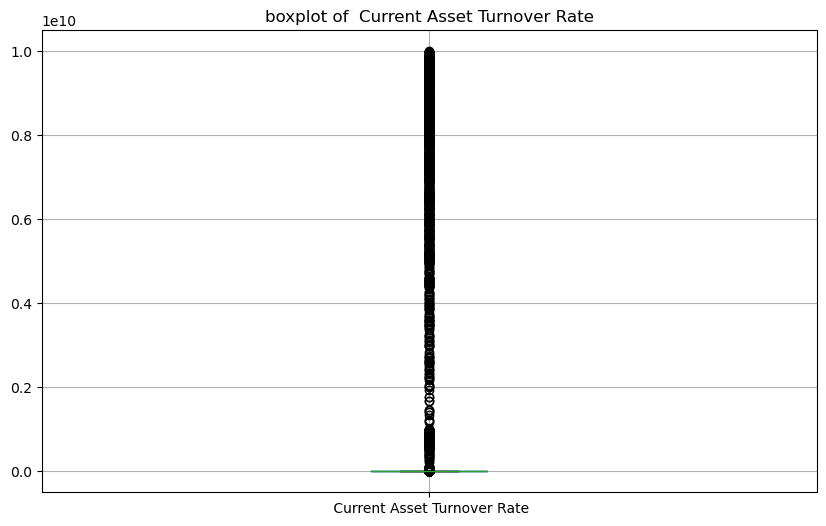

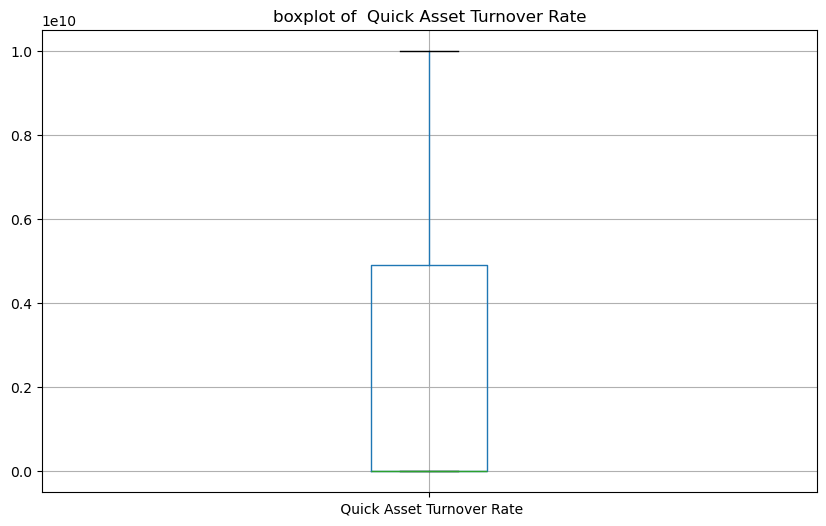

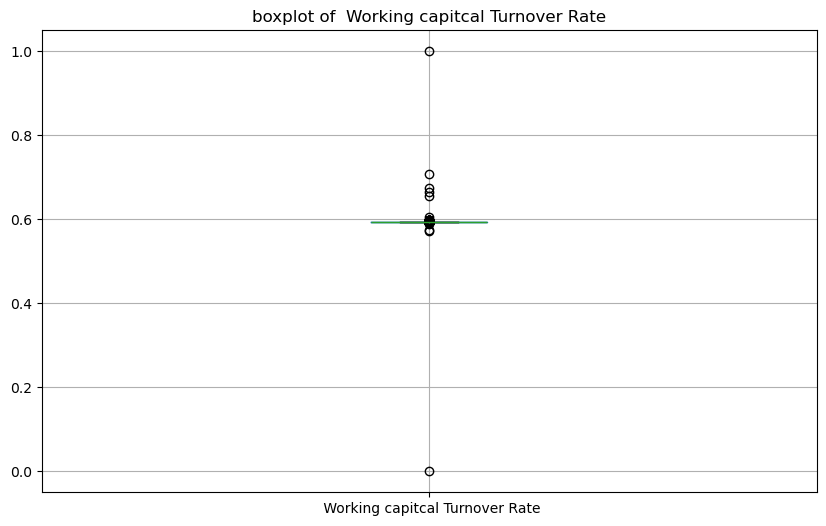

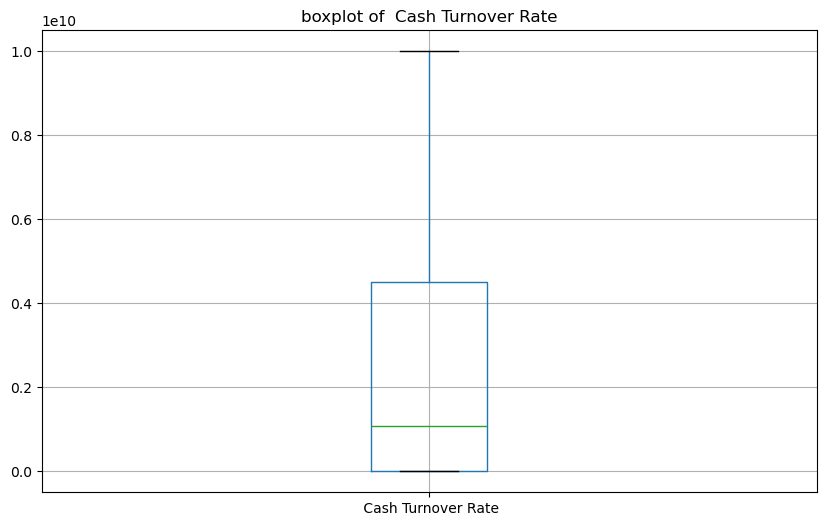

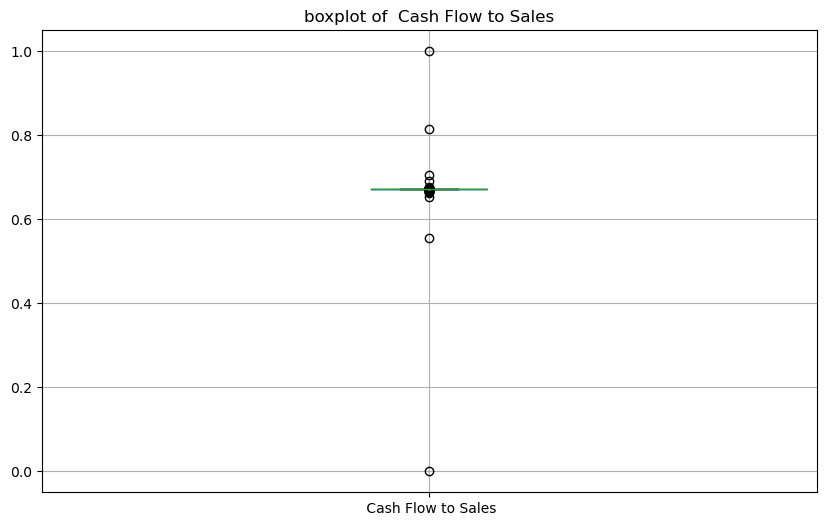

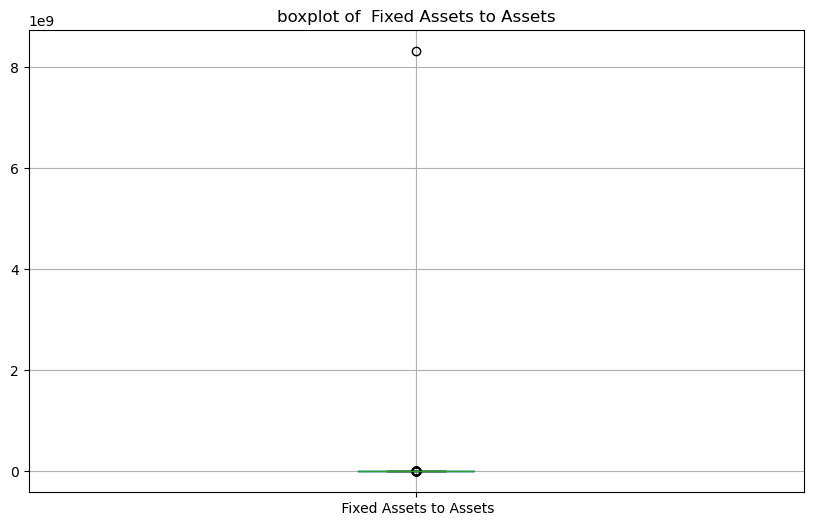

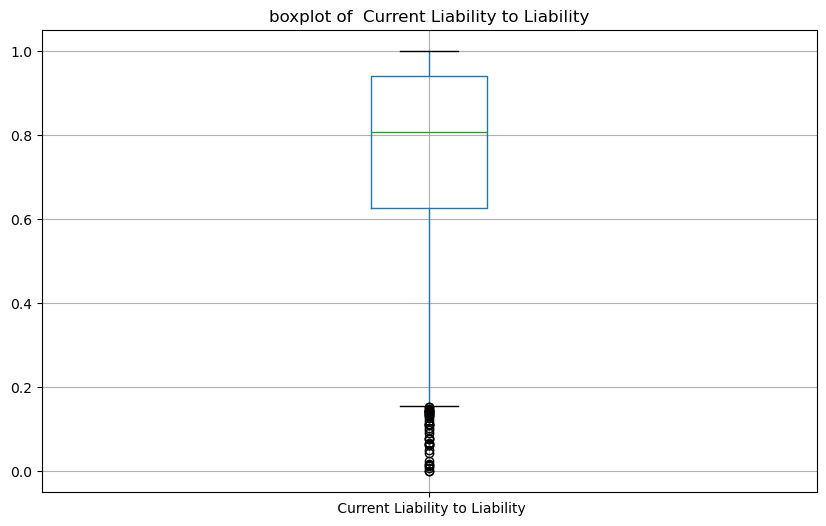

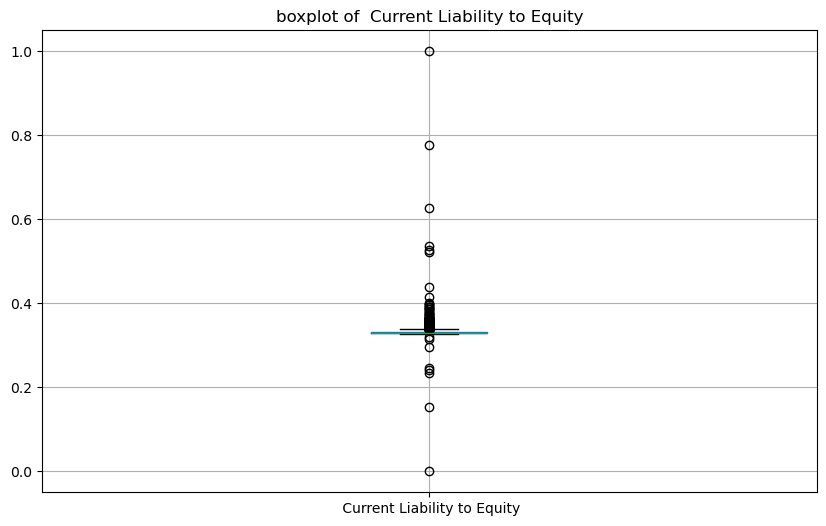

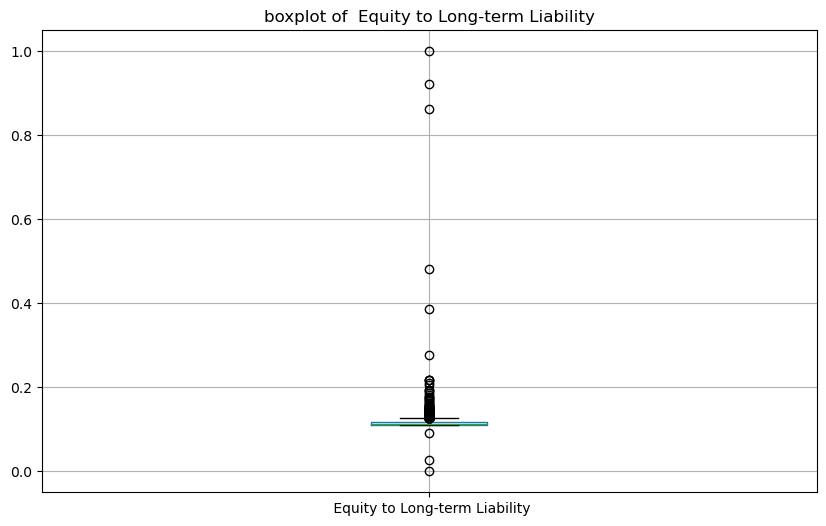

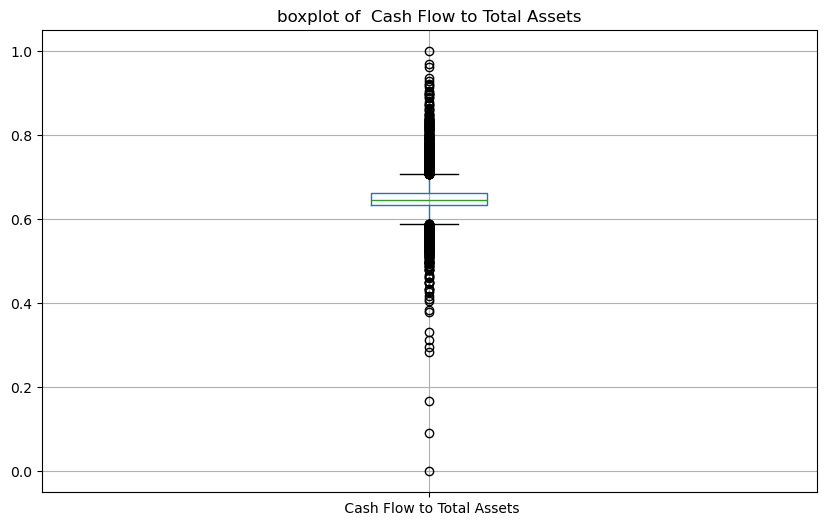

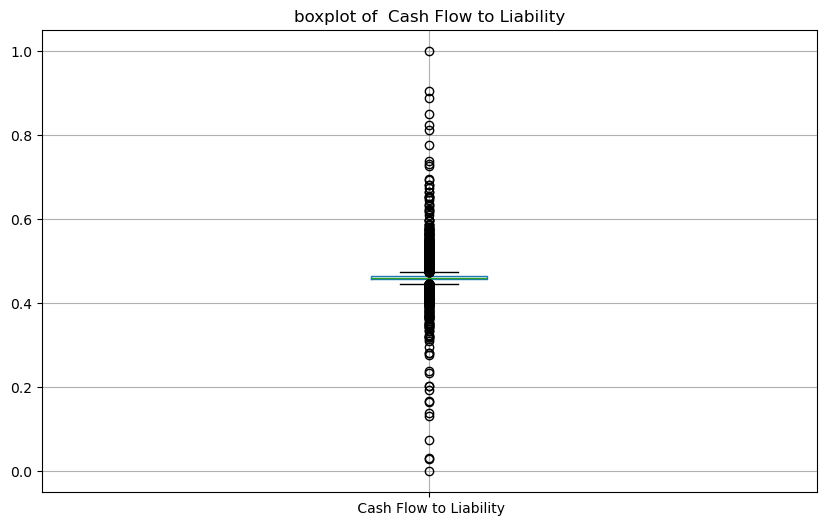

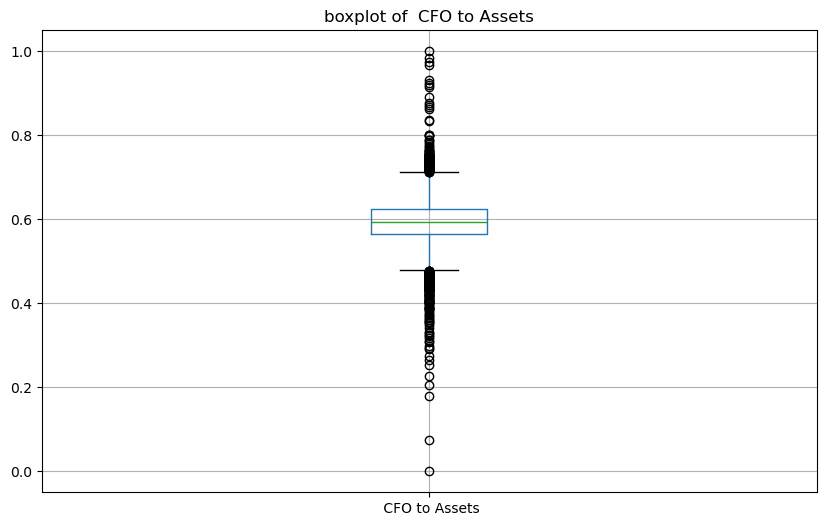

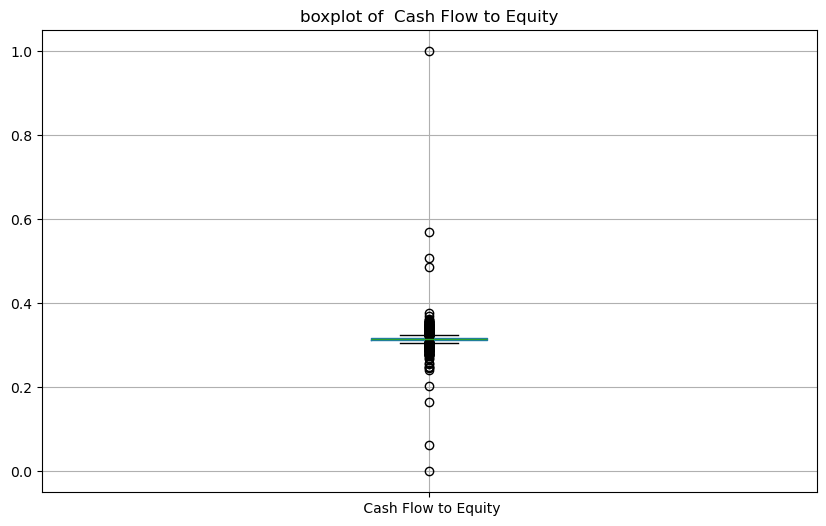

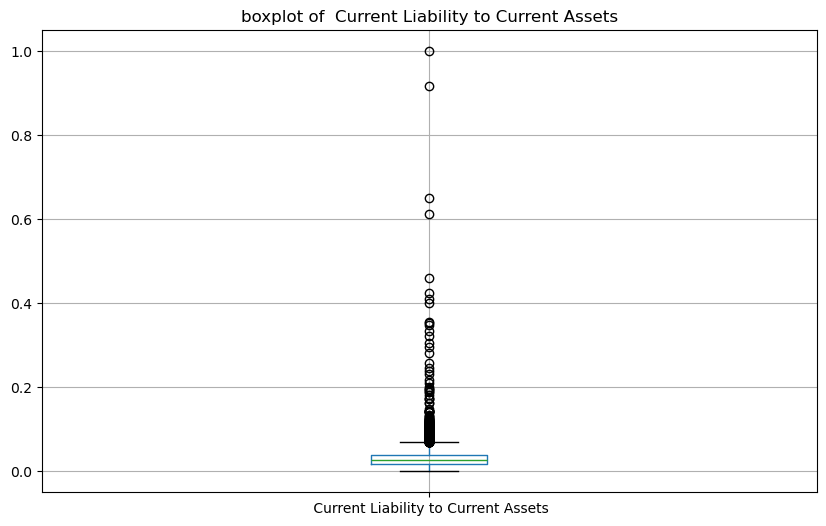

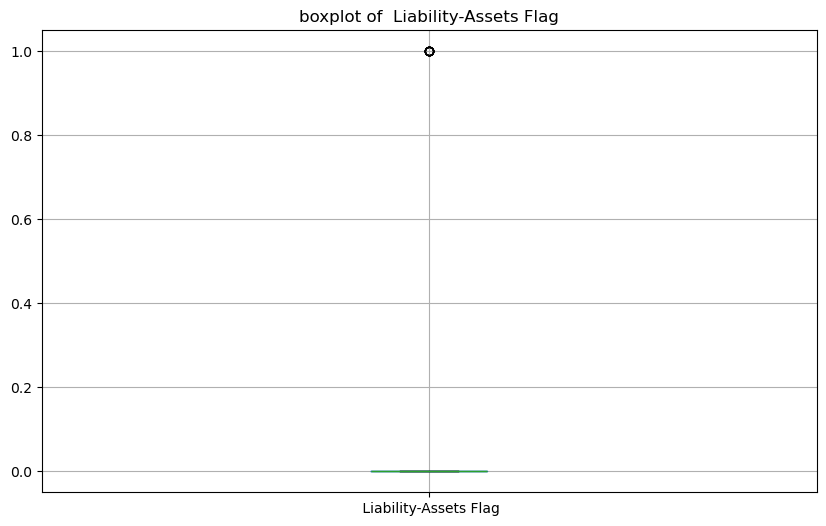

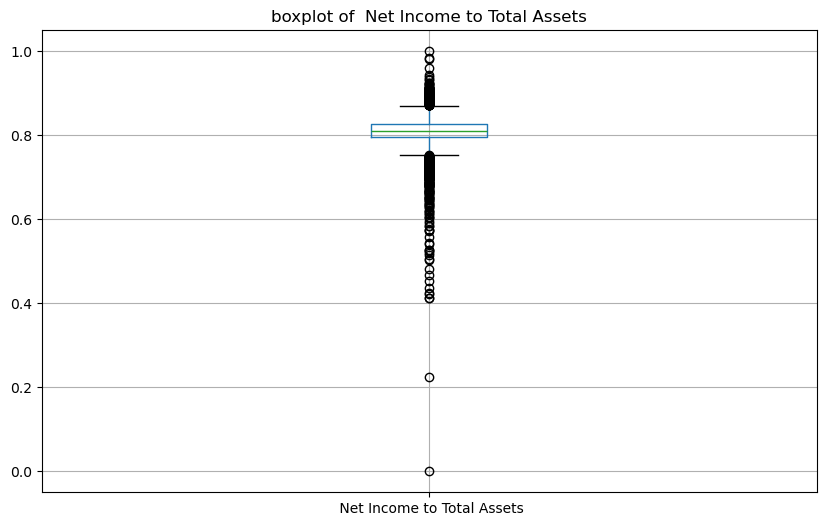

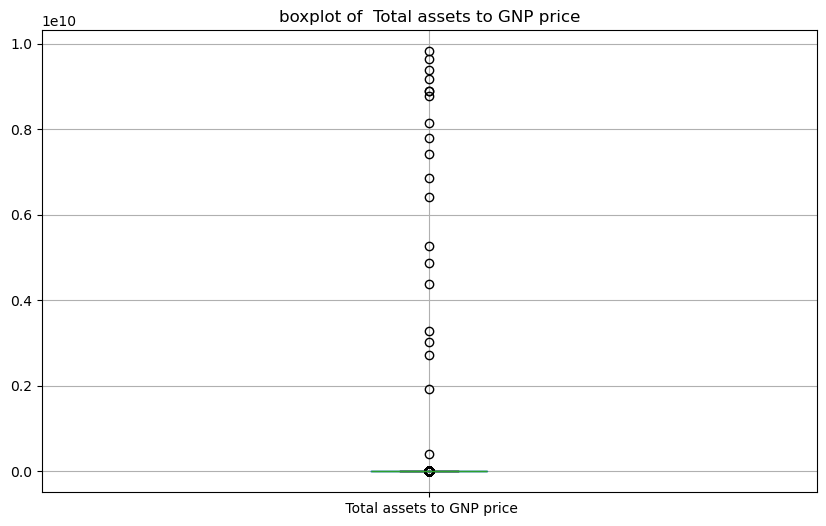

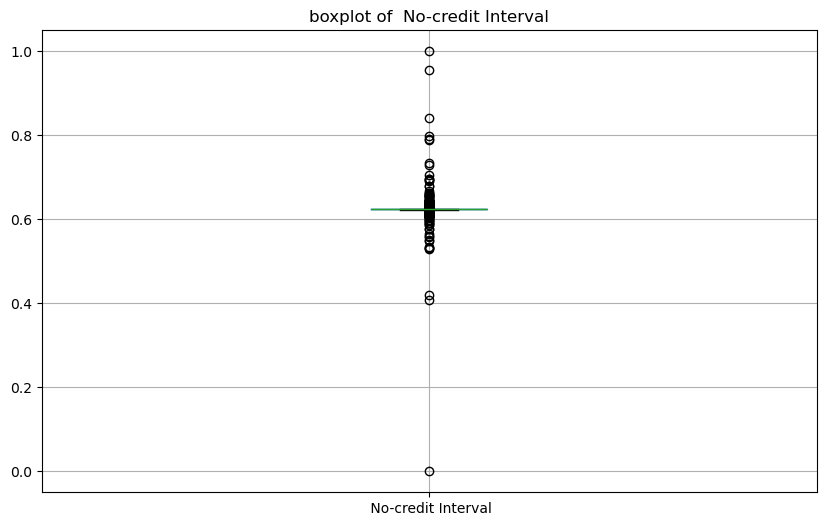

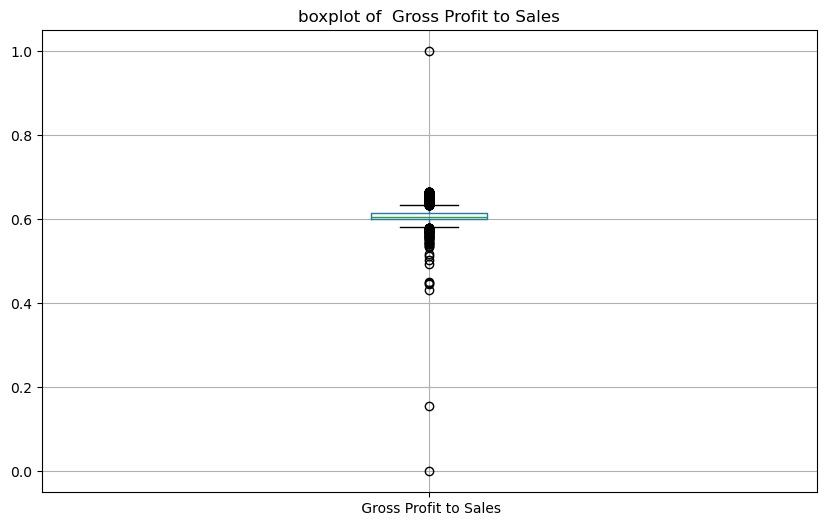

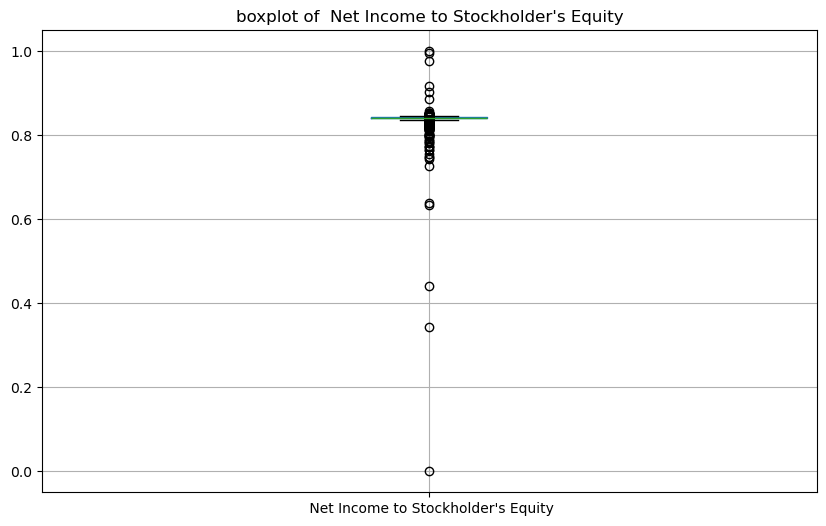

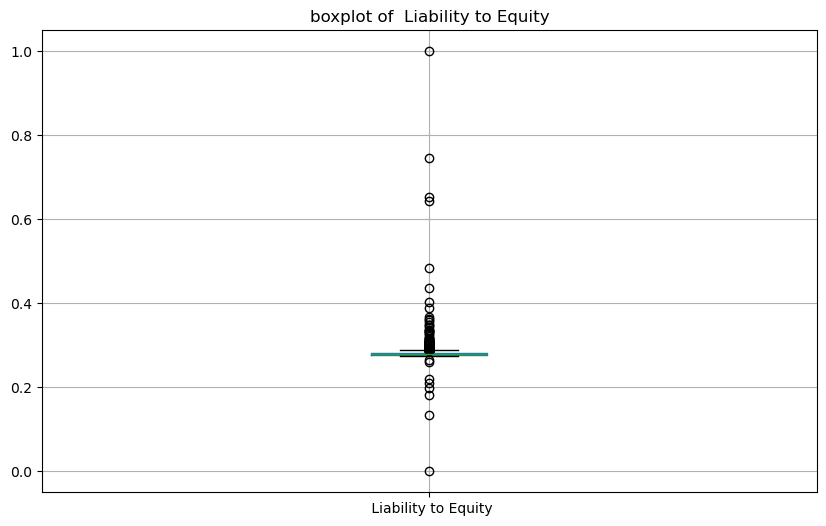

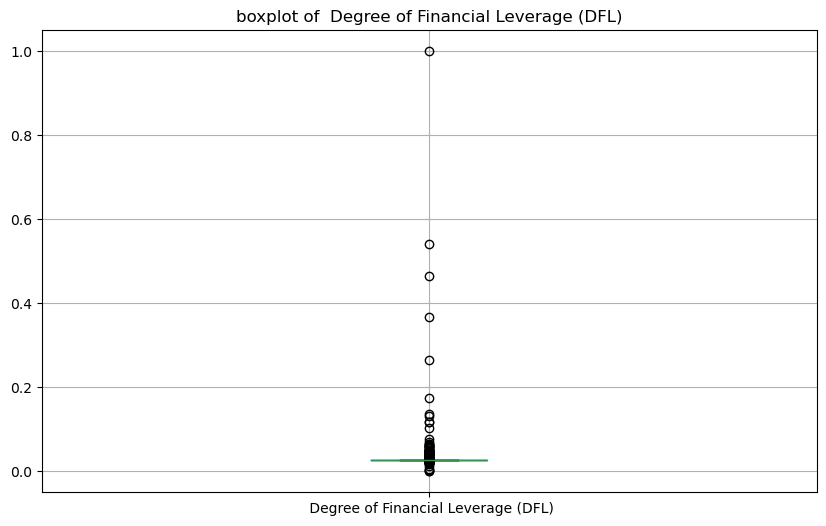

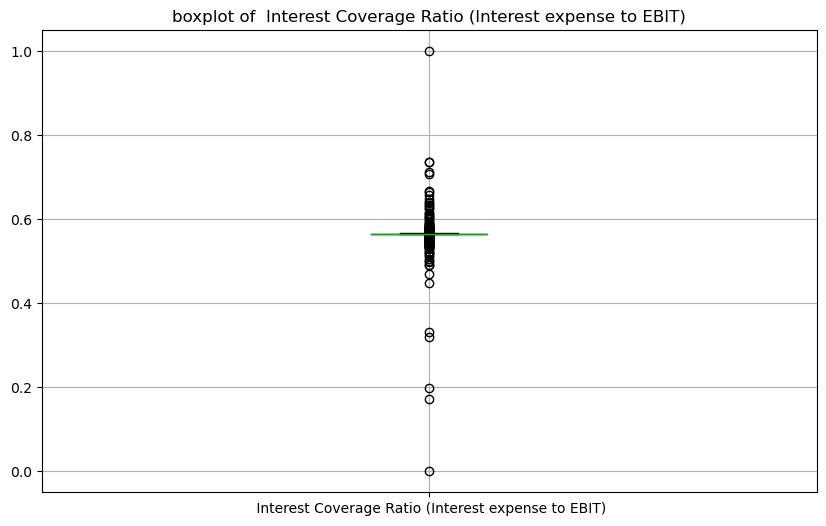

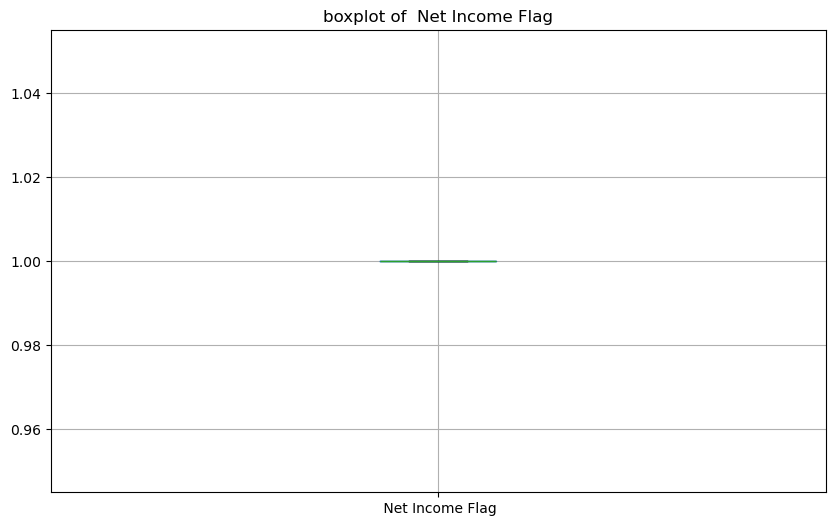

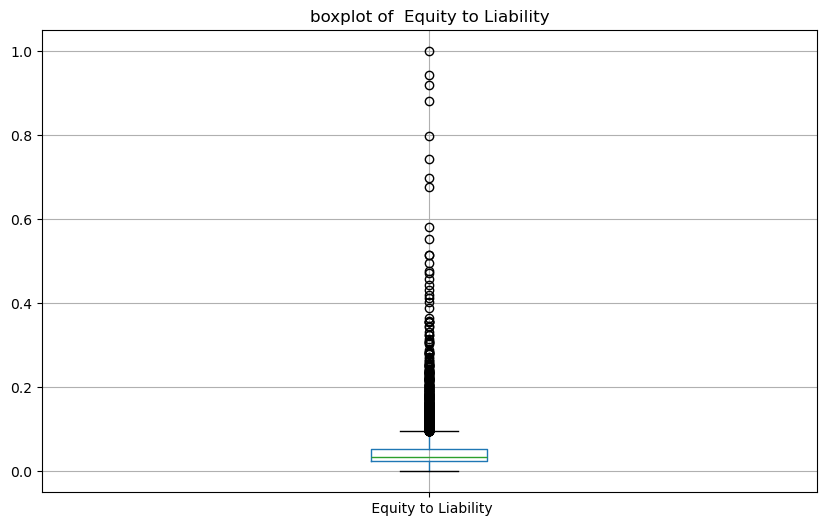

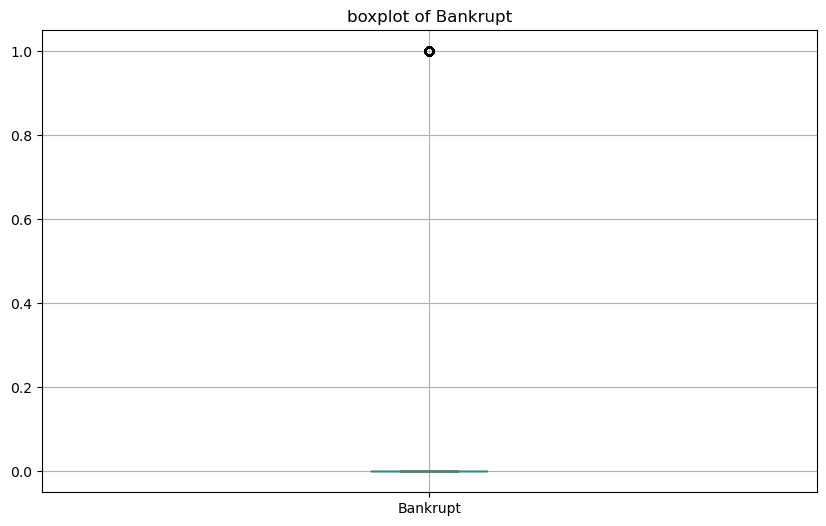

In [14]:
for column in df1.columns:
    plt.figure(figsize=(10,6))
    df.boxplot(column = column)
    plt.title(f'boxplot of {column}') 

In [15]:
df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Total assets to GNP price  \
0                               0.780985  ...                    0.009219   
1                               0.781506  ...                    0.008323   
2                               0.780284  ...                    0.040003   
3                               0.781241  ...                    0.003252   
4                               0.781550  ...                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                               

In [16]:
df1['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

## Note
    The dataset contains numbers less than one which is very low for a outlier removal. I can remove it by just reducing the value in the function. But it will affect the accuracy and quality of the dataset.

In [17]:
df1.skew()

 ROA(C) before interest and depreciation before interest    0.079921
 ROA(A) before interest and % after tax                    -0.031189
 ROA(B) before interest and depreciation after tax          0.026509
 Operating Gross Margin                                     0.539571
 Realized Sales Gross Margin                                0.540654
                                                              ...   
 Degree of Financial Leverage (DFL)                         0.402110
 Interest Coverage Ratio (Interest expense to EBIT)         0.377486
 Net Income Flag                                            0.000000
 Equity to Liability                                        1.075622
Bankrupt                                                    5.295388
Length: 96, dtype: float64

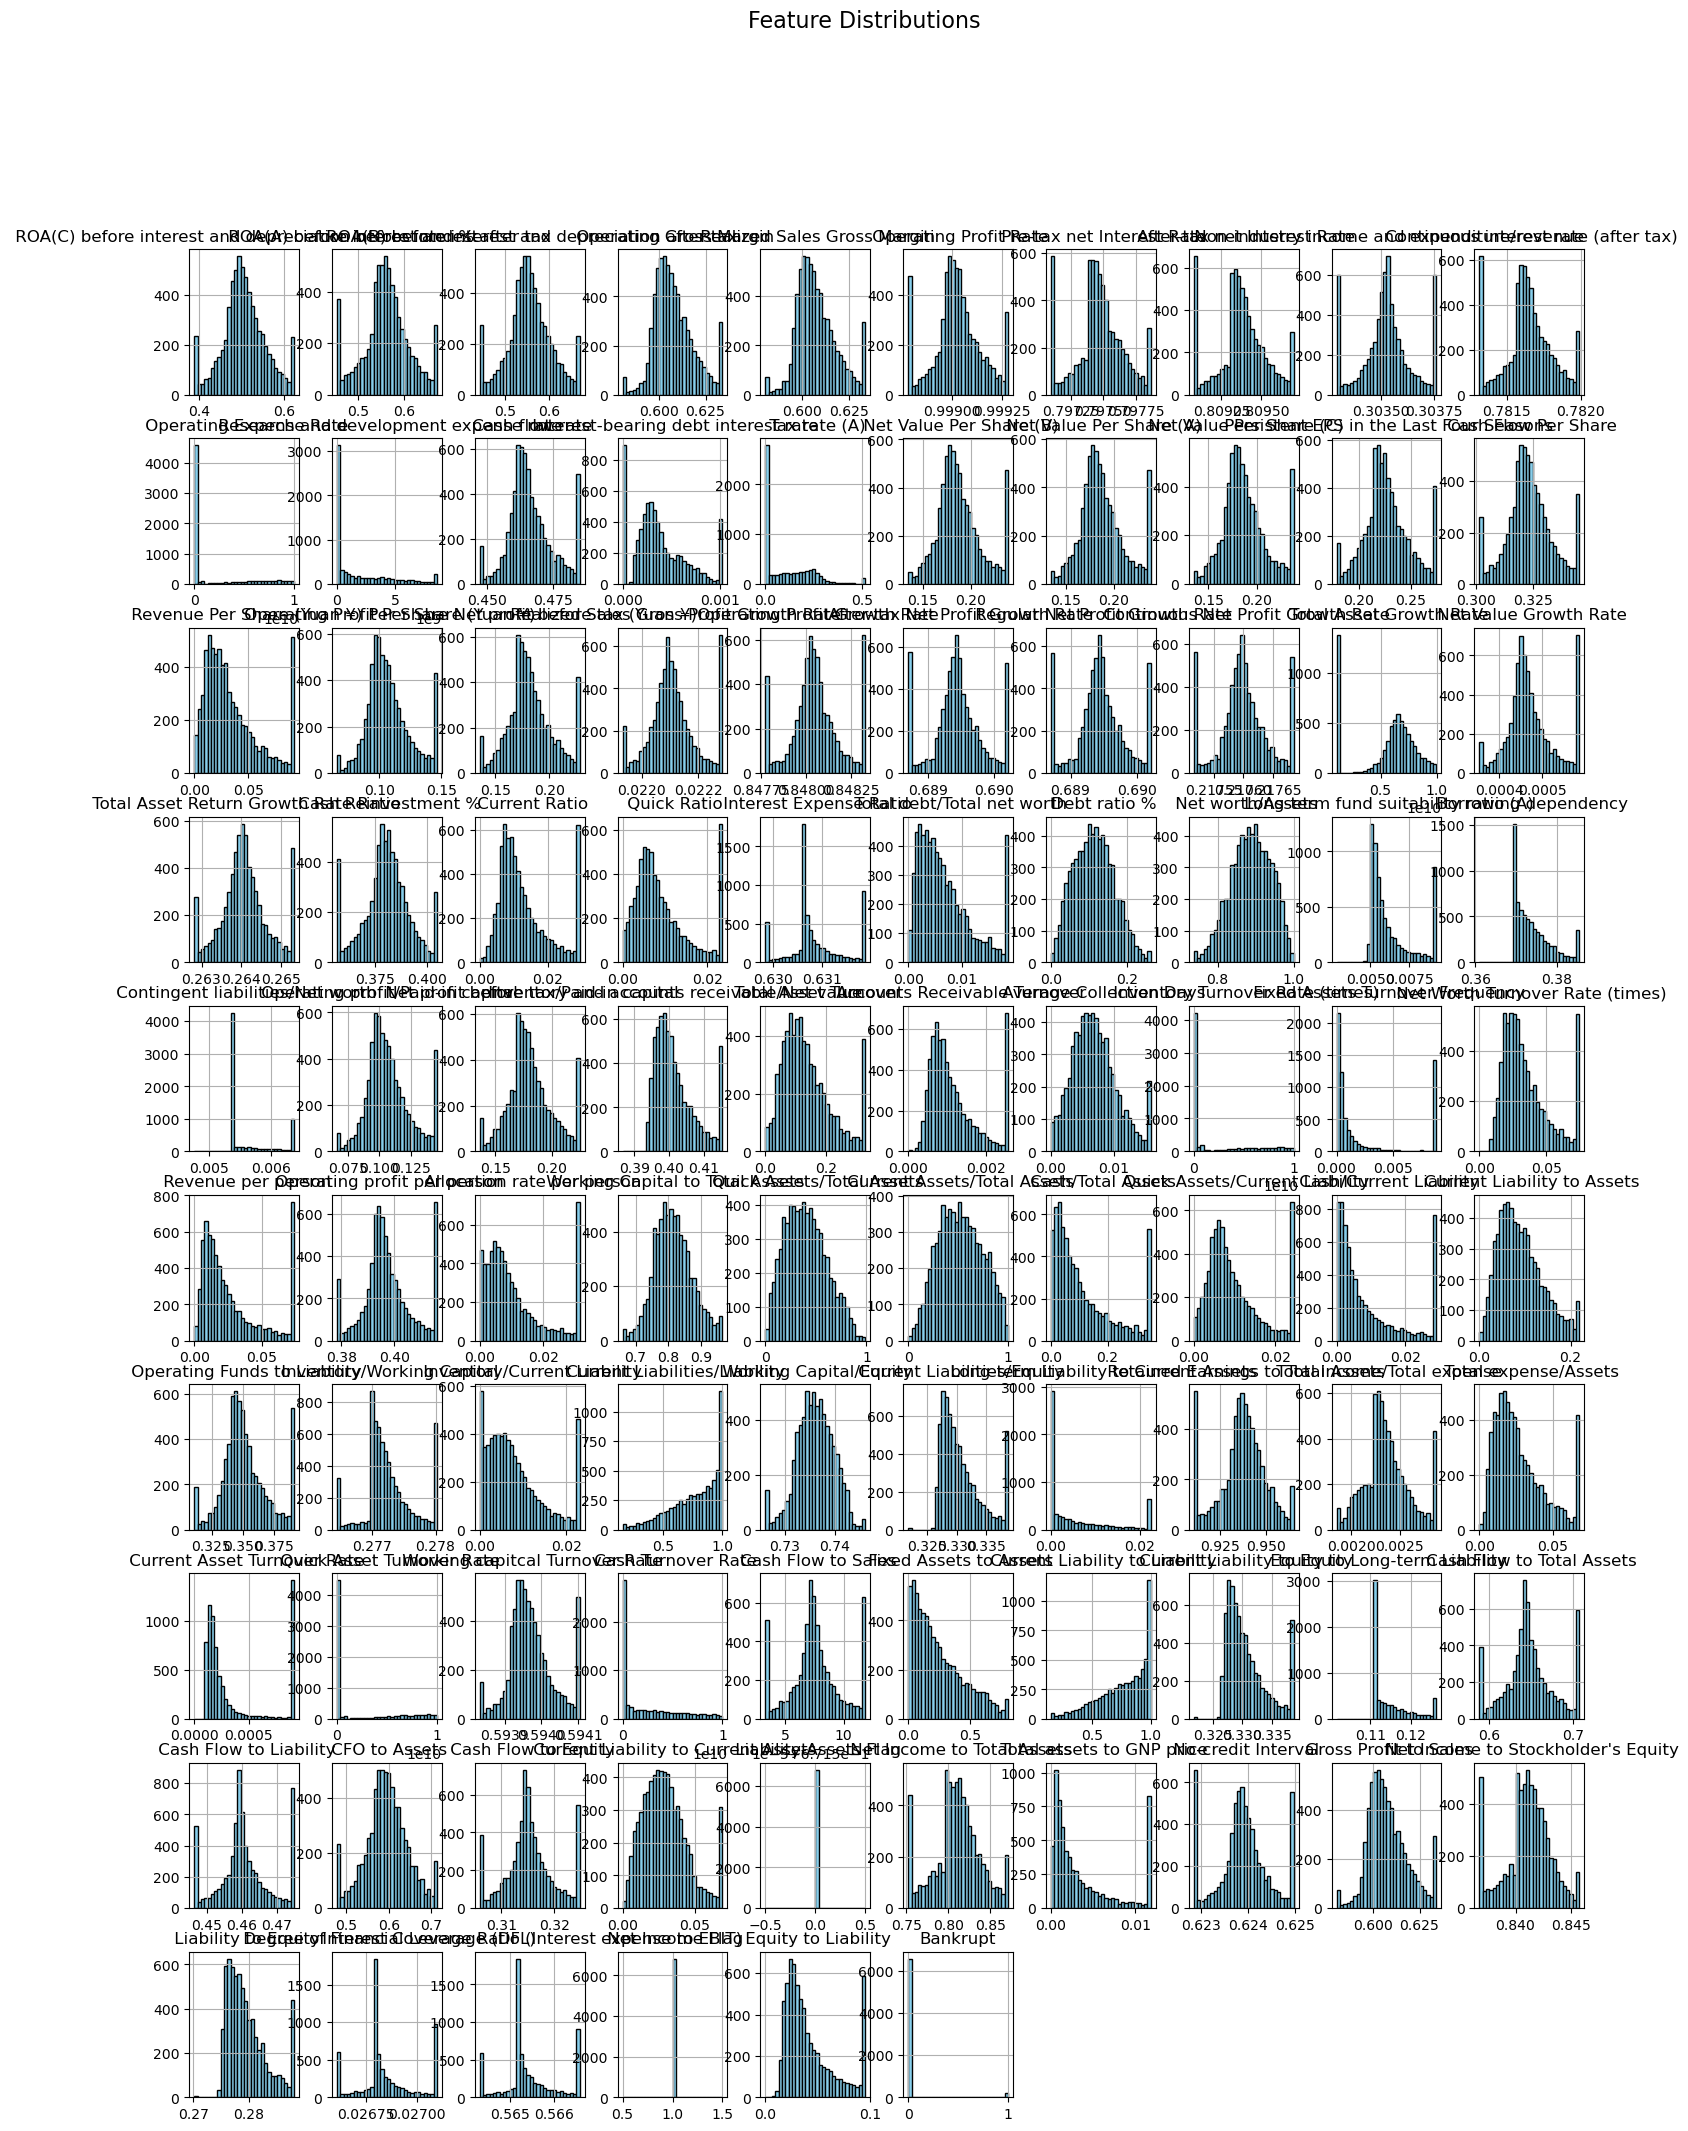

In [18]:
df1.hist(bins=30, figsize=(18, 24), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [19]:
# Check skewness
skewness = df1.skew().sort_values(ascending=False)
high_skew = skewness[abs(skewness) > 0.5]
print(high_skew)


Bankrupt                                        5.295388
 Operating Expense Rate                         1.248673
 Long-term Liability to Current Assets          1.240270
 Contingent liabilities/Net worth               1.224307
 Research and development expense rate          1.212899
 Equity to Long-term Liability                  1.212783
 Cash/Current Liability                         1.172667
 Total assets to GNP price                      1.164948
 Fixed Assets Turnover Frequency                1.150693
 Long-term fund suitability ratio (A)           1.148984
 Quick Asset Turnover Rate                      1.137353
 Inventory Turnover Rate (times)                1.137289
 Current Asset Turnover Rate                    1.127059
 Cash/Total Assets                              1.125379
 Revenue per person                             1.095814
 Borrowing dependency                           1.077699
 Equity to Liability                            1.075622
 Allocation rate per person    

In [20]:
skewed_cols = high_skew.index
pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

In [21]:
target_column = 'Bankrupt'
skewed_cols = [col for col in high_skew.index if col != target_column]
skewed_cols

[' Operating Expense Rate',
 ' Long-term Liability to Current Assets',
 ' Contingent liabilities/Net worth',
 ' Research and development expense rate',
 ' Equity to Long-term Liability',
 ' Cash/Current Liability',
 ' Total assets to GNP price',
 ' Fixed Assets Turnover Frequency',
 ' Long-term fund suitability ratio (A)',
 ' Quick Asset Turnover Rate',
 ' Inventory Turnover Rate (times)',
 ' Current Asset Turnover Rate',
 ' Cash/Total Assets',
 ' Revenue per person',
 ' Borrowing dependency',
 ' Equity to Liability',
 ' Allocation rate per person',
 ' Accounts Receivable Turnover',
 ' Current Liability to Equity',
 ' Current Liabilities/Equity',
 ' Revenue Per Share (Yuan ¥)',
 ' Tax rate (A)',
 ' Current Ratio',
 ' Total debt/Total net worth',
 ' Net Worth Turnover Rate (times)',
 ' Quick Assets/Current Liability',
 ' Quick Ratio',
 ' Inventory and accounts receivable/Net value',
 ' Total expense/Assets',
 ' Inventory/Current Liability',
 ' Cash Turnover Rate',
 ' Liability to Equity

In [22]:
for col in skewed_cols:
    df1[col] = winsorize(df[col], limits=[0.05, 0.05])

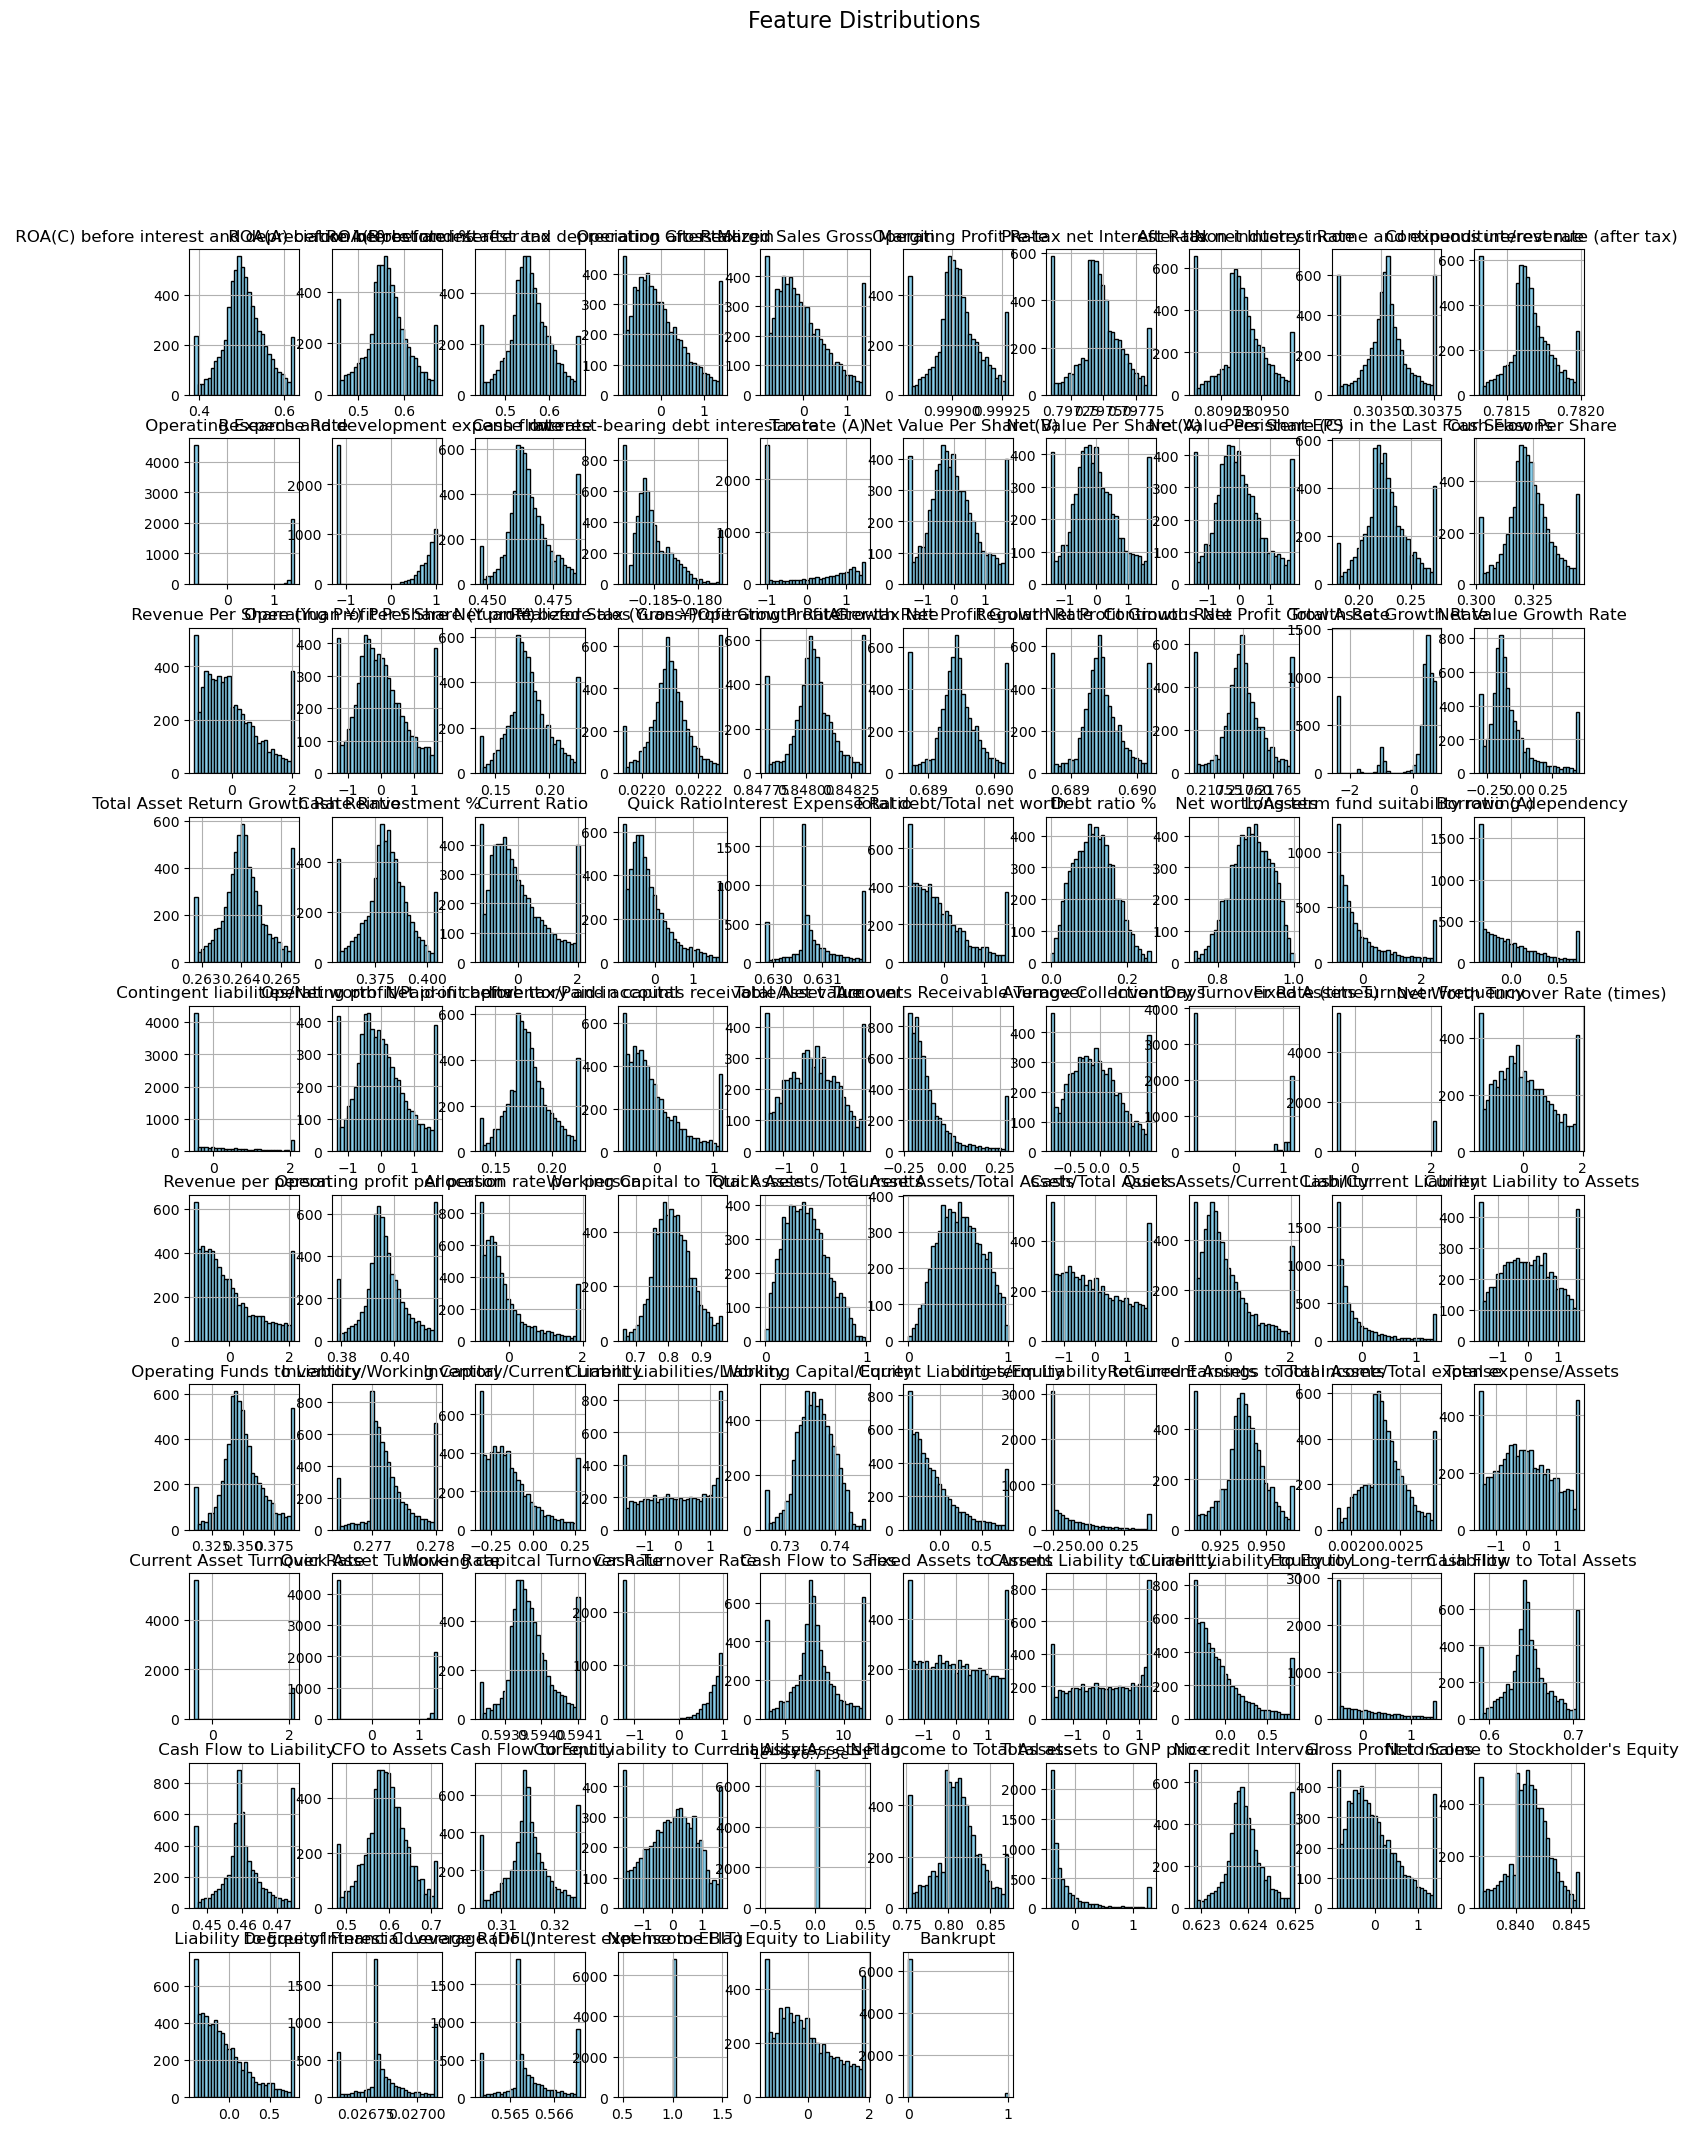

In [23]:
df1.hist(bins=30, figsize=(18, 24), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [24]:
df1.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.419459                     -0.418757   
1                 0.129514                      0.130869   
2                -0.419906                     -0.424580   
3                -0.881006                     -0.877757   
4                -0.585087                     -0.584582   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Total assets to GNP price  \
0                               0.781314  ...                    0.155886   
1                               0.781506  ...                    0.100802   
2                               0.781314  ...                    1.313550   
3                               0.781314  ...                   -0.219233   
4                               0.781550  ...                   -0.179002   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879               -0.419596   
1             0.623652                0.129711   
2             0.623841               -0.419841   
3             0.622929               -0.881096   
4             0.623521               -0.585103   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.836752              0.799737   
1                             0.839969              0.342690   
2                             0.836774              0.799737   
3                             0.836752              0.148107   
4                             0.839973             -0.148299   

    Degree of Financial Leverage (DFL)  \
0                             0.026608   
1                             0.027096   
2                             0.026608   
3                             0.026697   
4                             0.026608   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564309                   1   
1                                           0.566574                   1   
2                                           0.564309                   1   
3                                           0.564663                   1   
4                               

## Note 
    Overall data shows a normally skewwed data distribution from the above diagram.Some of the diagrams shows a skewness, that is because of the behavior and data condition due to this data contains decimal points only below 1


In [25]:
X = df1.drop(columns='Bankrupt')
y = df1['Bankrupt']

In [26]:
selecter = SelectKBest(score_func= f_classif, k=20)
X_new = selecter.fit_transform(X,y)

In [27]:
selected_features = X.columns[selecter.get_support()]
feature_score = pd.DataFrame({'Features':X.columns,"score":selecter.scores_}).sort_values(by = 'score',ascending = False)

In [28]:
print(feature_score)

                                    Features       score
39                      Borrowing dependency  600.649606
35                Total debt/Total net worth  548.055966
90                       Liability to Equity  482.175969
18   Persistent EPS in the Last Four Seasons  478.728455
85                Net Income to Total Assets  477.278430
..                                       ...         ...
10                    Operating Expense Rate    0.901210
28                   Total Asset Growth Rate    0.106039
45              Accounts Receivable Turnover    0.105470
84                     Liability-Assets Flag         NaN
93                           Net Income Flag         NaN

[95 rows x 2 columns]


In [29]:
print(selected_features)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Current Liabilities/Equity', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Current Liability to Equity',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity'],
      dtype='object')


In [30]:
X_selected = X[selected_features]

In [31]:
X_selected.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Current Liabilities/Equity', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Current Liability to Equity',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity'],
      dtype='object')

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [33]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
Y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (5455, 20)
X test shape : (1364, 20) 
Y train shape : (5455,)
y test shape : (1364,)



In [34]:
Scaler = StandardScaler()
X_train_scaled  = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.fit_transform(X_test)